# Customer Churn Prediction Project
##### By Ben K. Jasinski-Eshun

## Summary

The project aim was to predict customer churn for a telecommunications company using machine learning techniques, with the intention being to support businesses in identifying high-risk customers, thus reducing potential losses in revenue. 

The dataset revealed a significant class imbalance, with churners representing under a third of the data, meaning that *accuracy* alone was not a reliable metric model evaluation, with *precision* and *recall* being prioritised instead. 

Exploratory Data Analysis (EDA) revealed several key predictors of churn, including *month-to-month* contract holders, *fibre-optic* internet service users, and customers with *electronic cheque* as their primary method of payment, all of which were strongly associated with churn. Feature engineering steps included encoding categorical variables, addressing class imbalance with either SMOTE or balanced class weights, and scaling numerical features for models when necessary.

Several machine learning algorithms were tested, including *Logistic Regression*, *Random Forest*, and *AdaBoost*. After hyperparameter tuning, *AdaBoost* was selected as the final model due to its strong performance, with high recall (87%) and an acceptable level of precision (50%) for the minority class as per the criteria defined within the project. While the model effectively identifies churners, its relatively low precision indicates susceptibility to false positives, which could pose an issue for the effective deployment of resources available for customer retention strategies.

The project faced limitations, such as the imbalance in the dataset itself, the potential impact of retained outliers, and untransformed skewed features like *TotalCharges*. Future work could focus on exploring additional algorithms like *XGBoost*, and prioritising features with higher importance rankings, along with further hyperparameter tuning, to improve performance.

## Introduction

All businesses depend on customers for revenue and growth, and so it shouldn't be a surprise that the loss of customers can be detrimental to a business's overall health and prospects for success. Hence, limiting customer churn should be a top priority for any company aiming to ensure long-term prosperity and perpetuity in a competitive market. This is only possible if businesses are able to correctly identify high-risk customers before they churn, and thus allow them to incentivise continued engagement with the company.

The term *Churn* refers to the number of customers a business loses during a given period due to, for instance, cancelling a subscription or failing to renew a contract with the company; the term may also refer to the specific act of a customer relinquishing their use of a company's services. In other words, it can mean both the rate of occurrence as well as the action itself. Customers who churn usually do so in favour of another company offering a similar service but with better value for money, a higher quality service, or sometimes both.

The aim of this project is to build a supervised machine learning model that can predict whether a customer is likely to churn. The model will be trained on a dataset containing customer information, including features such as demographic data and the types of services used. 

The ability to predict the likelihood of a customer churning equips businesses with the tools to develop targeted customer retention strategies, which can save money in the long term and increase profitability. Customer retention not only cultivates loyalty, but also encourages referrals through word-of-mouth marketing. By analysing the factors that contribute to churn, businesses will also gain important insights into their own practices, such as identifying products or services that may need improvement, or spotting patterns among specific groups of customer where churn rates are higher than average.

## Imports and Libraries

This section includes all necessary imports and libraries for data analysis and processing, model training, and evaluation throughout the project.

In [8]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Statistical significance tests
from scipy.stats import mannwhitneyu, chi2_contingency

In [10]:
# Data Preprocessing 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [11]:
# Model Building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
# To build pipelines with SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline 

In [12]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)

In [13]:
# Model Evaluation (Graphics and Plots)
from sklearn.model_selection import learning_curve
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    precision_recall_curve, 
    roc_curve
)

In [14]:
# Model Evaluation (Scores)
from sklearn.metrics import (
    classification_report,
    average_precision_score,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    make_scorer
)

## Data Overview

The dataset explored within the scope of this project project is the **Telco Customer Churn** dataset, downloaded from Kaggle; it consists of 7,043 rows (customers) and 21 columns (features). Along with an ID column titled **`customerID`**, the dataset consists of **categorical** and **numerical variables**.

The categorical variables include:

- **`gender`**: Whether the customer is a male or a female.
  - Categories: Male, Female
- **`SeniorCitizen`**: Whether the customer is a senior citizen or not, given as a binary *integer* variable.
  - Categories: 0 (No), 1 (Yes)
- **`Partner`**: Whether the customer has a partner or not.
  - Categories: No, Yes
- **`Dependents`**: Whether the customer has dependents or not.
  - Categories: No, Yes
- **`PhoneService`**: Whether the customer has phone service or not.
  - Categories: Yes, No
- **`MultipleLines`**: Whether the customer has multiple lines or not.
  - Categories: No, Yes, No phone service
- **`InternetService`**: Customer's internet service provider.
  - Categories: DSL, Fiber optic, No
- **`OnlineSecurity`**: Whether the customer has online security or not.
  - Categories: Yes, No, No internet service
- **`OnlineBackup`**: Whether the customer has online backup or not.
  - Categories: Yes, No, No internet service
- **`DeviceProtection`**: Whether the customer has device protection or not.
  - Categories: Yes, No, No internet service
- **`TechSupport`**: Whether the customer has tech support or not.
  - Categories: Yes, No, No internet service
- **`StreamingTV`**: Whether the customer has streaming TV or not.
  - Categories: Yes, No, No internet service
- **`StreamingMovies`**: Whether the customer has streaming movies or not.
  - Categories: Yes, No, No internet service
- **`Contract`**: The contract term of the customer.
  - Categories: Month-to-month, One year, Two year
- **`PaperlessBilling`**: Whether the customer has paperless billing or not.
  - Categories: Yes, No
- **`PaymentMethod`**: The customer's payment method.
  - Categories: Electronic check, Mailed check, Bank transfer (automatic), Credit card
- **`Churn`**: Whether the customer churned or not.
  - Categories: Yes, No
 
With the exception of `SeniorCitizen`, all categorical variable are of the *string* data type.
 
The numerical variables include:

- **`TotalCharges`**: The total amount charges to the customer
  - Data Type: *Integer*
- **`MonthlyCharges`**: The amount charged to the customer monthly
  - Data Type: *Float*
- **`tenure`**: Number of months the customer has stayed with the company
  - Data Type: *Float*
 
Note that no specific currency was specified for the `TotalCharges` or `MonthlyCharges` columns in the dataset. For the purposes of this project, it is assumed that all values are denominated in US dollars (USD).
 
The `Churn` column is our target variable. 

The Telco Customer Churn dataset, along with further details regarding each column, can be found [here](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code).

To begin, the dataset was first loaded into a pandas DataFrame for analysis, together with a summary of the data.

In [17]:
# Load dataset
df = pd.read_csv("Telco-Customer-Churn-24.csv")
# Display first few rows
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [18]:
# Display summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The `TotalCharges` column was incorrectly classified as an *object* data type due to the presence of invalid entries in some rows. Additionally, the `SeniorCitizen` column was classified as an *integer* data type due to taking numerical values; as a categorical variable however, it would be better represented as an *object* for data visualisation purposes. 

These issues are addressed during the **Data Cleaning** phase of the project. Here, steps are taken to ensure the dataset is suitable for analysis.

## Data Cleaning and Exploratory Data Analysis

### Data Cleaning

#### Handling Missing and Duplicate Values

To begin, the data were first checked for missing values and duplicate entries. 

In [24]:
# Check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
# Check for any repeated Customer ID values
print(df["customerID"].duplicated().sum())

0


From the above output, a search for null values returned 0 for each column, and a further search for duplicate **customerID** row entries returned 0, which implies each row, and thus each customer, is unique. Hence no duplicate row entries, nor missing values of the *null* or *NaN* data type, were found within the dataset.

Missing values in the form of empty text (*strings*) were later discovered when attempting to convert the **TotalCharges** column data type, the handling of which is discussed beyond the following subsection.

#### Dropping Redundant Columns

The **CustomerID** column did not appear to provide any useful information for analysing churn, and no information indicating the possibility of encoded customer details (e.g. region) were available from the source. 

A clustering technique, such as *K-means* or *DBSCAN*, could be utilised to search for patterns, grouping similar IDs together, and potentially identify variations in churn amongst clusters. However, any patterns would likely be arbitrary or difficult to interpret without sufficient domain knowledge or additional context, such as how the IDs were generated; such a process would likely be cumbersome, introducing unnecessary complexity and ambiguity, with no guarantee of yielding any meaningful insights. 

Given these factors, along with the lack of domain-specific information regarding the process of generating customer IDs, it was ultimately decided to drop the **customerID** column to avoid overcomplicating the analysis.

In [29]:
# Drop customerID column
df = df.drop("customerID", axis=1)

#### Checking for Inconsistencies

Each categorical variable was examined for consistency by looking at the unique values of each variable.

In [32]:
# Define numerical and categorical columns
num_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
cat_columns = df.drop(num_columns, axis=1).columns.tolist()

# Loop over columns to get unique values
for column in cat_columns:
    print(f"{column}: {df[column].unique()}\n")

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']



From the above output, all categorical variables were found to be consistent and uniformly formatted. Note that the *num_columns* and *cat_columns* variables defined in the code cell above will be utilised many times throughout the rest of the report.

#### Converting Data Types

The following error was encountered when attempting to change the data type of **TotalCharges** to *float*:

`ValueError: could not convert string to float: ' '`

This error implies missing values (in the form of empty *strings*) are present within the data, despite earlier ruling out the presence of *null* or *NaN* values. A search was executed to find thesew remaining missing values.

In [36]:
# Find rows containing whitespace characters
df[df["TotalCharges"].str.isspace()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

Eleven entries were identified with missing values for **TotalCharges**. It was noted that the corresponding value for **tenure** in these missing rows was 0, suggesting that these customers had not been with the company long enough to incur any substantial charges. Additionally, all customers reported 'No' for instances of **Churn**.

Since **TotalCharges** represents the total amount charged to a customer (presumably over their entire tenure with the company), it seemed reasonable to approximate its value by multiplying **tenure**, the number of months a customer has stayed with the company, by **MonthlyCharges**, the amount charged monthly.

The calculations were performed in the cell below.

In [38]:
# Define product of columns
df["MonthlyCharges_X_tenure"] = df["MonthlyCharges"] * df["tenure"]
# Compare TotalCharges with product column
df[["MonthlyCharges_X_tenure", "TotalCharges"]]

MonthlyCharges_X_tenure TotalCharges
0                       29.85        29.85
1                     1936.30       1889.5
2                      107.70       108.15
3                     1903.50      1840.75
4                      141.40       151.65
...                       ...          ...
7038                  2035.20       1990.5
7039                  7430.40       7362.9
7040                   325.60       346.45
7041                   297.60        306.6
7042                  6972.90       6844.5

[7043 rows x 2 columns]

A slight discrepancy was noted between the values above, possibly due to differing payment plans between customers, discount schemes, additional charges, or other unspecified factors. Despite the discrepancy, the differences appeared small enough for the product of **tenure** and **MonthlyCharges** to plausibly approximate **TotalCharges** for the missing rows. 

Initial consideration was given to filling these missing values with 0, reflecting the lack of charges due to zero tenure. However, given the short tenure and absence of churn among these customers, these rows were ultimately deemed to contain insufficient information for predicting customer churn. As a result, the decision was made to drop these 11 rows from the data set, ensuring the project remained focused on customers with non-zero tenure values.

In [40]:
# Define rows with missing values in TotalCharges
missing_rows = df[df["TotalCharges"].str.isspace()].index
# Drop rows with missing values and reset index values
df = df.drop(missing_rows, axis=0).reset_index(drop=True)

Since the product of **tenure** and **MonthlyCharges** was no longer needed to estimate the missing values, the **MonthlyCharges_X_tenure** column was subsequently dropped to avoid redundancy in the dataset, as well as potential collinearity which could negatively impact model performance.

In [42]:
# Drop product column
df = df.drop("MonthlyCharges_X_tenure", axis=1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

The `TotalCharges` column data type was then changed from *object* to *float*. In addition, the `SeniorCitizen` column data type was changed from *integer* to *object* in order to better represent its categorical status.

In [44]:
# Change TotalCharges to float dtype
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [45]:
# Change SeniorCitizen to object dtype
df["SeniorCitizen"] = df["SeniorCitizen"].astype(object)

#### Summary Statistics

After converting the above two columns into suitable data types, summary statistics were generated and transposed (to improve readability) for numerical and categorical variables, respectively.

##### Numerical Variables

In [49]:
# Display descriptive statistics for numerical features
df.describe().T

count         mean          std    min       25%       50%  \
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

From the summary statistics, all three numerical variables have considerably large standard deviations relative to their respective means (and almost equal in the case of **TotalCharges**), meaning substantial variance in the numerical data, indicating significant variability in customer charges and length of time within the company. Such variability could impact churn predictions depending on the churn rates associated with these numerical features. 

The following were in addition observed for each individual variable:

**tenure**:

A *minimum* value of *1 month* was immediately noted, confirming that the 11 recently dropped values were the only customers in the dataset with values of less than a month; the corresponding *maximum* tenure was *72 months*. The *mean* tenure was approximately *32 months*, and the *median* (listed as the 50% percentile) was *29 months*; both values were reasonably close together, suggesting a *roughly symmetric* distribution, although the maximum value was noticeably further away from both the mean and median compared to the minimum value, which could indicate either a *right-skewed* distribution or the presence of *outliers*.

**MonthlyCharges**:

The *mean* amount charged per month was found to be approximately *64 USD per month*, in comparison to a *median* value of *70.35 USD*, which is relatively close albeit slightly larger in value compared to the mean, perhaps suggesing a *left-skewed* distribution. The *minimum and maximum* values given were *18.25 and 118.75 USD*, respectively; both values were *roughly equidistant from the median*, whereas the mean tended slightly towards the minimum value.

**TotalCharges**:

The *mean* total charged per customer was found to be about *2,283 USD*, in stark contrast to a much lower *median* value of about *1,397 USD*, strongly suggesting a *right-skewed* distribution. The respective *minimum and maximum* values found here were *18.80 and 8,684.80 USD*; the wide range indicated most values were clustered on the lower end, though some extreme values to the right were exerting significant influence on the mean. The presence of *outliers* was considered a possibility, although this could not be determined solely by the summary statistics.

##### Categorical Variables

In [52]:
# Display descriptive statistics for categorical features
df.describe(include="object").T

count unique               top  freq
gender            7032      2              Male  3549
SeniorCitizen     7032      2                 0  5890
Partner           7032      2                No  3639
Dependents        7032      2                No  4933
PhoneService      7032      2               Yes  6352
MultipleLines     7032      3                No  3385
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      3                No  3497
OnlineBackup      7032      3                No  3087
DeviceProtection  7032      3                No  3094
TechSupport       7032      3                No  3472
StreamingTV       7032      3                No  2809
StreamingMovies   7032      3                No  2781
Contract          7032      3    Month-to-month  3875
PaperlessBilling  7032      2               Yes  4168
PaymentMethod     7032      4  Electronic check  2365
Churn             7032      2                No  5163

From the summary statistics, we see that the sixteen categorical variables (excluding **Churn**) were found to have different numbers of unique categories; *six* had *2 categories*, *nine* had *3 categories*, and *one* had *4 categories*.

The distribution of categories revealed some interesting trends regarding customers and the services they used. For example:

##### **Two-category variables**:
- `gender` - Roughly equal split between male and female customers.
- `Partner` - Similar to gender; a roughly equal split between customers with and without a partner.
- `Dependents` - Near three quarters of customers had **no** dependents.
- `SeniorCitizens` - Only about 15-20 percent of customers were senior citizens.
- `PhoneService` - A significant majority (over 90 percent) had phone service.
- `PaperlessBilling` - A slight majority (about 60 percent) opted for paperless billing.

##### **Three-category variables**:

- `MultipleLines` - Just under about 50 percent of customers reported **not** having multiple lines.
- `InternetService`- 'Fiber optic' was the most popular internet service, at around 40 percent of customers.
- `OnlineSecurity` - Close to 50 percent **did not** have online security.
- `OnlineBackup` - Around 40 percent **did not** have online security.
- `DeviceProtection` - Similar to online backup; around 40 percent **did not** have device protection.
- `TechSupport`- Similar to online security; nearly 50 percent **did not** have tech support.
- `StreamingTV`- Around 40 percent of customers **did not** have streaming television.
- `StreamingMovies` - Similar proportion (around 40 percent) **did not** have streaming movies.
- `Contract` - The majority of customers (close to 55 percent) had 'Month-to-month' contracts.

##### **Four-category variables**:

- `PaymentMethod` - The only reported four-category variable. Electronic cheque (spelled *'check'* in American English) was the most popular method of payment used by customers, with roughly a third of customers paying this way.

##### **Target variable**:

- `Churn` - Instances were around 70 percent or so for non-churners, and 30 percent or so for churners, which was indicative of a ***class imbalance*** in the target variable. This is further explored in the next section.

Interesting to note was the popularity of month-to-month contracts among customers. It would not be unreasonable to assume a higher instance of churn among these customers, since such contracts typically require less of a commitment than 1- or 2-year contracts. Another area of interest was exploring whether a lack of additional services, such as *tech support* or *online security*, could be associated with less customer engagement with the company and thus a higher likelihood of churning. The small percentage of *senior citizens* relative to the sample size may have suggested the company's services were more popular with younger customers; higher churn rates, due to potential dissatisfaction with how the company's services cater to their needs, could possibly be present among senior customers. All of these factors were later identified, during the categorical phase of exploratory data analysis, as significant predictors of churn.

#### Preliminary EDA: Investigating the Target Variable

Value counts were obtained for `Churn`, displayed below.

In [56]:
# Obtain value counts for Churn
Churn_value_counts = df["Churn"].value_counts()
Churn_value_counts

Churn
No     5163
Yes    1869
Name: count, dtype: int64

There were 1869 customers found to have churned, in contrast to the majority 5163 customers that were still with the company. As noted earlier, the large number of non-churning customers relative to churners suggested an *imbalance* was present in the dataset. 

Percentage value approximations of the value counts were obtained after calculating their corresponding rates, and a count plot was created to visualise the distribution of the class labels.

In [58]:
# Obtain rates and percentage values for Churn
Churn_rates = Churn_value_counts / len(df)
Churn_percentages = np.round(Churn_rates * 100, 2)
# Print results
print(f"{Churn_rates}\n{Churn_percentages}")

Churn
No     0.734215
Yes    0.265785
Name: count, dtype: float64
Churn
No     73.42
Yes    26.58
Name: count, dtype: float64


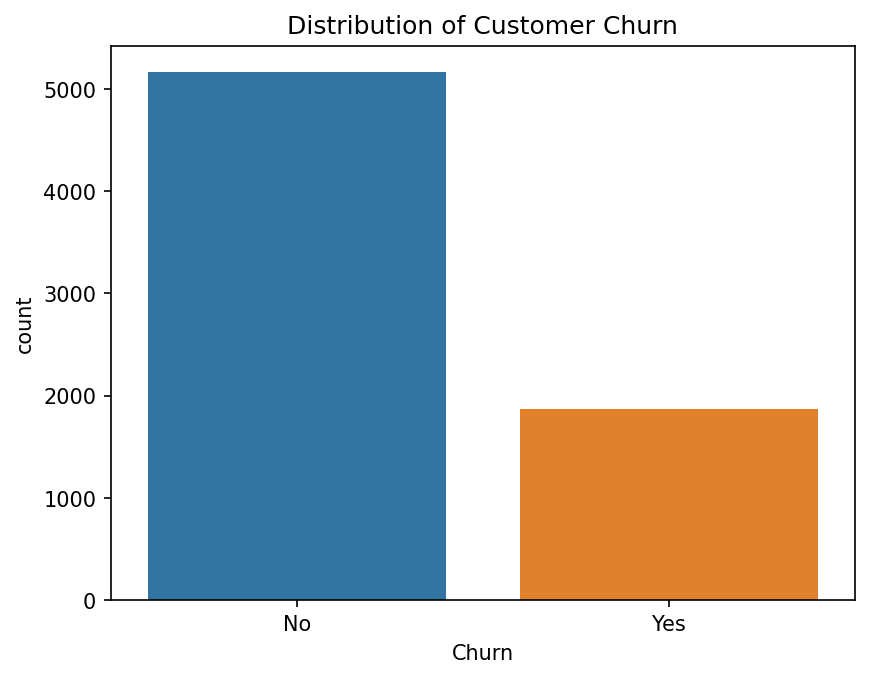

In [59]:
# Set figure parameters
plt.figure(dpi=150)
# Visualise distribution of Churn class labels
sns.countplot(data=df, x="Churn", hue="Churn")
# Set plot title
plt.title("Distribution of Customer Churn");

From the output, an approximately 26.6 percent instance of churn was noted amongst customers, compared to about 73.4 percent of customers that were non-churners. This corresponds to an overall *churn rate* of around *0.27* within the dataset. The count plot indicates a *churn ratio of about 3:1*, meaning that for every 3 customers retained, 1 customer leaves.

These observations indicate a clear ***class imbalance*** in the dataset, confirming the need for implementing *class balancing techniques* during the modelling phase of this project.

### Exploratory Data Analysis of Numerical Variables

This section covers the exploratory data analysis of the numerical variables within the dataset, namely ***tenure***, ***MonthlyCharge***, and ***TotalCharges***. 

Histograms and boxplots were created to gain further insights into their distributions; a second set, colour encoded by the target variable `Churn`, were also created, for which the boxplot revealed the presence of outliers within the minority churn class. These outliers were investigated to assess their potential impact on model performance. Further visualisations were later generated including a pairplot, heatmap, and 3D scatterplot, after which a Mann-Whitney U test was conducted to determine whether there was a statistically significant difference between churning and non-churning customers.

#### Histograms and Boxplots

To streamline the visualisation process, a function was created that generates side-by-side histograms and boxplots for each numerical variable, helping to ensure consistency in the visualisation output across the different variables.

In [64]:
def create_histogram_boxplots(data, features, 
                              figsize=(6.4, 4.8), hue=None):
    """
    Creates a histogram and a box plot side by side 
    for each numerical feature provided, displaying 
    both on a single row of a subplot for comparative 
    visualisation of the distribution and spread.
    
    Takes a Pandas DataFrame 'data', the numerical 
    features 'features' (list), optional subplot
    figure size configuration 'figsize' (tuple
    containing two int or float values), and 
    optional colour encoding by categorical
    variable 'hue' (string).

    Notes: 
    - pyplot.show() or ; is not called within
    this function.
    - A KDE line is hardcoded into the 
    histogram plot.
    """
    
    # Define subplots grid
    fig, ax = plt.subplots(nrows=len(features), 
                           ncols=2, figsize=figsize)
    # Flatten axis for iteration
    ax = ax.ravel()
    
    # Loop over features
    for n, feat in enumerate(features):
        
        # Define left and right axes
        ax_l = 2 - 2 * (1 - n)
        ax_r = (2 * n) + 1
        
        # Define histogram bin width using Scott's Rule
        binwidth = (3.5 * np.std(data[feat])) / len(data)**(1/3) 
        
        # Plot feat histogram (LHS) and boxplot (RHS)
        sns.histplot(data, ax=ax[ax_l], x=feat, 
                     binwidth=binwidth, hue=hue, kde=True)
        sns.boxplot(data, ax=ax[ax_r], x=feat, hue=hue)
        
        # Set title and xlabel for each side of row
        for plot in [ax_l, ax_r]:
            ax[plot].set_title(feat)
            ax[plot].set_xlabel(None)
            
    # Adjust padding
    fig.tight_layout()

    # Return figure and axes
    return fig, ax

Histograms & box plots were subsequently visualised using the above function. The *num_columns* list, defined earlier on during the process of cleaning the data (*see Checking for Inconsistencies*), was used as input.

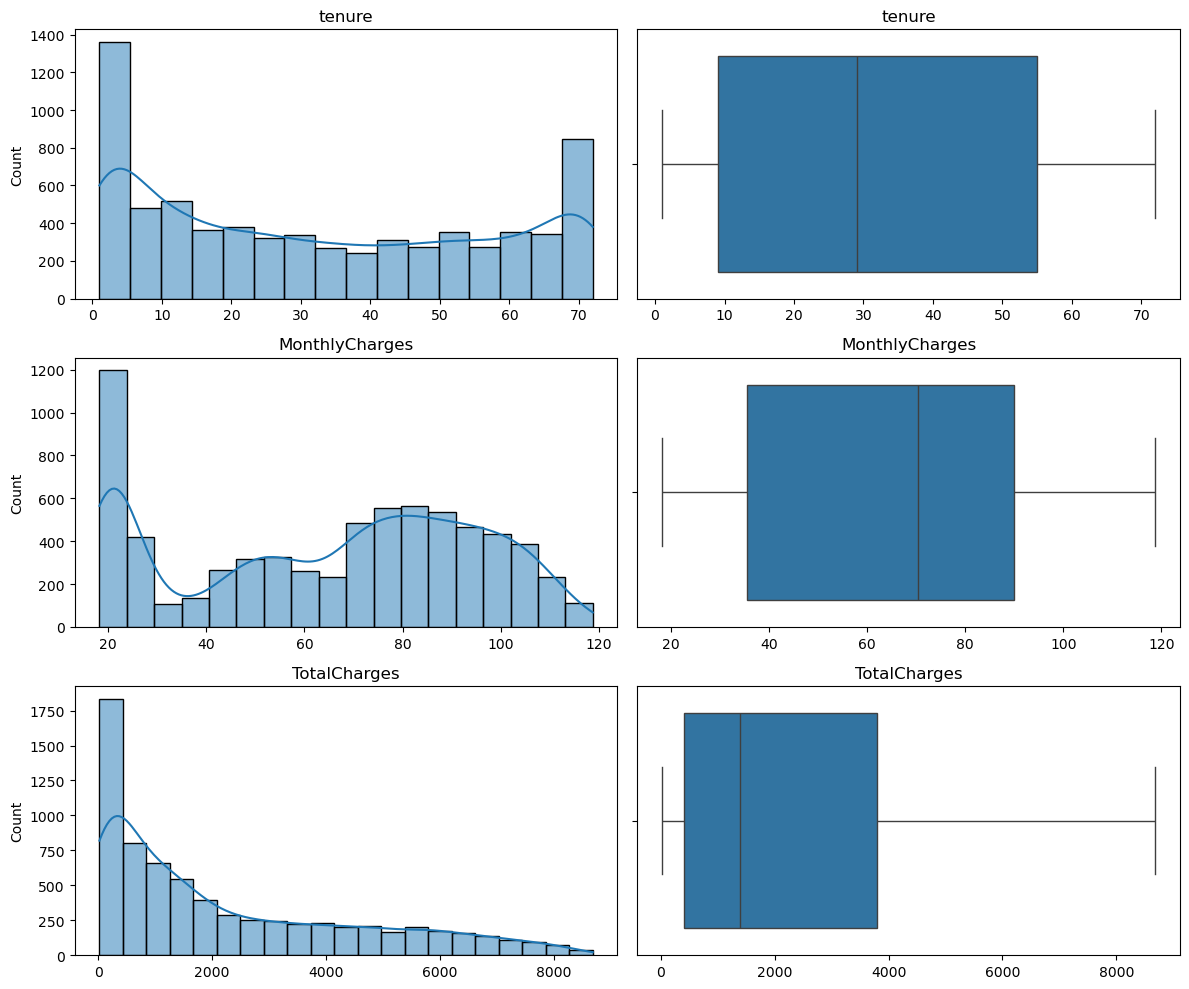

In [66]:
# Create Histogram Boxplots for numerical features
fig, ax = create_histogram_boxplots(df, num_columns, 
                                    figsize=(12, 10));

Looking at the visualisations, three very different distributions were noted.

**tenure**:

The histogram is *bimodal*, with two clear peaks, showing a *roughly symmetric distribution*. The two peaks show a large cluster of customers with tenures between roughly 1-5 months, and a slightly smaller cluster between roughly 67-72 months, the latter potentially indicating a concentration of long-term loyal customers. A relatively uniform distribution between the two peaks can be observed.

The box plot suggests an otherwise *slightly right-skewed distribution*, since the 50 percent of the values below the median have a narrower spread of values compared to above the median. However, the bimodality shown on the histogram challenges this interpretation.

**MonthlyCharges**:

The histogram is *multimodal*, with a very large noticeable peak between 20-25 USD, another visible peak between 80-85 USD, and another smaller peak between 50-55 USD. Most values are clustered around the middle, between 30-110 USD. The distribution is notably *asymmetric*, although neither clearly left- nor right-skew. 

The box plot visualisation confirms the asymmetricity seen in the histogram. The lower quartile is much closer to the minimum value than the upper quartile is to the maximum value; converely, the upper quartile is much closer to the median than the lower quartile is to the median.

**TotalCharges**:

The histogram is clearly *right-skew*. It is also *unimodal*, with one large clear peak on the extreme LHS between roughly 0-200 USD, suggesting a very large proportion of newer customers. This is supported by the large peak visible in the histogram for **tenure**.

The box plot confirms the strong right-skewness, with the right hand side of the box, between the median and the upper quartile, much wider than the corresponding left hand side of the box. The right whisker is also significantly longer.

#### Histograms and Boxplots: Visualising Churn

A further set of histograms and bloxplots were generated, this time colour encoded by the target variable.

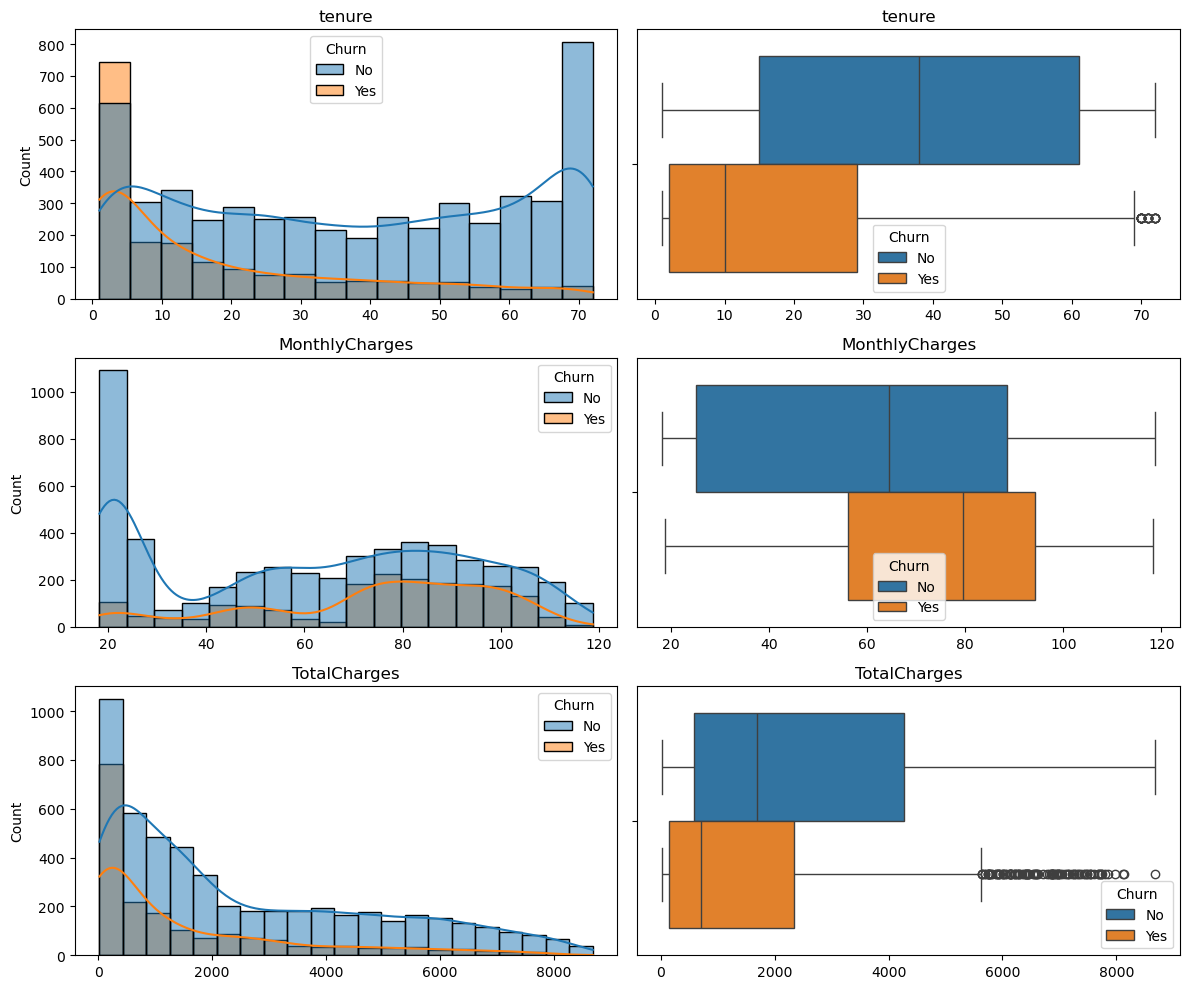

In [69]:
# Create colour encoded Histogram Boxplots
fig, ax = create_histogram_boxplots(df, num_columns, 
                                    figsize=(12, 10), hue="Churn");

Interestingly, while the numerical variables themselves didn't present any outliers overall, several emerged within the churn subset, particularly for **TotalCharges** and **tenure**. The following observations were noted about the visualisations after colour encoding the variables:

**tenure**:

Although the general distribution was found to be a roughly symmetric bimodal distribution, with a left peak dominating, the distribution of *churners* within this variable is conversely *right-skew and unimodal*, with a visibly tall left peak between roughly 1-5 months, which sharply declines immediately afterwards, suggesting a very large proportion of customers that churn do so *within the first 5 or 6 months* of joining the company. The distribution of non-churners on the other hand has remained roughly symmetric, though now with a right peak dominating.

The box plot for churners shows a *heavily left-skewed* distribution. It has a median of 10, lower quartile somewhere between 2-3, upper quartile around 29, a minimum value of 1 and a maximum value just under 70. Some *outliers* are also identified on the extreme right hand side, beyond the maximum value (approximately 69 months). The corresponding boxplot for non-churners in comparison looks roughly symmetric, with a median value just under 40, lower quartile of around 15, and upper quartile just over 60.

These findings suggest that the distribution of churners is pulling the overall distribution further to the left, and, on average, churners reported *lower than average tenures*.

**MonthlyCharges**:

Interestingly, while the distribution among non-churners appears mostly unchanged, the prominent mode to the left has almost all but disappeared in the distribution among *churners*. Though technically still *multimodal*, the two peaks to the left, located roughly between 18-24 USD and 40-55 USD, barely tower over the other nearby bins; it could be said that the distribution is relatively uniform below roughly 70 USD. The majority of churners in the distribution are clustered roughly between 70-110 USD, peaking somewhere around 75-80 USD. Hence the distribution *loosely resembles a left-skewed distribution*.

The box plot for non-churners also appears to be largely unchanged, the only difference being a slightly lower median at around 65 compared to 70.35 overall, and a smaller lower quartile value at around 25 compared to approximately 35.59 overall. In comparison, the box plot for churners has a median value close to 80, a lower quartile around 55, and an upper quartile around 95. The spread between the minimum and maximum values, though slightly narrower, is similar to the corresponding blue box plot.

The insights from these visualisations suggest that a large proportion of churners were *paying more than average in monthly charges*.

**TotalCharges**:

Both shades of the histogram have distributions that are *right-skew*, although this skew is more prominent in the distribution of churners; this could be because of the larger proportion of churners with shorter tenures and, consequently, less time to accumulate higher total charges.

Looking at blue box plot, it's noted that the lower quartile, median, and upper quartile have shifted slightly further to the left. In comparison, the orange box plot had a median value somewhere around 600-700, and very close to the lower quartile of the corresponding blue box plot. Its lower quartile is at roughly 100, and its upper quartile is just under 2500. The minimums of both box plots look about equal, though the orange box plot has a much smaller maximum, at about 5600 compared to over 8000 for the blue box plot. Consequently, a *long trail of outliers* are identified beyond the maximum of the orange plot, with a particularly notable *single lone outlier* to the extreme left.

#### Outlier Investigaton

After analysing the distributions of the data, the outliers found within the second set of box plots were investigated further. A function was created for the purpose of filtering the dataset, based on the IQR method, to identify the specific outliers.

In [72]:
# Investigate Churn outliers seen on box plots.

def find_churn_outliers(feature):
    """
    Returns a DataFrame of outliers for a specified
    feature name (string), focusing only on churned 
    customers, applying the IQR method to identify 
    outliers and outputs the filtered DataFrame 
    for further analysis. 
    
    Note that the DataFrame and the Churn variable 
    are hardcoded within the function for filtering.
    """
    
    # Obtain filtered DataFrame of churned customers
    churners = df[df["Churn"] == "Yes"]

    # Obtain lower and upper quartiles of feature
    upper_q = np.quantile(churners[feature], 0.75)
    lower_q = np.quantile(churners[feature], 0.25)
    # Calculate interquartile range
    IQR = upper_q - lower_q

    # Calculate upper and lower extremes of feature
    upper_ex = upper_q + (1.5 * IQR)
    lower_ex = lower_q - (1.5 * IQR)

    # Filter DataFrame to find outliers
    churn_outliers = churners[(churners[feature] > upper_ex) 
    | (churners[feature] < lower_ex)]

    # Return filtered DataFrame
    return churn_outliers

The churn outliers found for **tenure** under the churn class were first investigated.

In [74]:
# Investigate Churn outliers under tenure
tenure_outliers = find_churn_outliers("tenure")
tenure_outliers

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
809     Male             0      No         No      70          Yes   
972     Male             0      No         No      71          Yes   
1302  Female             0      No         No      70          Yes   
2874    Male             1     Yes         No      70          Yes   
3035    Male             0     Yes         No      71          Yes   
3106    Male             0     Yes        Yes      72          Yes   
3433    Male             1     Yes         No      72          Yes   
3511    Male             0     Yes         No      70          Yes   
3883  Female             0     Yes         No      72          Yes   
4142    Male             0     Yes         No      71           No   
4505  Female             1     Yes        Yes      72          Yes   
4602    Male             0     Yes         No      72          Yes   
5432  Female             0     Yes         No      70          Yes   
5570  Female             0     Yes        Yes      70          Yes   
5688  Female             0     Yes         No      70          Yes   
5693    Male             1     Yes        Yes      71          Yes   
5832    Male             1      No         No      70           No   
6029  Female             0     Yes        Yes      70          Yes   
6281  Female             0     Yes         No      71          Yes   
6389    Male             0     Yes        Yes      71          Yes   
6415  Female             0     Yes         No      72           No   
6528    Male             0     Yes         No      70          Yes   
6934    Male             0     Yes        Yes      70          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
809                Yes     Fiber optic            Yes           No   
972                Yes     Fiber optic            Yes           No   
1302               Yes     Fiber optic            Yes          Yes   
2874               Yes     Fiber optic             No          Yes   
3035               Yes     Fiber optic             No          Yes   
3106               Yes     Fiber optic             No          Yes   
3433               Yes     Fiber optic             No          Yes   
3511                No     Fiber optic            Yes          Yes   
3883               Yes     Fiber optic             No          Yes   
4142  No phone service             DSL             No          Yes   
4505               Yes             DSL            Yes          Yes   
4602               Yes     Fiber optic            Yes          Yes   
5432               Yes             DSL            Yes           No   
5570               Yes     Fiber optic            Yes          Yes   
5688               Yes     Fiber optic             No          Yes   
5693               Yes     Fiber optic            Yes          Yes   
5832  No phone service             DSL             No           No   
6029               Yes     Fiber optic            Yes          Yes   
6281               Yes     Fiber optic             No           No   
6389               Yes     Fiber optic             No          Yes   
6415  No phone service             DSL             No          Yes   
6528               Yes     Fiber optic            Yes          Yes   
6934               Yes     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
809                No         Yes         Yes             Yes        Two year   
972               Yes         Yes         Yes             Yes        Two year   
1302              Yes         Yes         Yes             Yes        One year   
2874              Yes          No         Yes             Yes  Month-to-month   
3035              Yes         Yes         Yes             Yes        Two year   
3106              Yes          No         Yes             Yes        Two year   
3433              Yes          No         Yes             Yes        Two year

In [75]:
# Obtain number of rows
len(tenure_outliers)

23

There were 23 customers identified by the function as outliers for **tenure** under the churn class; all have tenures between 70-72 months. Since the maximum value shown in the box plot was around 69, and the distribution of tenure among churners within the histogram was consistent and unbroken throughout, these outliers weren't considered to be particularly significant or unusually different from the spread of values identified in the box plot.

The function was then executed for **TotalCharges**.

In [77]:
# Investigate Churn outliers under TotalCharges
TotalCharges_outliers = find_churn_outliers("TotalCharges")
TotalCharges_outliers

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
104     Male             0     Yes         No      68          Yes   
339     Male             0     Yes         No      63          Yes   
402     Male             0     Yes        Yes      69          Yes   
445   Female             0      No         No      60          Yes   
608   Female             1     Yes         No      65          Yes   
...      ...           ...     ...        ...     ...          ...   
6774    Male             0      No         No      61          Yes   
6842  Female             0      No         No      54          Yes   
6934    Male             0     Yes        Yes      70          Yes   
6961  Female             1      No         No      56          Yes   
7023  Female             0      No         No      67          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
104            Yes     Fiber optic             No          Yes   
339            Yes     Fiber optic             No          Yes   
402            Yes     Fiber optic             No           No   
445            Yes     Fiber optic             No          Yes   
608            Yes     Fiber optic            Yes           No   
...            ...             ...            ...          ...   
6774           Yes     Fiber optic            Yes           No   
6842           Yes     Fiber optic             No          Yes   
6934           Yes     Fiber optic             No          Yes   
6961           Yes     Fiber optic             No          Yes   
7023           Yes     Fiber optic            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
104               Yes         Yes         Yes             Yes        Two year   
339               Yes          No         Yes             Yes  Month-to-month   
402               Yes          No         Yes             Yes  Month-to-month   
445               Yes          No         Yes             Yes  Month-to-month   
608               Yes          No         Yes             Yes  Month-to-month   
...               ...         ...         ...             ...             ...   
6774              Yes         Yes         Yes             Yes        Two year   
6842              Yes         Yes         Yes             Yes  Month-to-month   
6934               No          No         Yes             Yes        Two year   
6961              Yes         Yes         Yes             Yes        One year   
7023              Yes          No         Yes              No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
104               Yes  Bank transfer (automatic)          110.00   
339               Yes           Electronic check          103.40   
402               Yes    Credit card (automatic)           99.45   
445               Yes           Electronic check          105.90   
608                No  Bank transfer (automatic)          105.25   
...               ...                        ...             ...   
6774              Yes    Credit card (automatic)          111.60   
6842               No           Electronic check          111.10   
6934               No  Bank transfer (automatic)           98.30   
6961              Yes           Electronic check          111.95   
7023              Yes    Credit card (automatic)          102.95   

      TotalCharges Churn  
104        7611.85   Yes  
339        6603.00   Yes  
402        7007.60   Yes  
445        6396.45   Yes  
608        6786.40   Yes  
...            ...   ...  
6774       6876.05   Yes  
6842       6014.85   Yes  
6934       6859.50   Yes  
6961       6418.90   Yes  
7023       6886.25   Yes  

[109 rows x 20 columns]

There were 109 customers identified as outliers for **TotalCharges** under the churn class. 

Further filtering was applied to the dataset in order to identify the extreme value identified in the orange box plot, as well as investigate the differences generally between the top 20 values.

In [79]:
# Obtain top 10 largest TotalCharges
TotalCharges_outliers["TotalCharges"].nlargest(20)

4602    8684.80
1302    8127.60
3883    8109.80
6528    7968.85
5572    7856.00
5119    7804.15
6280    7752.30
6029    7723.90
6389    7723.70
3035    7690.90
3433    7689.95
5688    7674.55
104     7611.85
5693    7548.10
3511    7534.65
972     7532.15
6026    7491.75
2199    7482.10
4387    7446.90
6596    7432.05
Name: TotalCharges, dtype: float64

Excluding the largest value, the differences between each value were relatively small and didn't appear to be particularly significant or unusual. As noted earlier, the box plot revealed a long string of values flagged as outliers, which suggests that these values may not be true outliers in the traditional sense. Instead, they could represent a *natural extension of the overall range* of the churn subset within **TotalCharges**, especially given the relatively gradual progression between each value. The large number of rows identified as outliers implies that the threshold set by the box plot could be overly sensitive to values that still fall within the expected range of variability for the data.

That said, the *most notable outlier* observed was the very top value (index 4602), with *8,684 USD* in total charges. This value stands out because it's nearly *550 USD higher* than the next largest outlier at 8,127 USD, hence its isolation in the box plot seen earlier and, potentially, making it a true anomaly in the data. 

The data were filtered again to isolate the particular row.

In [81]:
# Obtain row of index
TotalCharges_outliers.loc[4602]

gender                                   Male
SeniorCitizen                               0
Partner                                   Yes
Dependents                                 No
tenure                                     72
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                           Yes
Contract                             One year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          117.8
TotalCharges                           8684.8
Churn                                     Yes
Name: 4602, dtype: object

The particular outlier, in addition to very high total charges, also had a tenure of 72 months, indicating a previous loyal customer. Both the total charges and the tenure for this customer are outliers within their respective variables. Some additional observations made were the high MonthlyCharges value of 117.80 USD, their use of fibre-optic internet service, a contract length of one year, and automatic bank transfer as their payment method.

Despite the presence of these outliers, including the one described above, it was decided to retain them in the dataset. Given the already imbalanced nature of the dataset, particularly with fewer instances of churn, dropping any outliers would further bias the model in favour towards predicting the majority class and reduce the available data for identifying churn. Furthermore, subsequent investigation of the categorical variables in the analysis identified *fibre optic internet service* and *paperless billing* to be strongly associated with churn, both of which were subscribed to by the customer described above. This suggested that multiple factors, beyond just **TotalCharges**, could potentially explain the customer's churn. 

Hence although removing certain outliers was initially considered, particularly the one described above due to the exceptional nature of its value for **TotalCharges**, the presence of other churn-related factors as well as class balancing considerations ultimately influenced the decision to retain it.

Model performance was monitored closely later on, during the modelling phase of the project, to ensure that these outliers did not disproportionately impact performance metrics or lead to overfitting. 


#### Correlation Heatmap

After investigating the outliers found in the box plot, more visualisations were generated to further explore patterns and relationships between the data. A correlation heatmap was created to better understand the strength of relationships between the numerical variables.

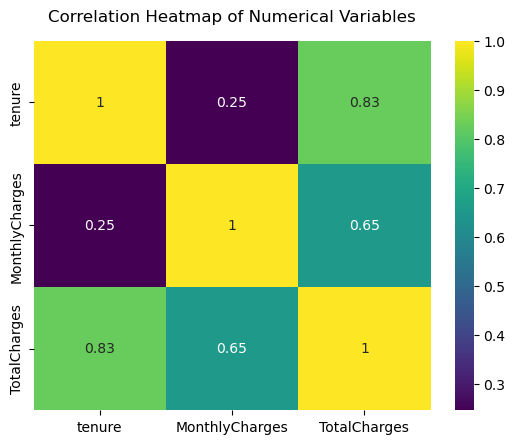

In [84]:
# Define numerical column correlations
num_column_corr = df[num_columns].corr()

# Create heatmap
sns.heatmap(data=num_column_corr, 
            cmap="viridis", annot=True)

# Set title and title position
plt.title("Correlation Heatmap of Numerical Variables", y=1.03);

The correlation heatmap of the numerical variables indicated strong positive correlations of *0.83* between **TotalCharges** and **tenure**, as well as *0.65* between **TotalCharges** and **tenure**. This was expected, as earlier observations revealed that **TotalCharges** approximates the product of **MonthlyCharges** and **tenure**. Additionally, a weaker, though still notable correlation of *0.25* was noted between **MonthlyCharges** and **tenure**. 

Careful consideration was given to potential issues with collinearity between these variables during the modelling phase. However, since **TotalCharges** is not exactly equal to the product of the other two variables, it could capture additional information that the other two variables alone cannot. In this respect, **TotalCharges** could function similarly to an *interaction term*.

As such, the **TotalCharges** column was retained in the dataset, while also planning to train models with and without it to evaluate its impact on model performance. This will help determine whether the inclusion of **TotalCharges** improves or diminishes performance.

#### Pair Plot

A pairplot was used to explore how the numerical variables influence each other, across both *churn* and *non-churn* categories, in order to reveal additional trends that may help to support the modelling process.

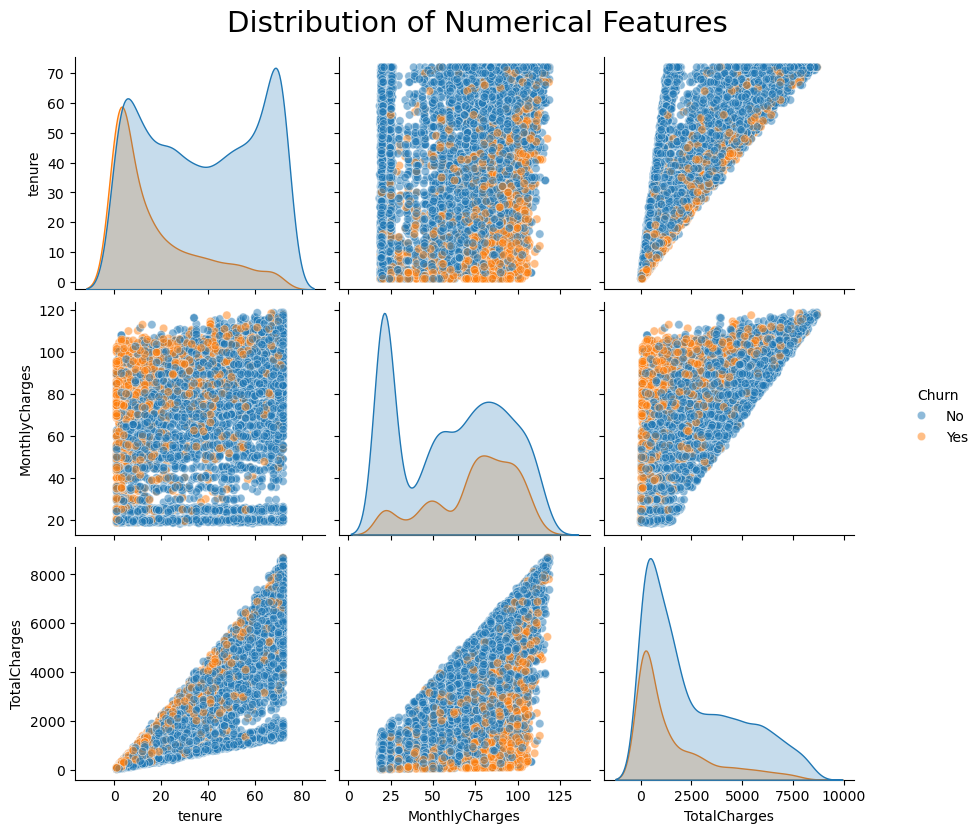

In [87]:
# Create and format pairplot
pplot = sns.pairplot(data=df, vars=num_columns, 
                     hue="Churn", plot_kws=dict(alpha=0.5))

# Set title
pplot.fig.suptitle("Distribution of Numerical Features", 
                   y=1.04, fontsize=21)

# Adjust size
pplot.fig.set_size_inches(10, 8);

From the pair plot, the following observations were made:

##### **KDE Plots**:

The KDE plots provided further clarity on the visualisations of distributions without the distraction of the histogram bins, reinforcing earlier observations of skewness and modality in these variables. For example, the multimodal distribution within the churn subset of **MonthlyCharges** continues to show a tendency towards left-skew, confirming earlier findings.

##### **MonthlyCharges vs TotalCharges Scatterplot**: 

The scatterplot revealed **two notable clusters** of churn:
- A **large cluster** associated with total charges (below 4,000 USD) and higher monthly fees (around 60-110 USD).
- A **smaller cluster** for both low total charges (under 1,000 USD) and low monthly fees (under 50 USD), with fewer churn instances scattered across the plot as total charges increase while monthly charges remains low.

In addition, a *trail* of churn instances is notable as total charges increase for higher monthly charges. In general, the relationships here are *non-linear*, as the pattern of churn predominantly appears to follow a sort of curve.

These findings suggest churn tends to occur *more frequently* among customers who have accumulated *lower total charges* but pay *higher monthly fees*.

##### **TotalCharges vs tenure Scatterplot**:

An *approximately linear* pattern emerged for the churn class, where churn *seems to increase* with both higher tenure and higher total charges. While a notable upward trend is seen, there are also a few *outlying points* with high tenure but low total charges, which may represent customers who haven't paid substantial fees despite long tenures.

##### **MonthlyCharges vs tenure Scatterplot**:

The instances of churn here are particularly concentrated in *two regions*:
- *Low tenure* (under 24 months) and *high monthly charges* (over 65 USD), which continues to be observed even as tenure increases, in line with a gradual increase in monthly charges.
- A smaller, but notable cluster among low tenure and low monthly charges.

Churn is also observed sporadically across higher tenure values and monthly charges, implying that *churn risk is pervasive* but more concentrated in certain segments. The pattern is non-linear, as most of the instances of churn loosely resemble a curve.

#### 3D Scatterplot

To further clarify the visual findings observed in the scatterplots and examine how all these variables interact and influence churn together, a 3D scatterplot was generated to visualise all of the 3 numerical variables.

In [90]:
# Import required library
from mpl_toolkits import mplot3d

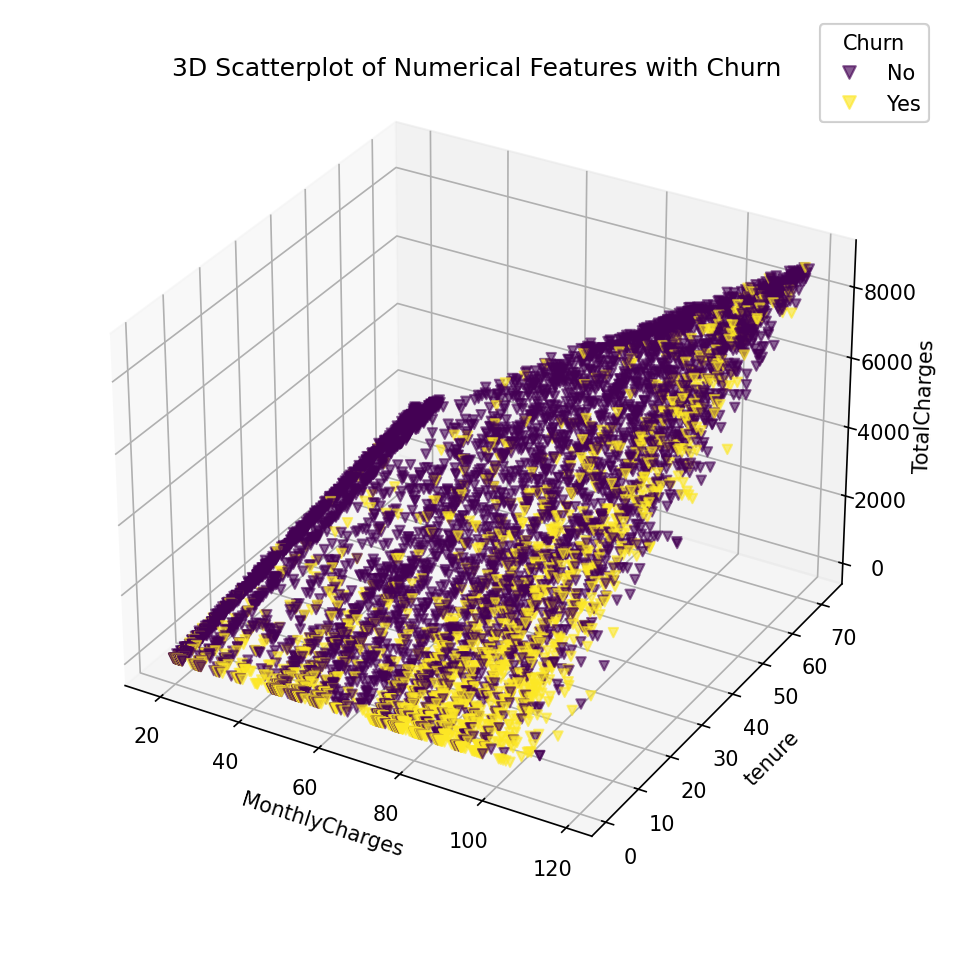

In [91]:
# Set figure parameters
fig = plt.figure(figsize=(8, 8), dpi=150)
ax = fig.add_subplot(projection="3d")

# Define x, y and z of plot
x = df["MonthlyCharges"]
y = df["tenure"]
z = df["TotalCharges"]

# Convert Churn to numerical format for plotting
c = pd.get_dummies(df["Churn"], drop_first=True)

# Plot 3D scatterplot
scatter = ax.scatter(x, y, z, c=c, marker="v", alpha=0.6)

# Set title and axes labels
ax.set_title("3D Scatterplot of Numerical Features with Churn", y=1)
ax.set_xlabel("MonthlyCharges")
ax.set_ylabel("tenure")
ax.set_zlabel("TotalCharges")

# Set legend
legend = ax.legend(*[scatter.legend_elements()[0], 
                     ["No", "Yes"]], loc="upper right", title="Churn")
ax.add_artist(legend)

# Zoom out to ensure axis labels are visible
ax.set_box_aspect(None, zoom=0.9);

The 3D scatterplot confirms previous observations made earlier between pairs of each numerical variable.

The plot reveals that, although instances of churn seem to occur sporadically all over, there seems to be a very *high concentration of churn* for customers with *high monthly charges* (above $60), *low tenure* (below 40 months), and *lower total charges* (under 4,000 USD). Additionally, there are notable concentrations of churners seen in other parts of the plot. Churners are seen among customers with lower monthly charges (below 60), lower tenures (below 20 months), and lower total charges (under 2000 USD). On the other hand, churn rates decrease for customers with higher tenures and higher total charges, together with moderate to low monthly charges.

A notable *triangular- or boomerang-shaped cluster* is visible in the plot, with churners densely concentrated in the centre. This triangular region tapers off at the lower and higher ends of all 3 variables, suggesting that churn becomes less likely among long-term loyal customers even with higher total charges and monthly expenses, while remaining more likely for customers with short tenures and either high monthly expenses or lower total charges.

By visualising these variables together, the 3D plot highlights the links between **tenure**, **MonthlyCharges** and **TotalCharges**, reinforcing earlier observations that churn is *most prevalent* amongst customers with *lower tenures* and *higher monthly fees*.

#### Mann-Whitney U-Test

To assess whether there were any statistically significant differences between churn and non-churn customers with respect to the numerical features in the dataset, a *Mann-Whitney U-Test* was conducted. This *non-parametric test* was selected in order to account for the irregular distributions of the variables; rather than applying transformations to normalise the data, the *Mann-Whitney U-Test* was deemed appropriate to test for differences without assuming normality.

To streamline the process of testing the data, a function was created for the purpose of conducting the *Mann-Whitney U-Test*.

In [94]:
def perform_mann_whitney_test(data, column, target):
    """
    Performs the Mann-Whitney U test between 
    two groups defined by a two-feature 
    categorical target variable.

    Takes a Pandas DataFrame 'data', the name
    of the numerical column 'column' (string),
    and the name of the target column 'target' 
    (string).

    Returns a tuple with test statistic and 
    p-value, along with string messages 
    indicating whether or not the null 
    hypothesis was rejected (5% and 1% 
    significance levels, respectively).
    """
    # Define target class labels
    target1 = data[target].unique()[0]
    target2 = data[target].unique()[1]

    # Define groups split by target class
    group1 = data[column][data[target] == target1].tolist()
    group2 = data[column][data[target] == target2].tolist()

    # Perform test
    statistic, pvalue = mannwhitneyu(group1, group2)

    # Print rejection result
    if pvalue < 0.05:
        five_sig = "Reject null hypothesis at 5%"
    else:
        five_sig = "Do not reject null hypothesis at 5%"
    
    if pvalue < 0.01:
        one_sig = "Reject null hypothesis at 1%"
    else:
        one_sig = "Do not reject null hypothesis at 1%"

    # Return results
    return statistic, pvalue, five_sig, one_sig

The *null hypothesis* $H_0 $ for each test was that there was no difference between the distribution of the variable between churners and non-churners. The *alternative hypothesis* $H_1$ was that the distribution differed significantly between the two groups. Let $l$ denote the underlying difference in location between the populations from which the two samples were drawn. Then the null and alternative hypotheses are given by

$$H_0: l = 0$$
$$H_1: l \neq 0.$$

The tests were performed below.

In [96]:
# Initialise results dictionary
mw_test_results = {}

# Loop over numerical variables
for variable in num_columns:
    # Perform test and add to dictionary
    stat, p, f_sig, o_sig = perform_mann_whitney_test(df, variable, "Churn")
    mw_test_results[variable] = (stat, p, f_sig, o_sig)

# Show results
mw_test_results

{'tenure': (7154668.0,
  6.043046580882717e-211,
  'Reject null hypothesis at 5%',
  'Reject null hypothesis at 1%'),
 'MonthlyCharges': (3663498.5,
  8.467195044548749e-54,
  'Reject null hypothesis at 5%',
  'Reject null hypothesis at 1%'),
 'TotalCharges': (6288982.0,
  1.9959848938845826e-84,
  'Reject null hypothesis at 5%',
  'Reject null hypothesis at 1%')}

The results of the *Mann-Whitney U-Tests* showed that for all numerical variables, `tenure`, `MonthlyCharges`, and `TotalCharges` , $H_0$ was *rejected* at both the *5 percent* and *1 percent significance levels*. That is, $p < 0.01$ for all variables. The *Mann-Whitney test statistic* $U$, along with the corresponding $p$-values given for each variable, were (to 3 significant figures):

- **tenure**:
  - $U = 7.15 \times 10^6$
  - $p = 6.04 \times 10^{-211}$ 
- **MonthlyCharges**:
  - $U = 3.66 \times 10^6$
  - $p = 8.47 \times 10^{-54}$
- **TotalCharges**:
  - $U = 6.29 \times 10^6$
  - $p = 1.10 \times 10^{-84}$

This indicated that the distributions of each variable differed significantly between customers who churned and those who did not.

These results suggest that there are *significant differences* in tenure, monthly charges, and total charges between churners and non-churners. The *Mann-Whitney U-Test* confirms that these differences are *statistically significant*, reinforcing the relationships observed during the exploratory data analysis of these variables.

To conclude, the *Mann-Whitney U-Test* provided strong evidence that all three numerical variables were significantly associated with customer churn. These differences further validate the trends identified by the visualisations earlier, particularly that customers with shorter tenures, higher monthly charges and lower total charges were most likely to churn overall.

### Exploratory Data Analysis of Categorical Variables

This section covers the exploratory data analysis of the categorical variables within the dataset. The categorical variables were organised based on their context into relevant groups to support a structured analysis; these groups include:

- **Demographics** (*gender*, *SeniorCitizen*, *Partner*, *Dependents*)
- **Security & Support** (*DeviceProtection*, *OnlineSecurity*, *OnlineBackup*, *TechSupport*)
- **Billing & Payment** (*Contract*, *PaperlessBilling*, *PaymentMethod*)
- **Service Type** (*PhoneService*, *InternetService*, *MultipleLines*)
- **Streaming** (*StreamingMovies*, *StreamingTV*)

Countplots were created, using a helper function designed for this purpose, in order to visually represent the distribution of each category and identify potential areas of concern related to customer churn. Value counts for all features were obtained to provide a clear overview of the distribution of each category, and percentage equivalents of these counts were calculated for additional context to the numerical counts, which helped in understanding the proportion of each category relative to total sample size. Key categories were identified, where high instances of churn were noted, and churn percentages for these categories were calculated. Finally, a chi-squared test for independence was performed to further validate the visual findings from the analysis.

To start, a function was created to assist with plotting the categorical data.

In [100]:
def create_countplots(data, features, hue, 
                      figsize=(6.4, 4.8), dpi=300):
    '''
    Creates two count plots side by side for each
    categorical feature provided, displaying both on 
    a single row of a subplot. The first plot displays 
    the distribution of the feature categories, while 
    the second plot shows the same distribution, 
    further split by the target variable (e.g. Churn), 
    allowing for a direct comparison of the feature 
    distribution with respect to the target variable.

    Takes a pandas DataFrame 'data', categorical 
    variables/features 'features' (string), parameter
    for colour encoding by categorical variable 'hue'
    (string), optional subplot figure size configuration 
    'figsize' (tuple containing two int or float values), 
    and optional dots per inch for increasing image
    detail 'dpi'.

    Notes: 
    - pyplot.show() or ; is not called within
    this function.
    - The ncols parameter within plt.subplots()
    contains the value 2, which is hardcoded 
    into the function.
    '''
    
    # Define subplots grid
    fig, ax = plt.subplots(nrows=len(features), ncols=2, 
                             figsize=figsize, dpi=dpi)
    
    # Flatten axis for iteration
    ax = ax.ravel()
    
    # Loop over features
    for n, feat in enumerate(features):
        
        # Define left and right axes
        ax_l = 2 - 2 * (1 - n)
        ax_r = (2 * n) + 1 
        
        # Plot countplots with feature distribution (LHS) and split by hue (RHS)
        sns.countplot(data, ax=ax[ax_l], x=feat)
        sns.countplot(data, ax=ax[ax_r], x=feat, hue=hue)
        
        # Set title and xlabel for each side of feature
        for plot in [ax_l, ax_r]:
            ax[plot].set_title(feat)
            ax[plot].set_xlabel(None)

    # Adjust padding
    fig.tight_layout()

    # Return figure and axes
    return fig, ax

Prior to running the function and generating the count plots, the categorical variables were organised into the groups outlined at the beginning of this section. This was achieved by slicing the *cat_columns* list created earlier during the initial data cleaning phase (see *Checking for Inconsistencies*).

In [102]:
# Organise categorical variables based on context
cat_demographics = cat_columns[0:4]
cat_security_support = cat_columns[7:11]
cat_billing_payment = cat_columns[13:16]
cat_service_type = cat_columns[4:7]
cat_streaming = cat_columns[11:13]

#### Categorical Variables: Demographics

Count plots were first generated for the demographics variables to provide an understanding of customer characteristics and their distribution.

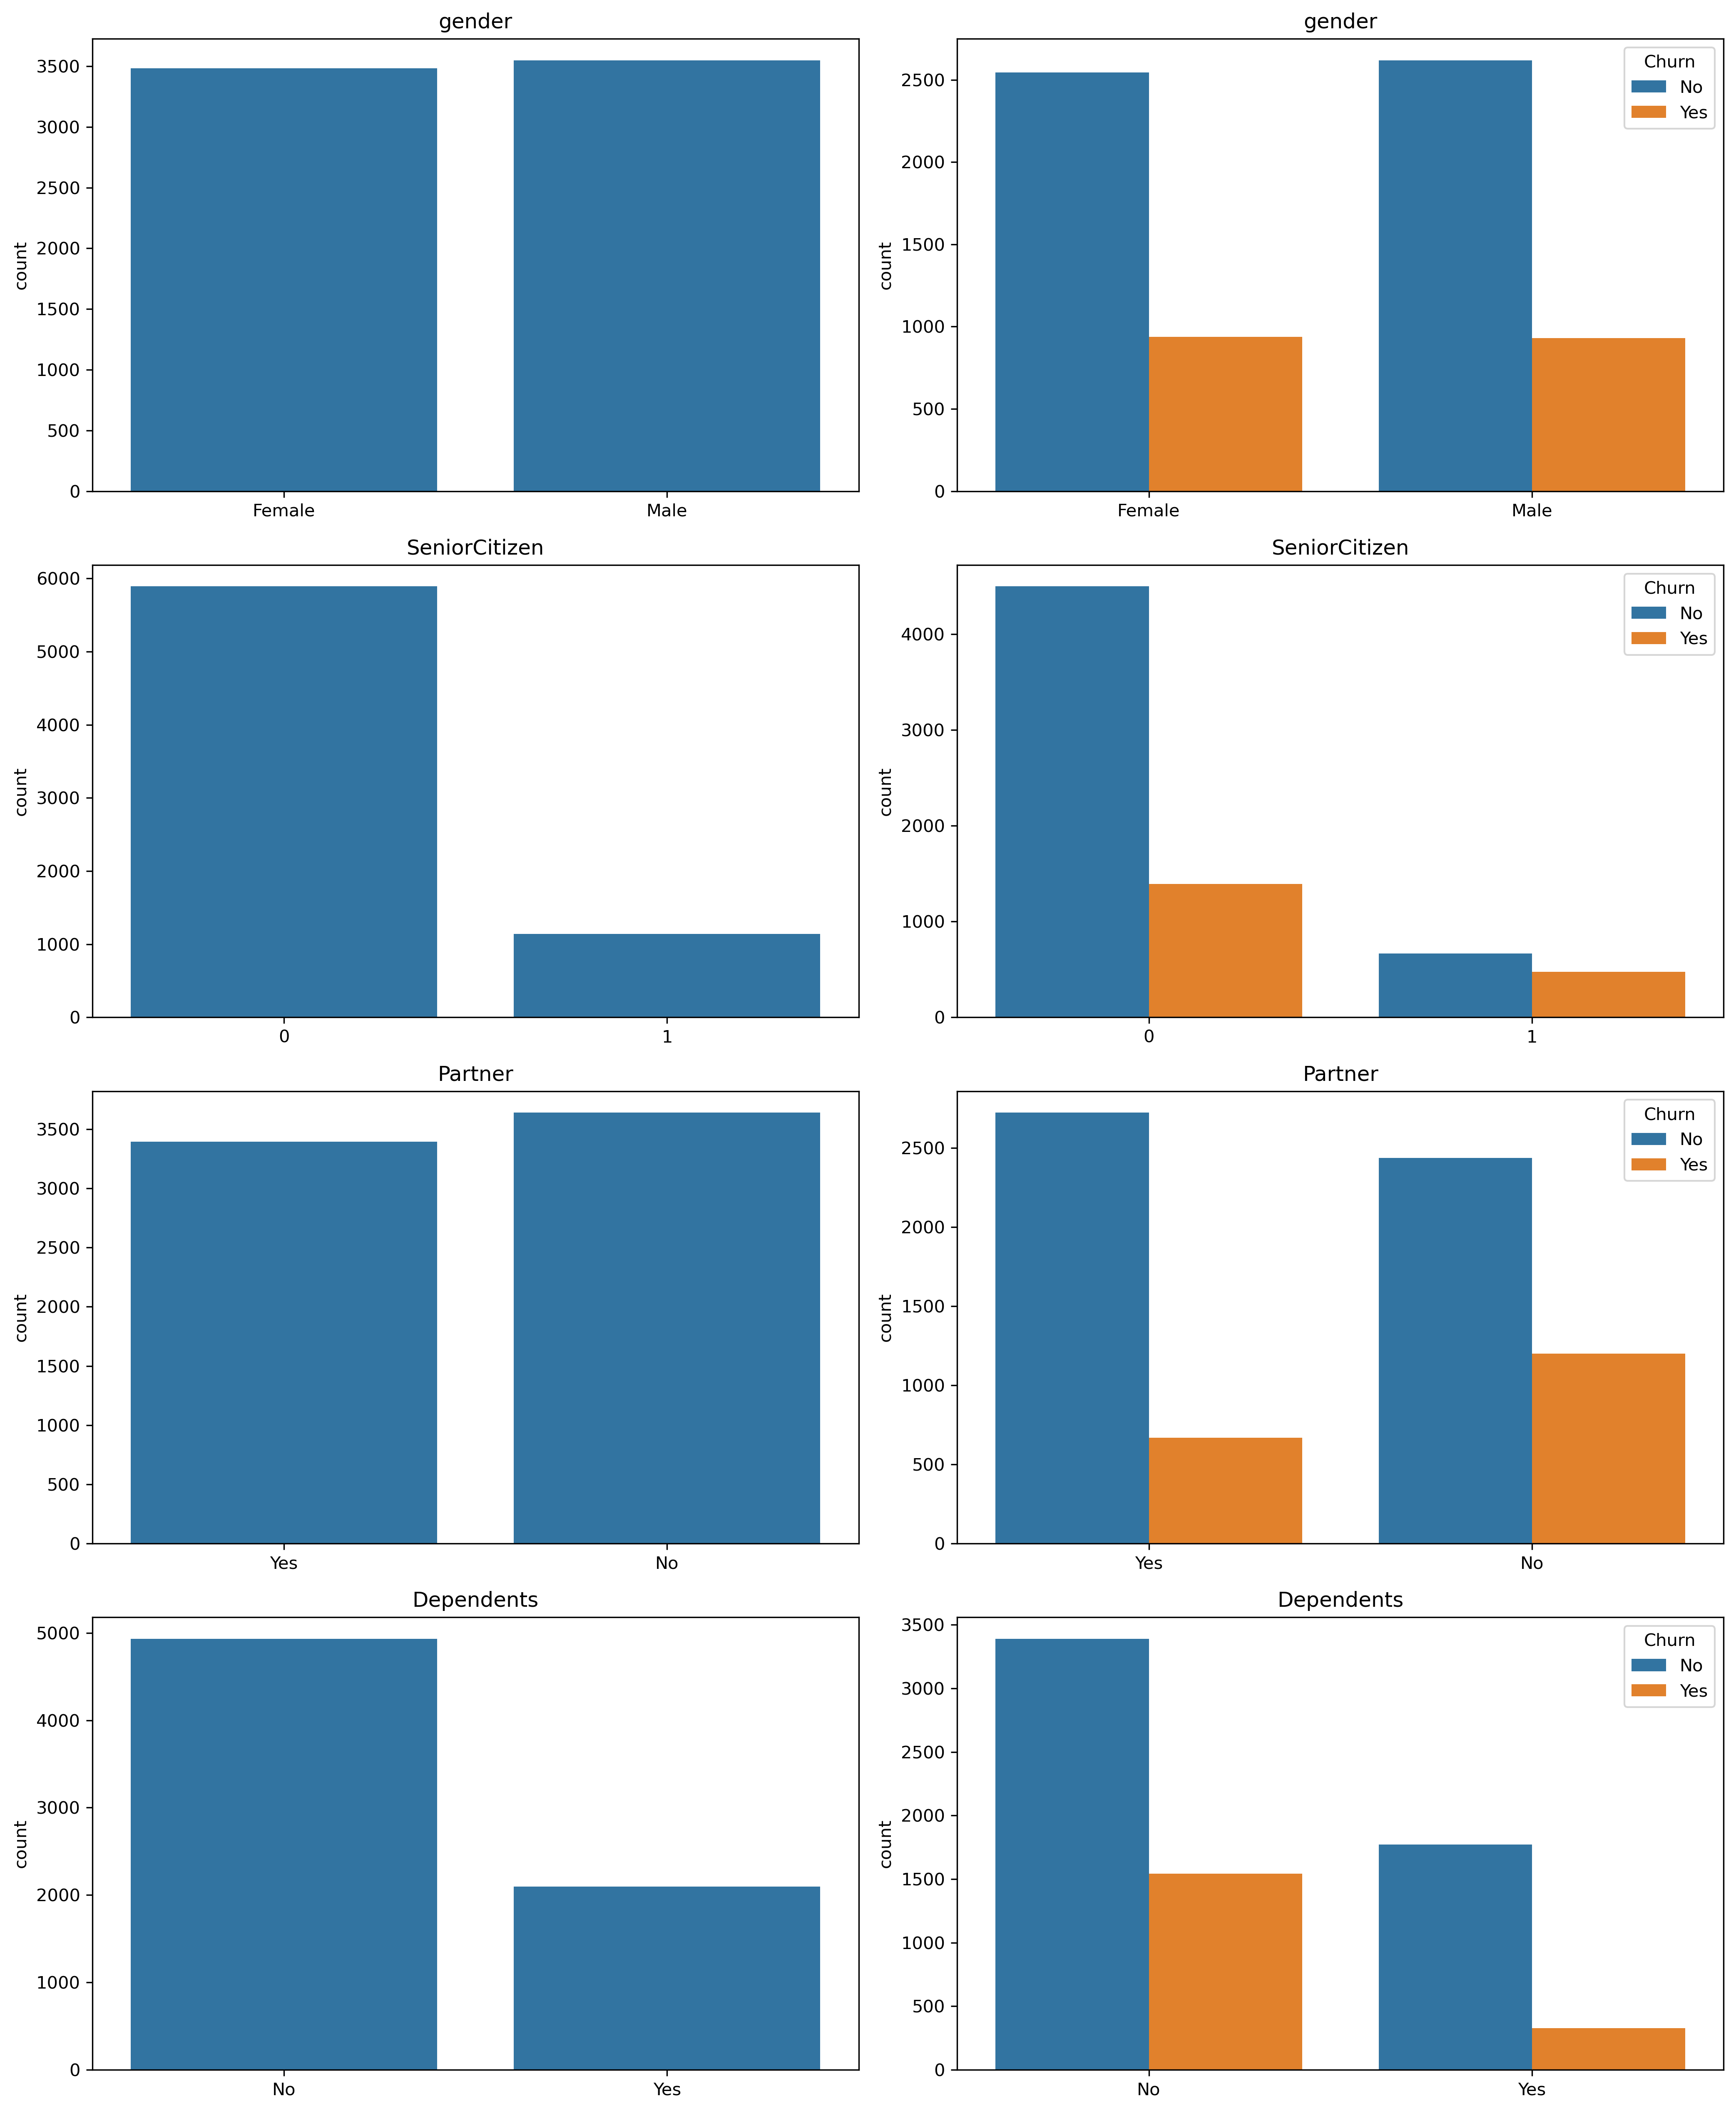

In [104]:
# Countplots for demographic variables
fig, ax = create_countplots(df, cat_demographics, 
                            "Churn", figsize=(14, 17));

From these visualisations, the following observations were made:

**gender**: 

The data show an almost equal split between male and female customers, meaning the gender distribution is roughly *uniform*. The churn rates for both genders also appear to be similar, with no significant differences between the two genders. This suggests that gender does not play a notable role in customer churn.

**SeniorCitizen**:

As highlighted earlier in the summary statistics, only around 15 to 20 percent of customers in the dataset are senior citizens, and this is clearly visible in the count plot - the majority of customers are non-seniors. Although there are more non-senior customers who churn overall, the proportion of senior citizens who churn is *noticeably higher* relative to their number. This suggests that senior citizens are *more likely to churn* compared to non-senior customers.

**Partner**: 

The distribution of customers with and without customers is relatively even, though there are slightly more customers without partners. The counts hover around 3,500 for both groups. The churn rate is *higher for customers without partners* compared to those with partners, suggesting that customers without a partner are more likely to churn, possibly due to more flexibility or fewer household-level commitments.

**Dependents**: 

A clear difference in distribution is visible between customers with and without dependents. Approximately two-thirds of the customers do not have dependents, while about one-third do. The rate of churn is *higher among customers without dependents*; this mirrors the pattern seen with **Partner**, where it was suggested that customers without partners were more likely to churn, further indicating that individuals with *fewer household responsibilities* may be more prone to churning.

#### Categorical Variables: Security and Support

Next, the security and support variables were visualised to examine whether a potential relationship with customer churn exists.

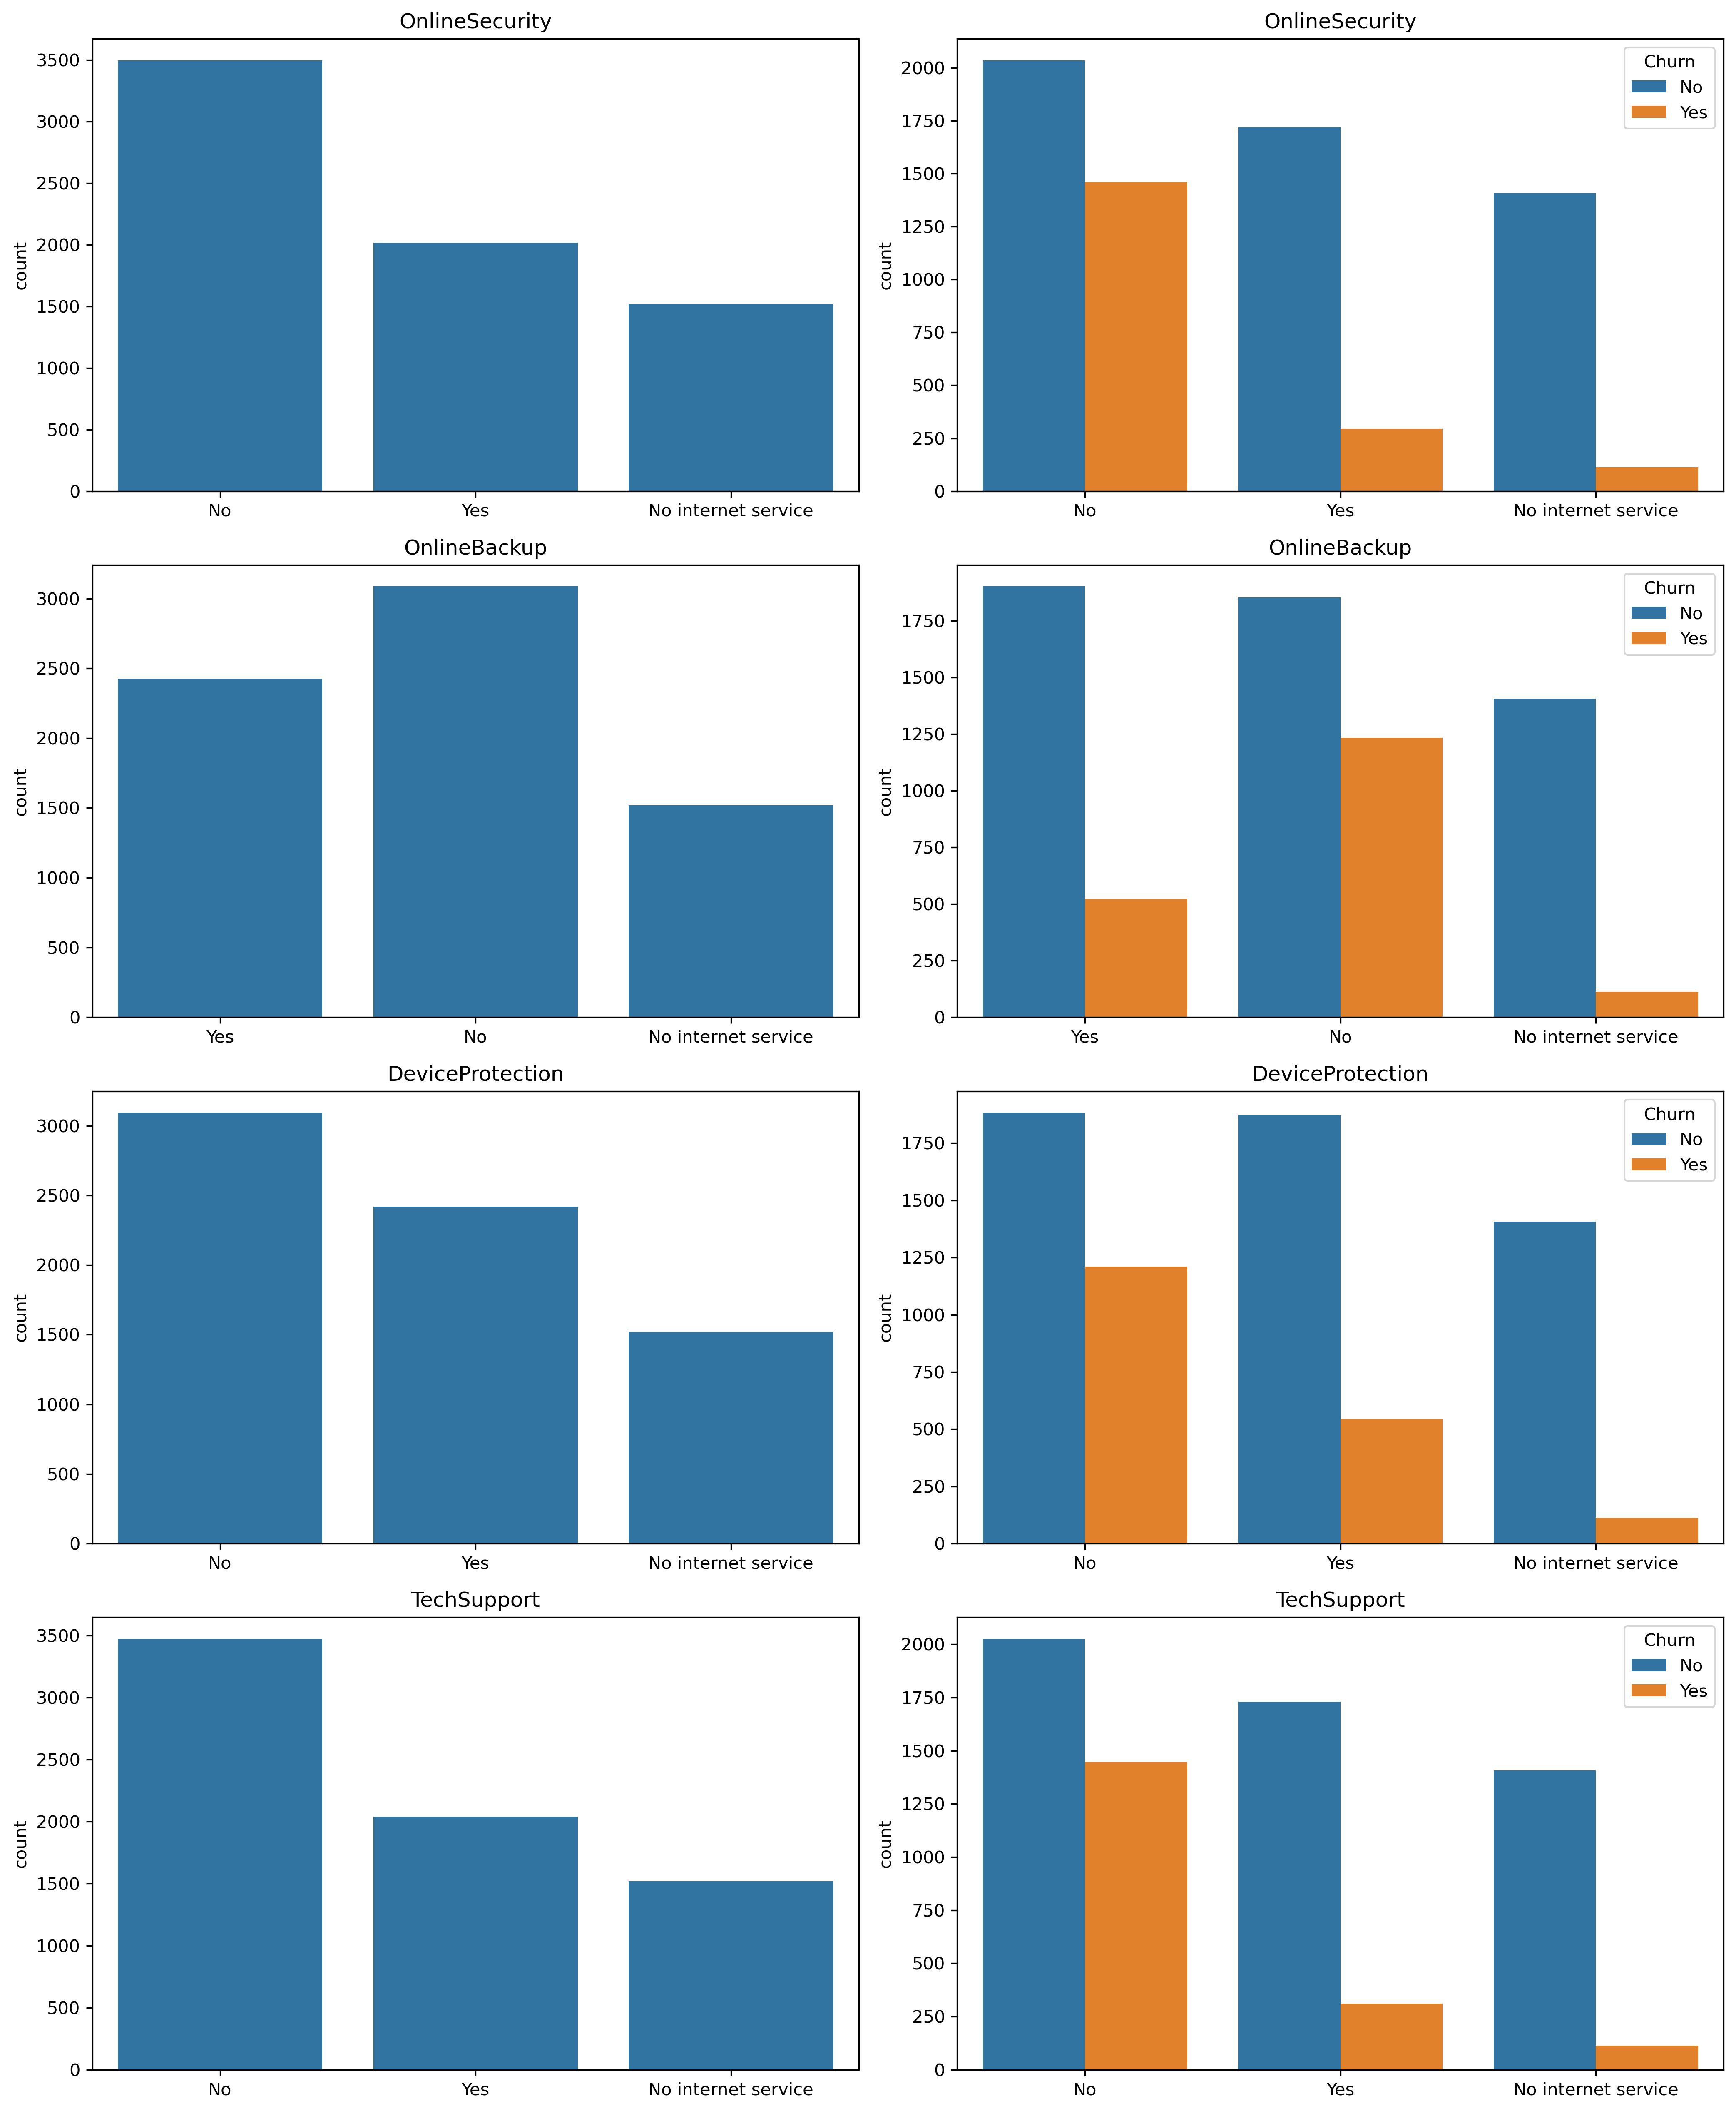

In [107]:
# Countplots for security and support variables
fig, ax = create_countplots(df, cat_security_support, 
                            "Churn", figsize=(14, 17));

The following observations were noted:

**OnlineSecurity**: 

About 50 percent of customers do not have online security, while close to a third have opted for online security services, and the remainder having no internet service. For customers *with* online security, there is approximately a *5:1 ratio* of no churn to churn. For those *without* online security, the ratio is roughly *4:3*, suggesting a much higher churn rate among customers who do not have online security. This indicates that customers without online security are more likely to churn, and appears to be a strong predictor of churn.

**OnlineBackup**:

Similarly to online security, just under half of the customers do not have online backup, while about a third have the service, and the remainder not having internet service at all. The no churn to churn ratio for customers *with* online backup is approximately *5:1*, whereas for those *without* the service, it looks to be around *3:2*. This points to a significantly higher churn rate for customers who do not have online backup, resembling the pattern seen with **OnlineSecurity**.

**DeviceProtection**: 

Around 50 percent of customers do not have device protection, and about a third have it, with the remainder having no internet service. Customers *with* device protection have a no churn to churn ratio of about *4:1*, whereas those *without* device protection have a ratio of around *3:2*. Like **OnlineSecurity** and **OnlineBackup**, a higher churn rate is evident among customers who do not have device protection, making this another strong predictor of churn.

**TechSupport**: 

Approximately half of the customers do not have tech support, while about one-third do, and the remainder having no internet service. The churn ratio for customers *with* tech support looks to be around *7:1*, whereas for those *without*, it is around *4:3*. This suggests that customers without tech support are far more likely to churn, further reinforcing the idea that access to security and support services is crucial for preventing churn.

A notable portion of customers in each of the above four variables have *no internet service*. Among this group, the churn rate is low and appears to have a ratio somewhere around *14:1*; out of the approximately *1,500 customers* without internet service, only about *100 have churned*, making churn rates among these customers relatively insignificant.

#### Categorical Variables: Billing and Payment

The subsequent visualisations focused on billing and payment variables, including contract type, to analyse their relationship with churn.

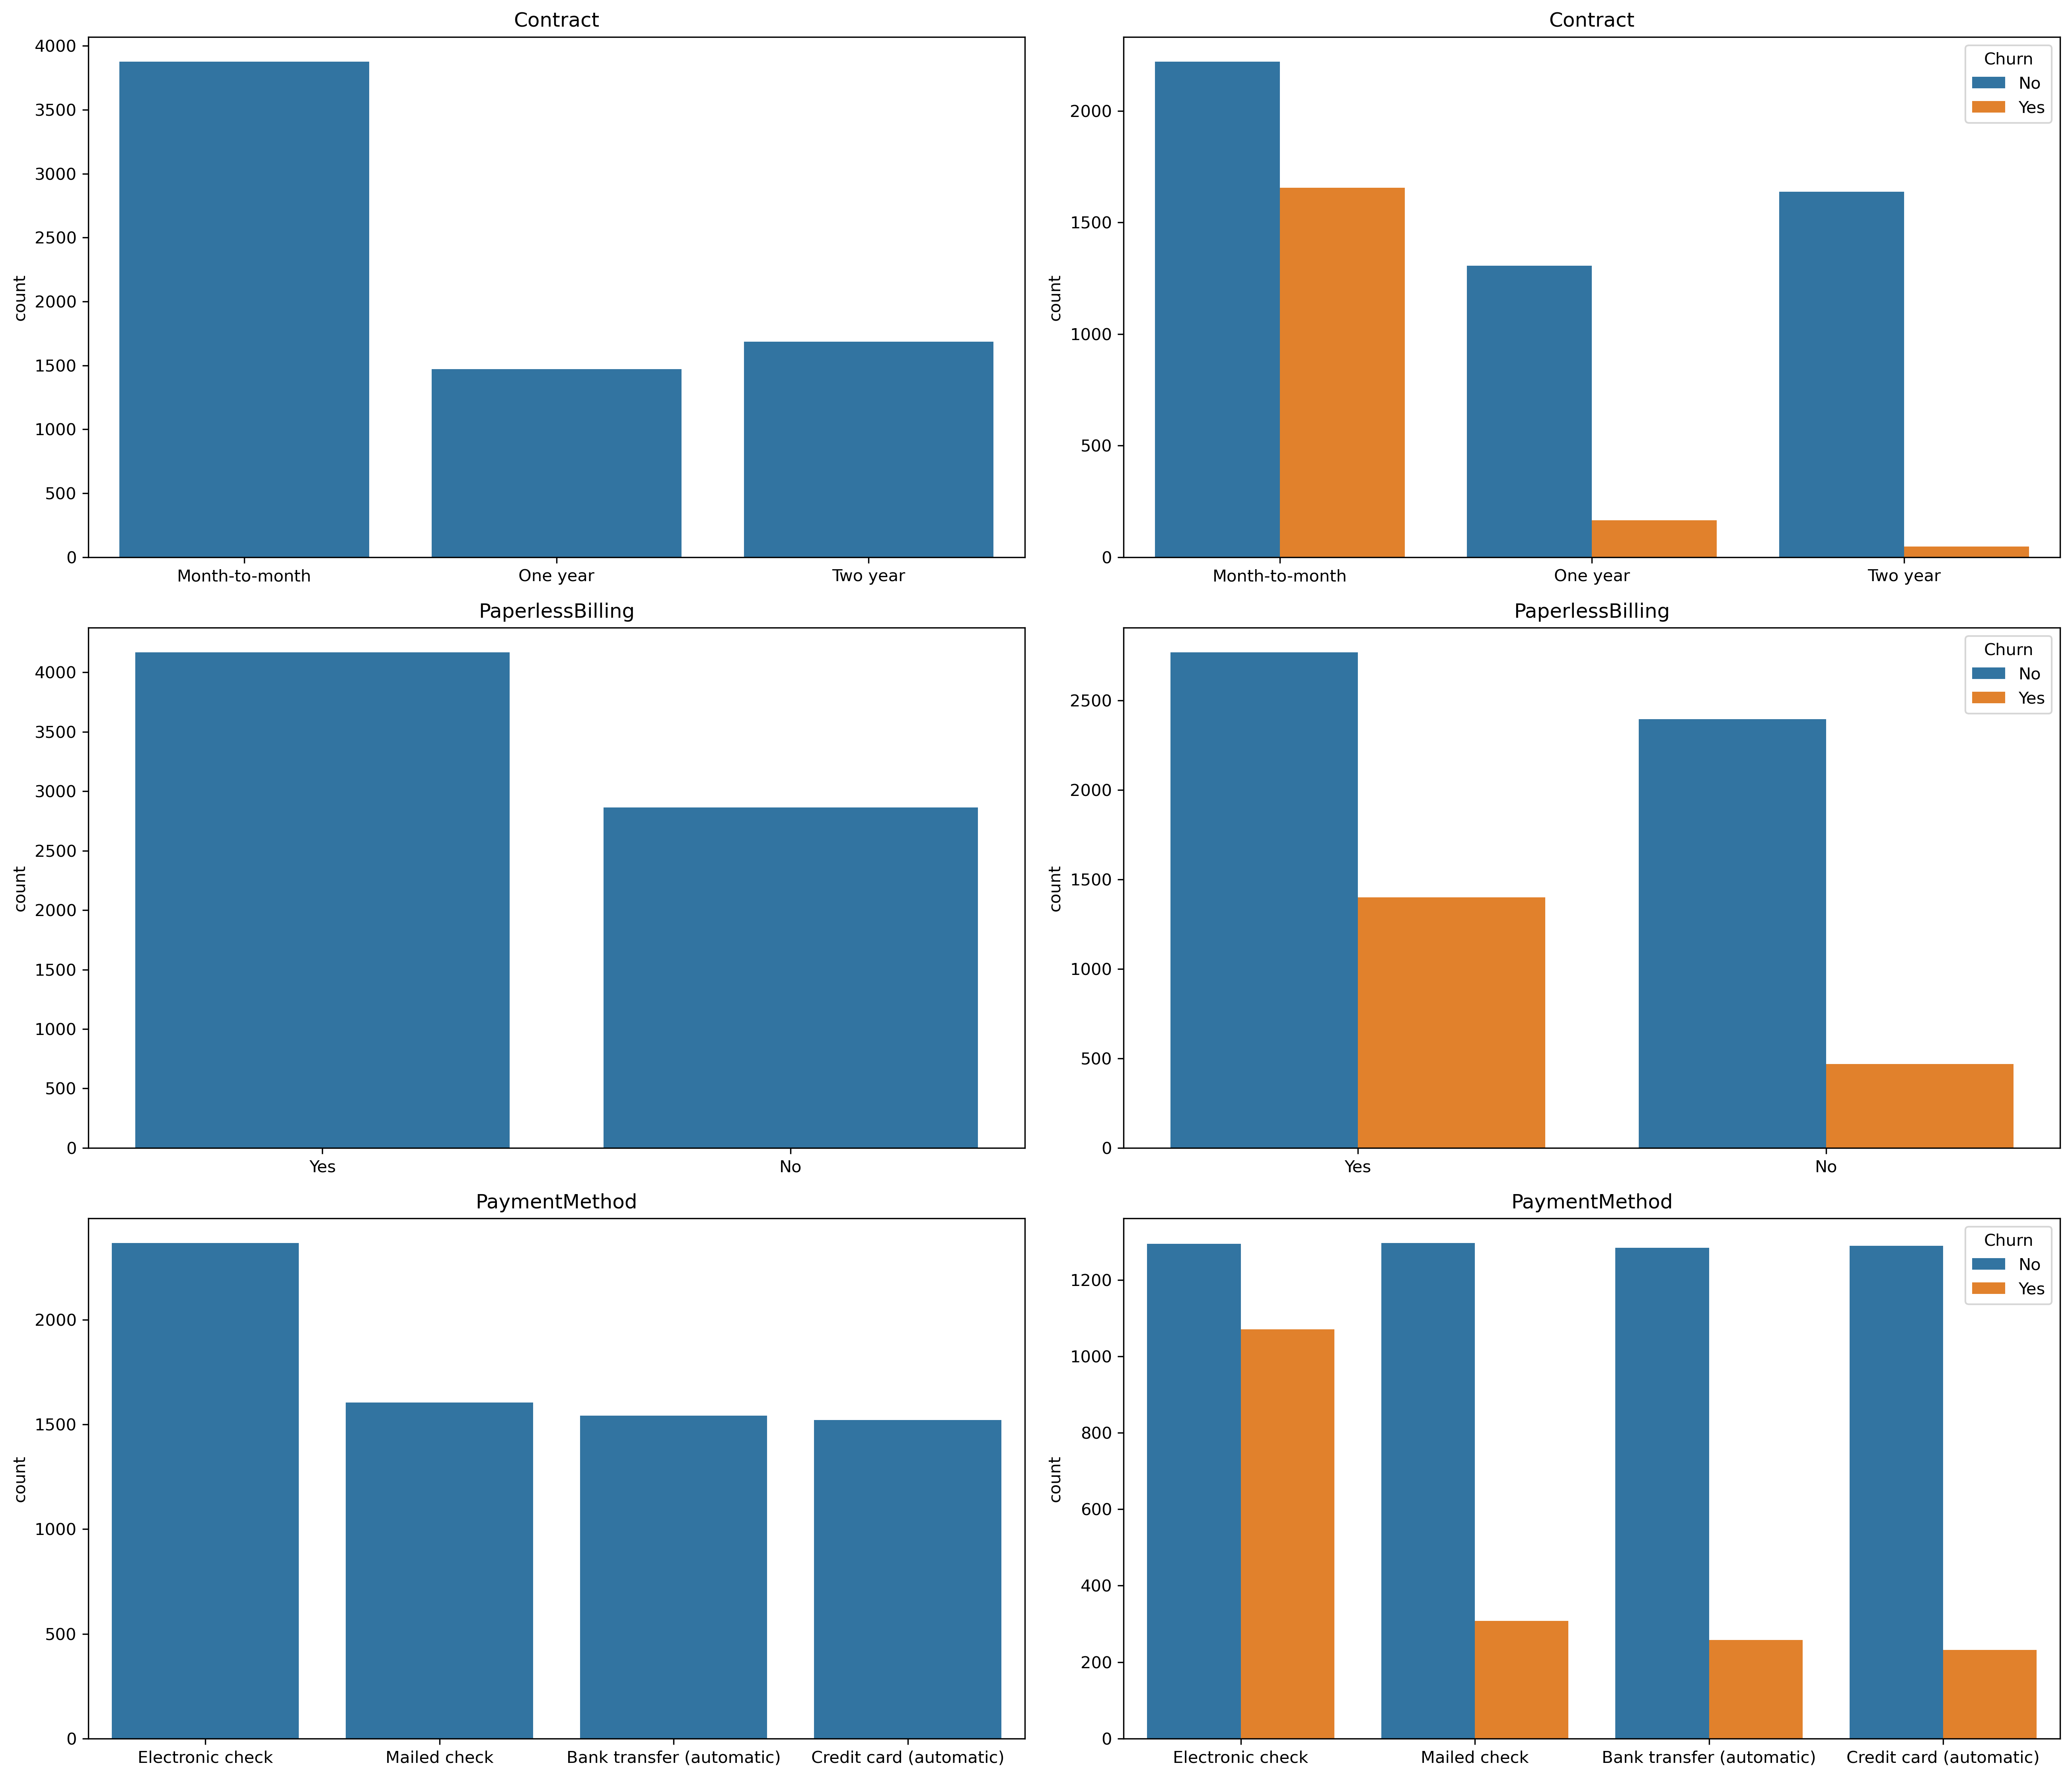

In [110]:
# Countplots for billing and payment variables
fig, ax = create_countplots(df, cat_billing_payment, 
                            "Churn", figsize=(17.5, 15));

The following insights were noted:

**Contract**: 

Approximately 50 to 60 percent of customers have month-to-month contracts, with the remaining 40 percent split roughly equally between one-year and two-year contracts, with a slightly larger proportion of two-year contract holders. Customers *with two-year contracts* show an almost *negligible churn rate*. For *one-year contracts*, the no churn to churn ratio is approximately *8:1*, which is still relatively low. In contrast, for *month-to-month contracts*, the ratio is about *4:3*, implying a much higher churn rate. This suggests that customers with month-to-month contracts are more likely to churn, while longer-term contracts may act as a deterrent to churning, likely due to cancellation fees that increase with early terminations.

**PaperlessBilling**: 

Roughly two-thirds of customers have opted for paperless billing, while around *one-third* have not. The churn rate is higher among customers *with* paperless billing, with a no churn to churn ratio of approximately *2:1*. In comparison, customers *without* paperless billing have a much lower churn rate, with a ratio of around *5:1*, suggesting that paperless billing may be associated with higher instances of churn.

**PaymentMethod**: 

Around 30 to 35 percent of customers pay by electronic cheque, while 20 to 25 percent pay by mailed cheque. The remaining customers are split roughly equally between automatic bank transfer and automatic credit card payments, each accounting for around 20 percent of customers. Churn rates appear relatively similar for *automatic bank transfer* and *credit card* payments, with a no churn to churn ratio of approximately *5:1*. *Mailed cheque* payments have a similar, though slightly higher churn rate, with a ratio of around *9:2*. However, the highest churn rate seems to be from customers using *electronic cheque*, with a ratio of around *13:11*, suggesting that payment by electronic cheque is a strong predictor of churn.

#### Categorical Variables: Service Type

The service type variables were then plotted to explore whether particular services report higher instances of churn.

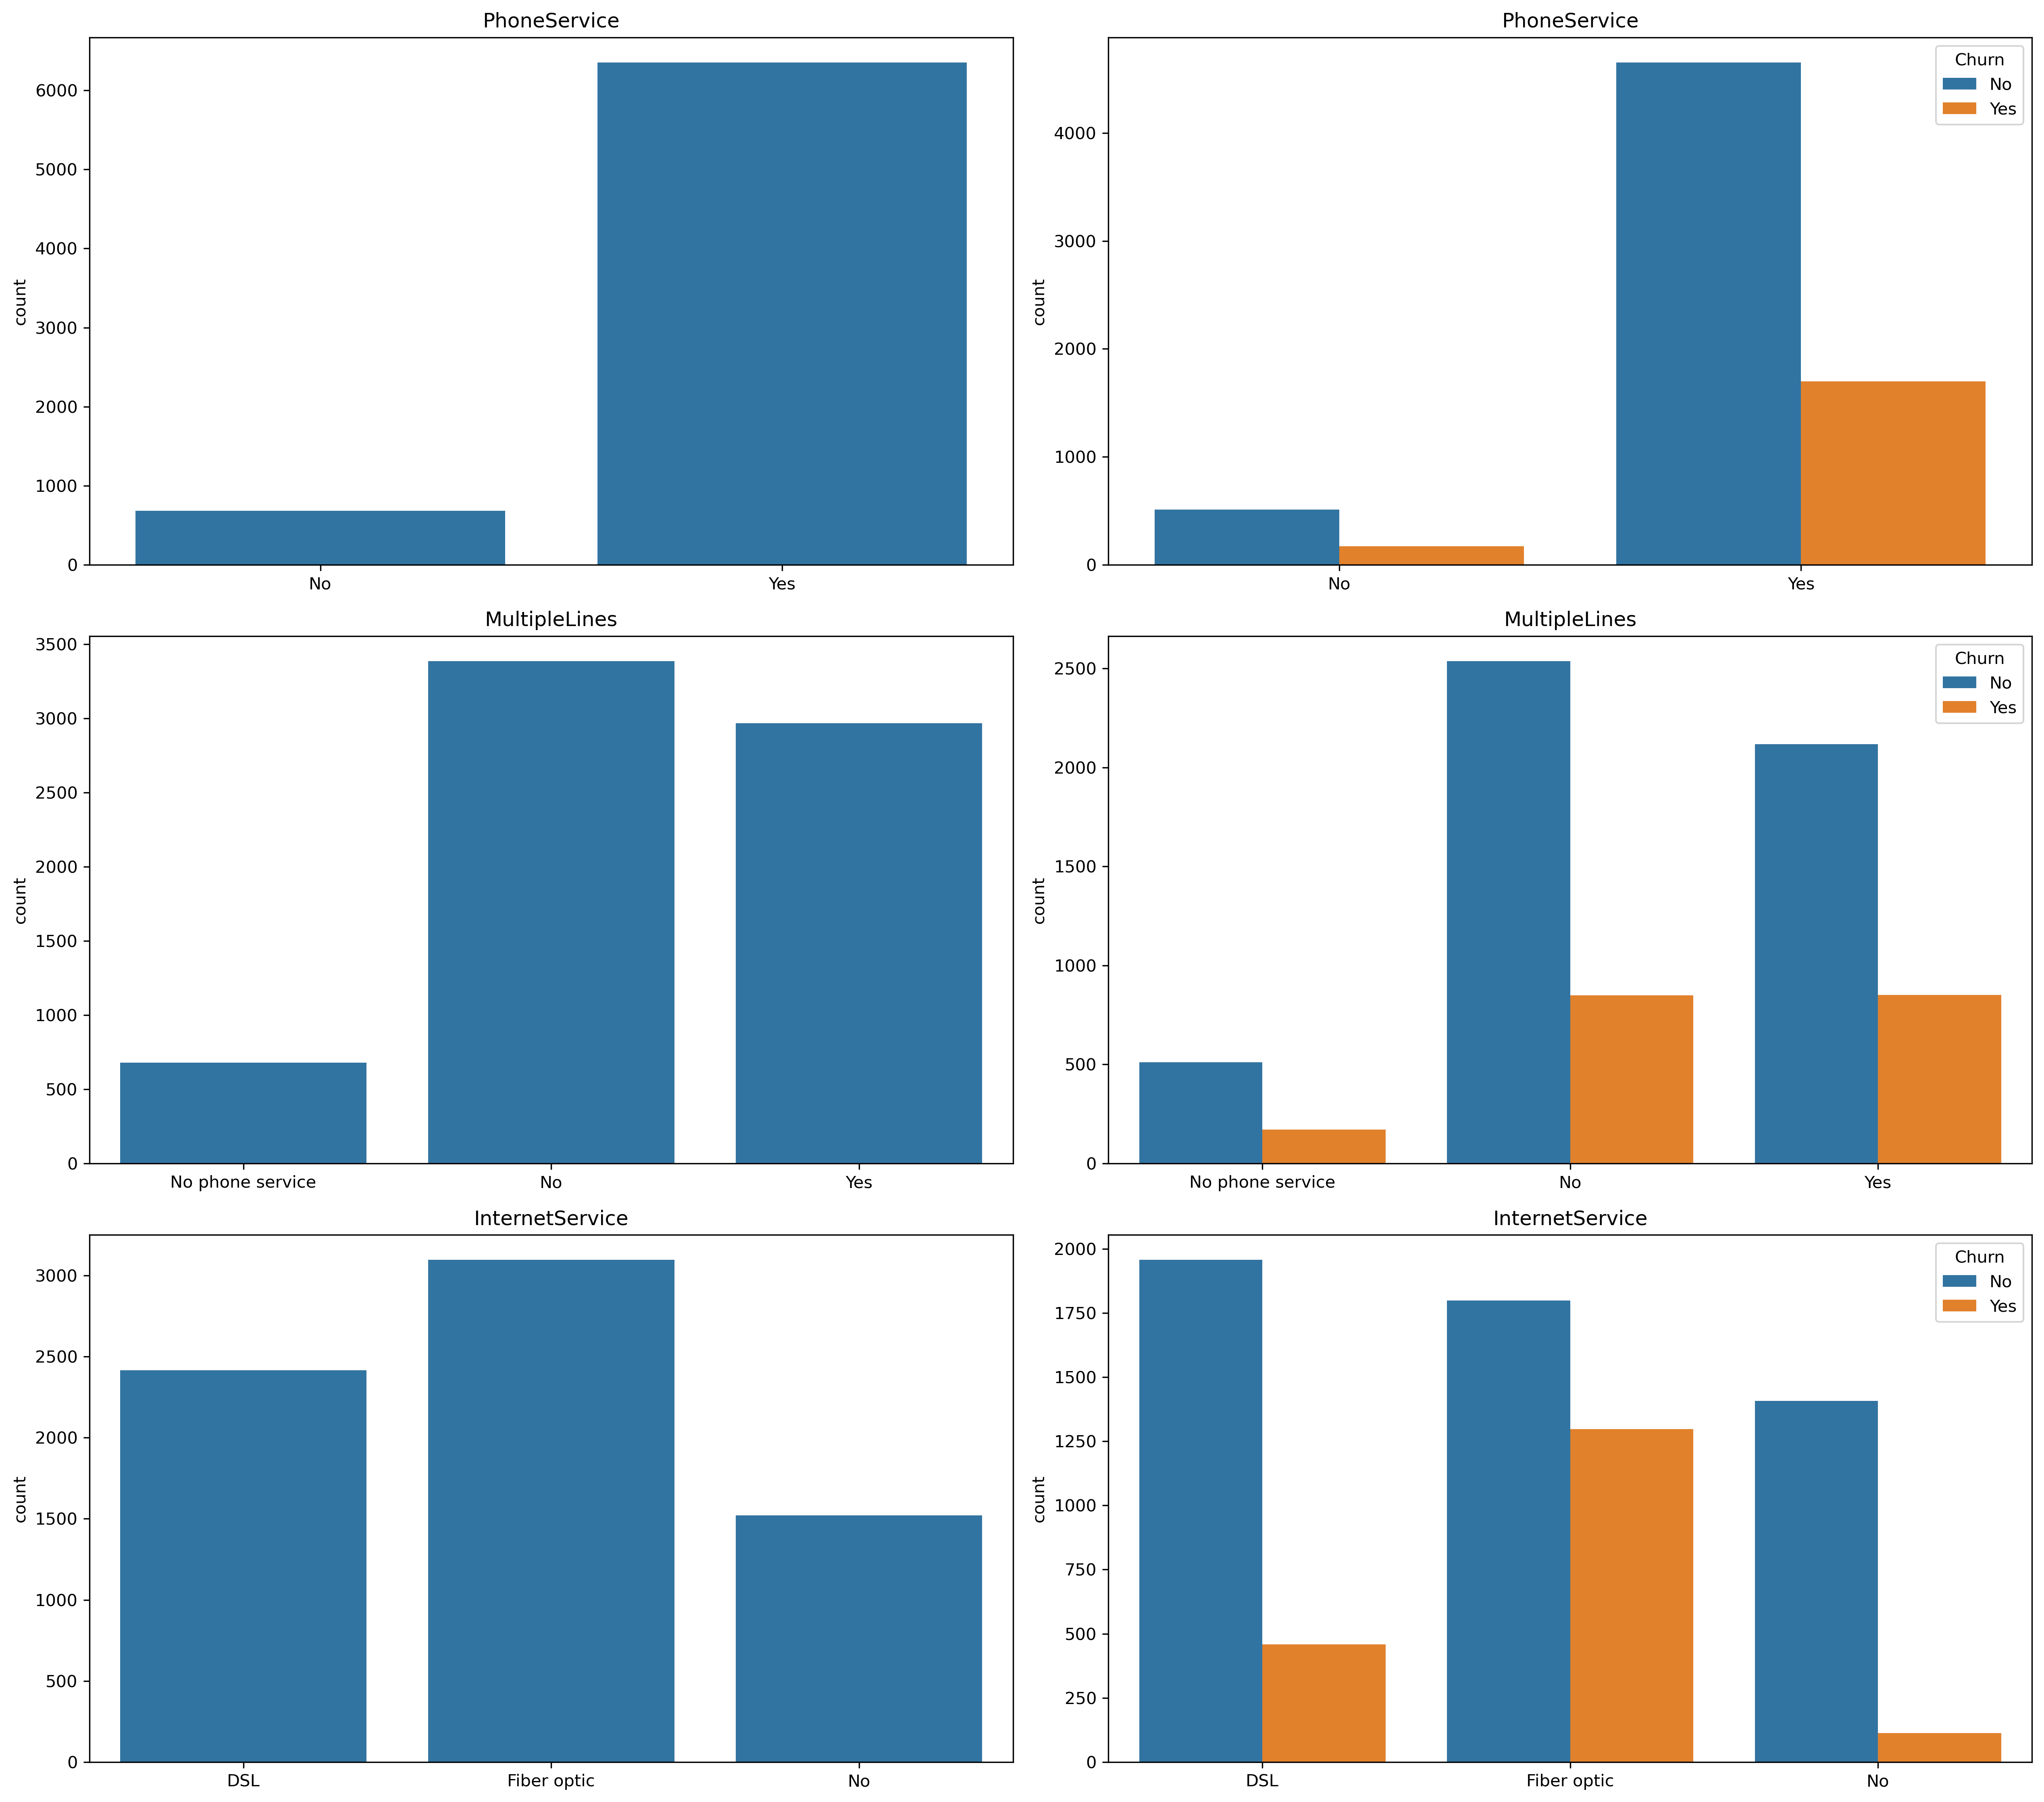

In [113]:
# Countplots for service type variables
fig, ax = create_countplots(df, cat_service_type, 
                            "Churn", figsize=(17, 15));

The following observations were noted:

**PhoneService**: 

A significantly higher number of customers have phone service (about 90 percent) than do not (about 10 percent), though the churn ratio is roughly *proportional between both groups*, with a no churn to churn ratio of about *3:1*. This suggests that phone service alone is not a strong predictor of churn.

**MultipleLines**: 

Roughly 10 percent of customers do not have phone service lines, as noted earlier. The churn rates differ slightly between customers with and without multiple lines. There are a *similar number* of customers *with* multiple lines compared to *without*, though a slightly higher number without (about 50 percent without compared to 40 percent with, respectively). The no churn to churn ratio in customers *without* multiple lines is about *3:1*; for customers *with* multiple lines, the ratio is about *5:2*. Hence there appears to be a slightly higher likelihood of churn among customers with multiple lines compared to those without, though the difference is not huge.

**InternetService**: 

As previously observed in the summary statistics, the most popular internet service is fibre optic, with just under 50 percent of customers using it. Around one-third of customers use DSL, and approximately 20 percent of customers have no internet service, a pattern echoed across the security and support as well as streaming service variables. The no churn to churn ratio for customers using *DSL* as their internet service is about *4:1*; in contrast, for *fibre optic* the ratio is about *7:5*, indicating that using fibre optic internet is associated with a high rate of churn. This could potentially be due to issues with the service, leading to customer frustration.

#### Categorical Variables: Streaming Services

Finally, streaming services were looked at in order to assess whether these variables might contribute to churn in some way.

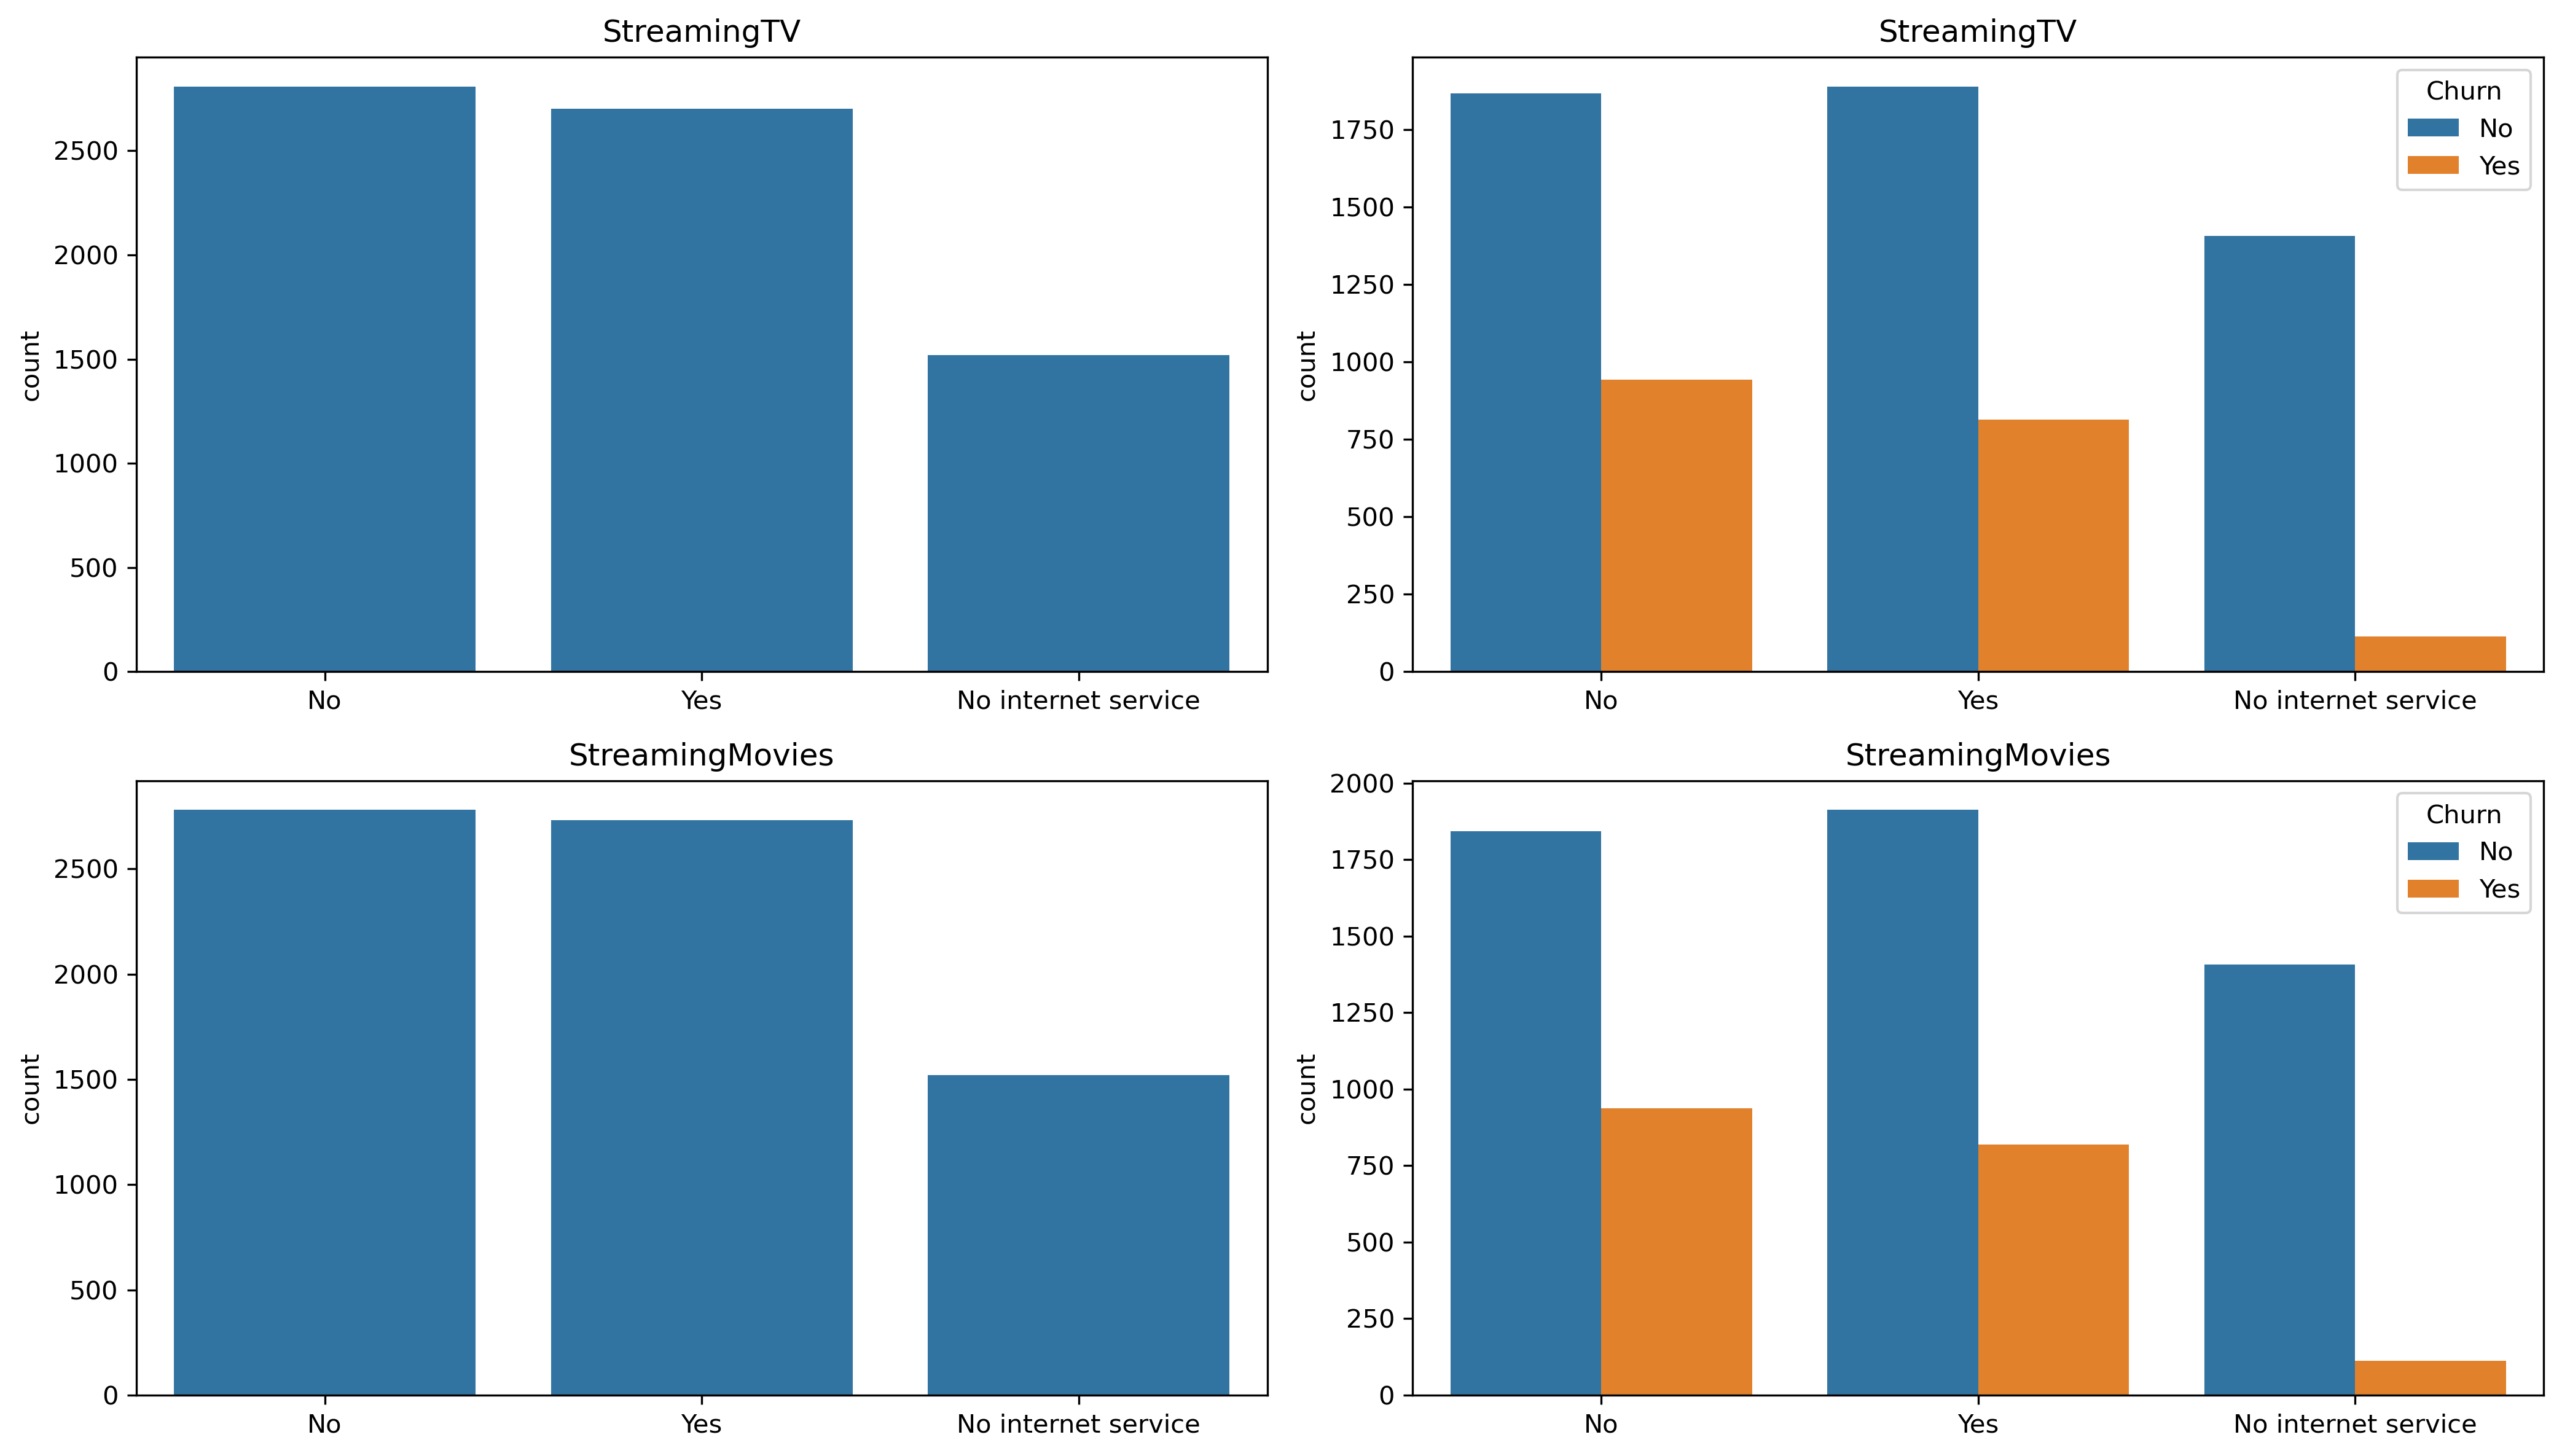

In [116]:
# Countplots for streaming services
fig, ax = create_countplots(df, cat_streaming, 
                            "Churn", figsize=(14, 8));

The following was noted in regards to streaming services:

**StreamingMovies**: 

Roughly an equal distribution of customers with and without streaming movie services, each making up about 40 percent of the total, with the remaining 20 percent of customers having no internet service. The churn ratio for *both groups* is about *2:1*, with slightly higher churn among customers without streaming movies. However, this difference is marginal, indicating that churn rates are mostly similar between both groups.

**StreamingTV**: 

The distribution mirrors that of **StreamingMovies**, with about 40 percent of customers in each category, excluding those without internet service. Similarly, the churn ratio is approximately *2:1* for *both groups*, with a slightly higher churn in customers that do not use streaming TV services. As with StreamingMovies, the churn rates between both groups are mostly similar.

Overall, it doesn't seem like customer churn is heavily influenced by whether or not they subscribe to streaming services.

#### Summary of Visualisation Findings

In analysing the visualisations, the following categories were identified as significant indicators of churn:

- **SeniorCitizen**: *1 (Yes)*
- **Partner**: *No*
- **Dependents**: *No*
- **OnlineSecurity**: *No*
- **OnlineBackup**: *No*
- **DeviceProtection**: *No*
- **TechSupport**: *No*
- **ContractType**: *Month-to-month*
- **PaperlessBilling**: *Yes*
- **PaymentMethod**: *Electronic check*
- **InternetService**: *Fiber optic*

These key categories were further explored, once value counts were obtained, by calculating their corresponding churn percentages relative to both their respective variables and the overall dataset.

#### Value Counts and Percentages

To begin, value counts for each categorical variable were calculated and displayed.

In [120]:
# Loop through categorical columns
for col in cat_columns:
    # Obtain and print column value counts for colum
    value_counts = df[col].value_counts()
    print(f"\nValue counts for {value_counts}")


Value counts for gender
Male      3549
Female    3483
Name: count, dtype: int64

Value counts for SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

Value counts for Partner
No     3639
Yes    3393
Name: count, dtype: int64

Value counts for Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Value counts for PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Value counts for MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

Value counts for InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Value counts for OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

Value counts for OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

Value counts for DeviceProtection
No                     3094
Yes  

The value counts appeared consistent with the patterns observed in the visualisations. Percentages were then calculated and  to gain a clearer picture of the category distributions.

In [122]:
# Loop through categorical columns
for col in cat_columns:
    # Obtain and print percentages
    vc_percentages = np.round(
        df[col].value_counts() / len(df) * 100, 2
    ) 
    print(f"\nPercentage of customers for {vc_percentages}")


Percentage of customers for gender
Male      50.47
Female    49.53
Name: count, dtype: float64

Percentage of customers for SeniorCitizen
0    83.76
1    16.24
Name: count, dtype: float64

Percentage of customers for Partner
No     51.75
Yes    48.25
Name: count, dtype: float64

Percentage of customers for Dependents
No     70.15
Yes    29.85
Name: count, dtype: float64

Percentage of customers for PhoneService
Yes    90.33
No      9.67
Name: count, dtype: float64

Percentage of customers for MultipleLines
No                  48.14
Yes                 42.19
No phone service     9.67
Name: count, dtype: float64

Percentage of customers for InternetService
Fiber optic    44.03
DSL            34.36
No             21.62
Name: count, dtype: float64

Percentage of customers for OnlineSecurity
No                     49.73
Yes                    28.65
No internet service    21.62
Name: count, dtype: float64

Percentage of customers for OnlineBackup
No                     43.90
Yes            

The percentages align closely with the estimations made when analysing the visualisations. Key observations include that a majority of customers hold *month-to-month contracts* and utilise *paperless billing*. Additionally, a significant proportion of customers (between 40 to 50 percent) *lack security and support services*, which could highlight an area for improvement in service offerings to customers, and potentially prevent customers from churning.

Several key metrics, including churn rates and percentages for the key categories noted earlier (see *Summary of Visualisation Findings*), were then collected and stored in a DataFrame for further analysis.

In [124]:
# Define key categories
key_cats = {
    "SeniorCitizen": 1, 
    "Partner": "No", 
    "Dependents": "No", 
    "PaperlessBilling": "Yes", 
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No", 
    "OnlineBackup": "No", 
    "DeviceProtection": "No", 
    "TechSupport": "No", 
    "Contract": "Month-to-month", 
    "PaymentMethod": "Electronic check"
}

# Initialise dictonary for category metrics
key_cat_metrics = {}
# Define total number of churners in dataset
total_churners = len(df[df["Churn"] == "Yes"])

# Collect metrics for each category
for variable, category in key_cats.items():
    
    # Define category name
    name = f"{variable} ({category})"

    # Calculate total number of customers in category
    cat_count = df[variable].value_counts().loc[category]
    
    # Filter DataFrame by variable and category
    feature_data = df[df[variable] == category]

    # Calculate number of churners in category
    churner_count = feature_data[feature_data["Churn"] == "Yes"].shape[0]

    # Define rate and percentage in category
    churn_rate = churner_count / cat_count
    churn_perc = np.round(churn_rate * 100, 2)
    
    # Find percentage with respect to total churners and total dataset
    percentage_of_churners = np.round(
        churner_count / total_churners * 100, 2
    )
    percentage_of_dataset = np.round(
        churner_count / len(df) * 100, 2
    )

    # Add to metrics dictionary
    key_cat_metrics[name] = (
        churn_rate,
        churn_perc,
        percentage_of_churners,
        percentage_of_dataset
    )

In [125]:
# Create DataFrame for key categories
key_cat_df = pd.DataFrame(
    key_cat_metrics
).T.reset_index()

# Define column names
key_cat_columns = [
    "Category",
    "Churn rate in category",
    "Percentage of churn in category",
    "Percentage of total churners",
    "Percentage of total dataset"
]

# Update DataFrame column names
key_cat_df.columns = key_cat_columns

In [126]:
key_cat_df

Category  Churn rate in category  \
0                  SeniorCitizen (1)                0.416813   
1                       Partner (No)                0.329761   
2                    Dependents (No)                0.312791   
3             PaperlessBilling (Yes)                0.335893   
4      InternetService (Fiber optic)                0.418928   
5                OnlineSecurity (No)                0.417787   
6                  OnlineBackup (No)                0.399417   
7              DeviceProtection (No)                0.391403   
8                   TechSupport (No)                0.416475   
9          Contract (Month-to-month)                0.427097   
10  PaymentMethod (Electronic check)                0.452854   

    Percentage of churn in category  Percentage of total churners  \
0                             41.68                         25.47   
1                             32.98                         64.21   
2                             31.28                         82.56   
3                             33.59                         74.91   
4                             41.89                         69.40   
5                             41.78                         78.17   
6                             39.94                         65.97   
7                             39.14                         64.79   
8                             41.65                         77.37   
9                             42.71                         88.55   
10                            45.29                         57.30   

    Percentage of total dataset  
0                          6.77  
1                         17.06  
2                         21.94  
3                         19.91  
4                         18.44  
5                         20.78  
6                         17.53  
7                         17.22  
8                         20.56  
9                         23.54  
10                        15.23

In analysing the key categories, several interesting observations were made. To support these observations, the **Churn percentage in category**, **Percentage of total churners**, and **Percentage of total dataset** columns were all visualised below with respect to **Category**.

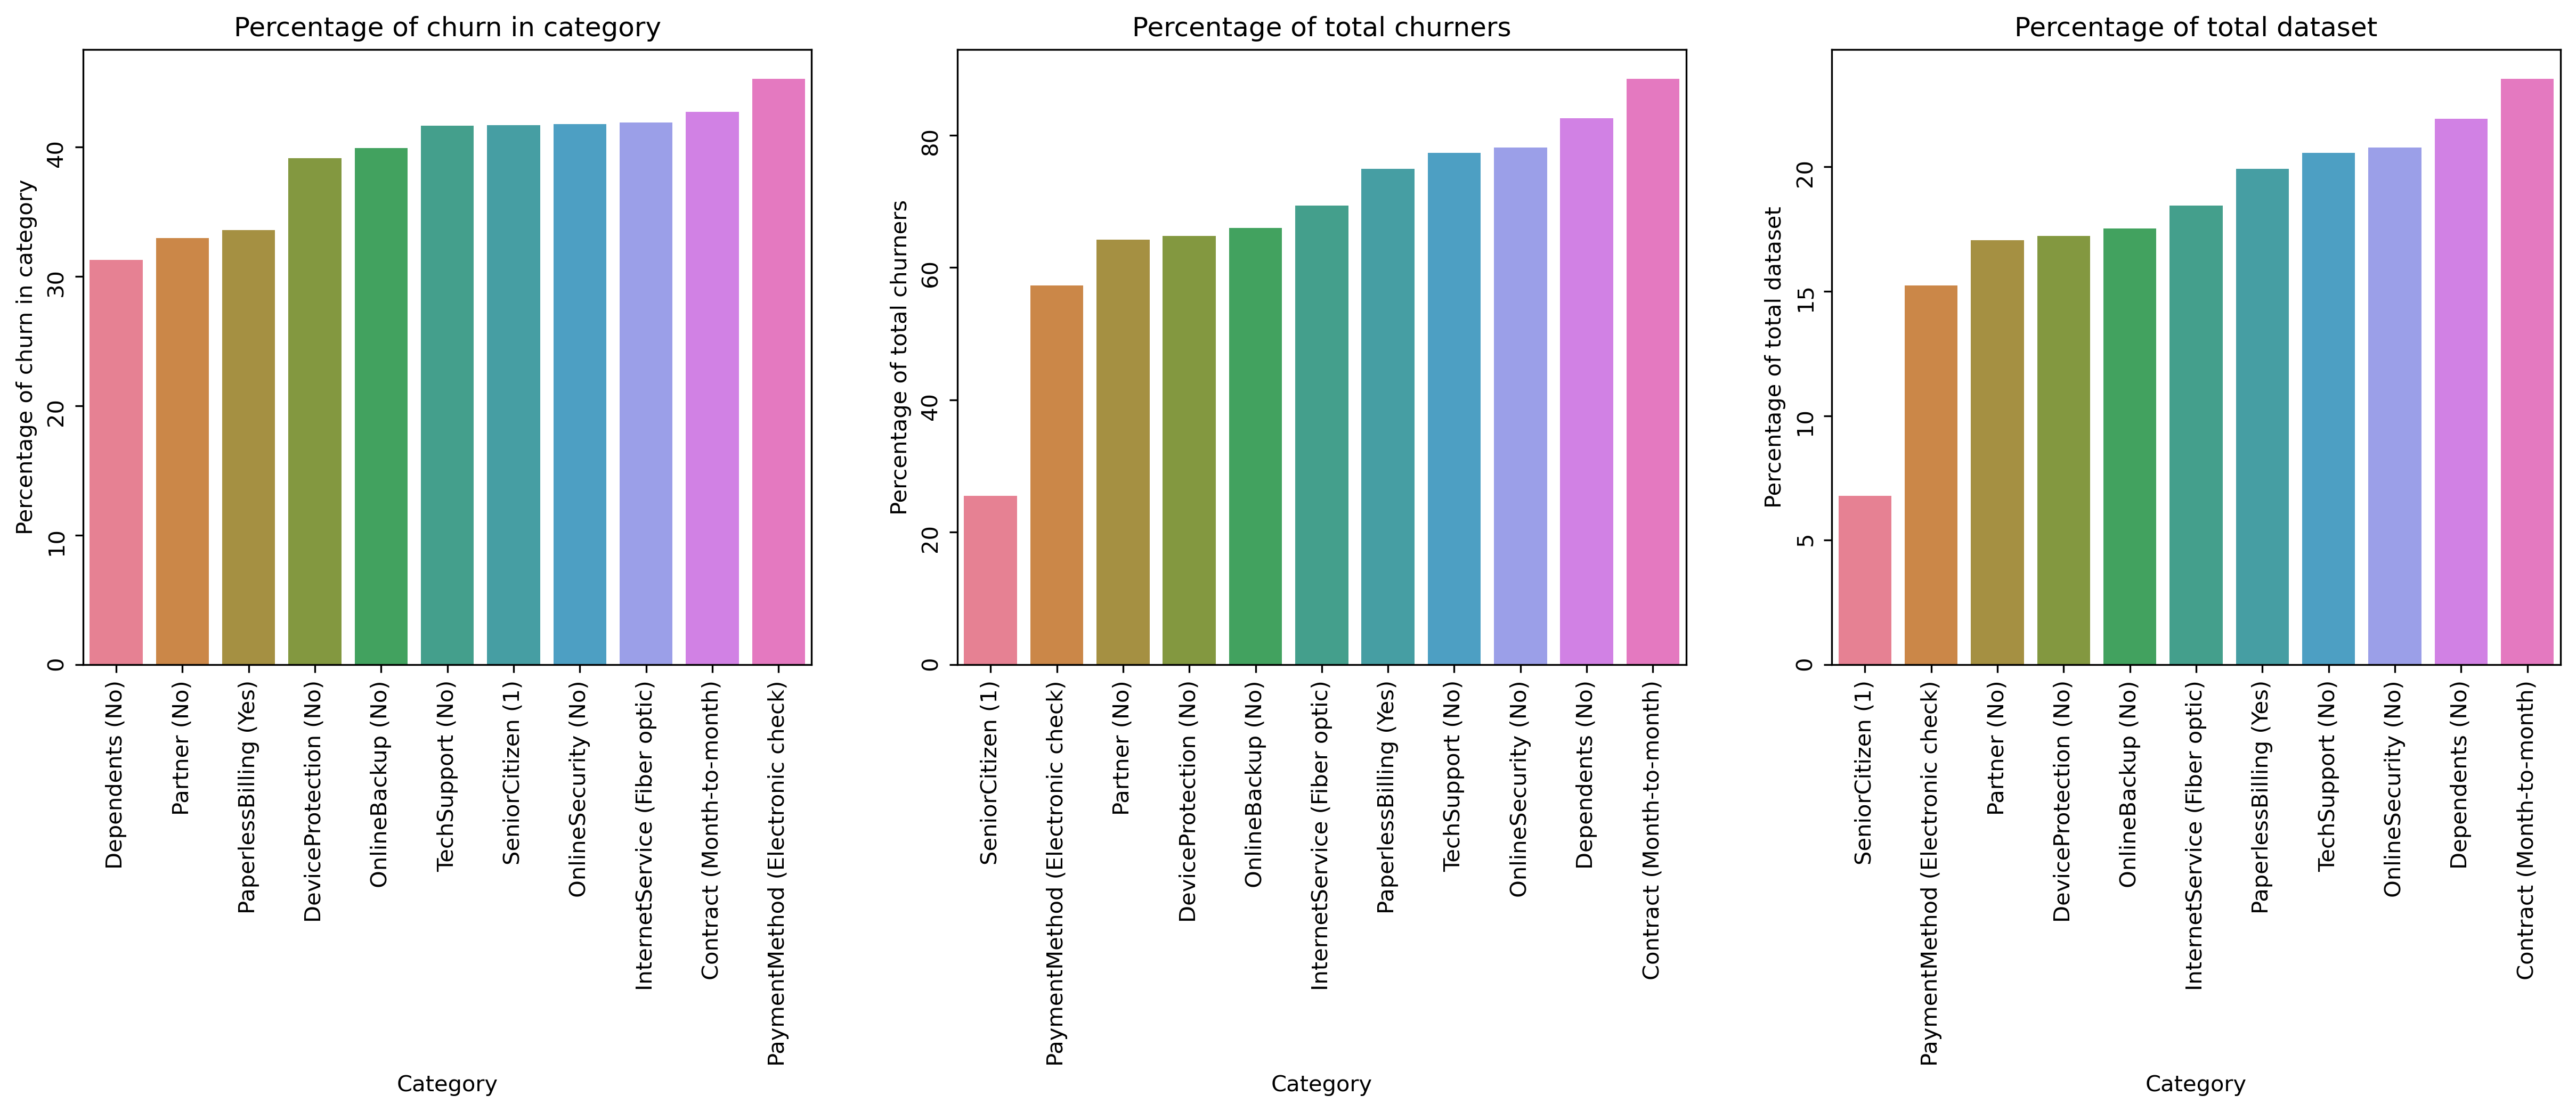

In [128]:
# Define columns to plot
columns_to_plot = key_cat_df.columns[2:]

# Set figure parameters
fig, ax = plt.subplots(1, 3, figsize=(20,5), dpi=300)

# Loop over subplots grid
for col, n in zip(columns_to_plot, range(3)):
    # Sort DataFrame 
    sorted_key_df = key_cat_df.sort_values(col)
    # Plot column
    sns.barplot(sorted_key_df, x="Category", 
                y=col, ax=ax[n], hue="Category")

    # Set title and rotate ticks
    ax[n].tick_params(labelrotation=90)
    ax[n].set_title(col)

# Show the plots
plt.show()

The visualisations helped to reveal some noteworthy trends:

- **All key categories** have churn rates exceeding *0.3*, corresponding to *30 percent*.
- **Electronic Cheque payments show the highest churn rate** at *45.29 percent*, closely followed by Month-to-month contracts at *42.71 percent*. Fibre optic internet users (*41.89 percent*), lack of online security (*41.78 percent*), senior citizens (*41.68 percent*), and lack of tech support (*41.65 percent*) also have significant churn rates above *40 percent*.
- **Month-to-month contracts** account for *88.55 percent of total churners*. Similarly, customers with **no dependents** represent *82.56 percent* of total churners, while **paperless billing** users account for *74.91 percent*.
- The absence of **security and support services**, especially **online security** (*78.17 percent*) and **tech support** (*77.37 percent*) is prevalent among churners.
- Despite having a significant curn rate, **senior citizens** make up the lowest number of total churners at only *25.47 percent*, though this is still a significant contribution to churn.
- **Electronic cheque payments**, despite having the highest churn rate, is the second lowest contributor to total churn at *57.30 percent*, though this is still more than double the contribution of senior citizens.
- Having **no dependents** shows the lowest churn rate at *31.28 percent*, which contrasts its status as second highest contributor to percentage of total churners.

The findings indicated that customers with **month-to-month contracts** likely represent the most critical category for churn. Not only do they have a high churn rate of around *42 percent*, but they also constitute the largest proportion of total churners at near an overwhelming *90 percent*. Similarly, a lack of **security and support services**, including **online security**, **online backup**, **device protection** and **tech support**, is highly prevalent among churners, with churn rates around *40 percent* and contributing between *65 and 78 percent* of total churners. Hence these customers should be a priority group for targeted customer retention strategies.

Although **electronic cheque payments** account for a lower percentage of total churners, the category stands out for its particularly high churn rate, which is close to *45 percent*. This suggests that payment method also plays an important role in customer retention.

While factors like **paperless billing** and **no dependents** exhibit lower churn rates, they still represent substantial proportions of total churners, with nearly *75 percent* of churners using paperless billing and over *80 percent* having no dependents. Hence these factors are still worth considering despite their lower churn rates.

The final steps of the exploratory data analysis involve conducting a *chi-squared test* on *all* categorical variables to further validate the relationships identified.

#### Chi-squared Test for Independence between Categorical Variables and Churn

To assess whether there were any statistically significant associations between **Churn** and the **categorical variables** in the dataset, a *chi-squared test for independence* was conducted. This test was selected since it's appropriate for determining whether two categorical variables are independent of each other, that is, that the occurence of one variable does not affect the occurence of another. This is ideal for understanding the relationship between **Churn** and the various customer attributes represented by the **categorical variables**. By testing for independence, the goal was to identify which variables are most strongly associated with churn.

As done with the *Mann-Whitney U-Test* earlier, a function was created to streamline the process and allow for efficient application of the *chi-squared test* across all the categorical variables.

In [131]:
def perform_chi_square_test(data, column_one, column_two):
    """
    Performs a chi-squared test of independence 
    on two columns of data. Creates a contingency
    table, performs the test, and evaluates the
    null hypothesis at the 5% and 1% significance
    levels. Takes a DataFrame 'data' and two
    columns 'column_one, column_two'.

    Returns a tuple with the chi-squared test 
    statistic and p-value, along with string messages 
    indicating whether or not the null hypothesis was 
    rejected (at the 5% and 1% significance level, 
    respectively).

    Note: The degrees of freedom and expected 
    frequencies ('dof' and 'freedom', respectfully) 
    are computed internally and not used in the 
    final output.
    """
    # Creating a contingency table
    contingency_table = pd.crosstab(data[column_one], data[column_two])

    # Perform chi-square test 
    stat, p, dof, expected = chi2_contingency(contingency_table)

    # Degrees of freedom (dof) and expected frequencies are
    # computed but not used in function output.

    # Interpret p-value
    if p < 0.05:
        five_sig = "Reject null hypothesis at 5%"
    else:
        five_sig = "Do not reject null hypothesis at 5%"
    
    if p < 0.01:
        one_sig = "Reject null hypothesis at 1%"
    else:
        one_sig = "Do not reject null hypothesis at 1%"

    # Return results
    return stat, p, five_sig, one_sig

The *null hypothesis* $H_0$ and *alternative hypothesis* $H_1$ were as follows:

\begin{align*}
&H_0: \text{There is no relationship between the two variables.} \\
&H_1: \text{A relationship exists between the two variables.}
\end{align*}

The tests were performed below.

In [133]:
# Initialise results dictionary
cs_test_results = {}

# Loop over categorical variables
for variable in cat_columns[:-1]:
    # Perform test and add to dictionary
    stat, p, f_sig, o_sig = perform_chi_square_test(df, variable, "Churn")
    association = variable + " and Churn"
    cs_test_results[association] = (stat, p, f_sig, o_sig)

# Show results
cs_test_results

{'gender and Churn': (0.47545453727386294,
  0.4904884707065509,
  'Do not reject null hypothesis at 5%',
  'Do not reject null hypothesis at 1%'),
 'SeniorCitizen and Churn': (158.4408162893713,
  2.4792557203954705e-36,
  'Reject null hypothesis at 5%',
  'Reject null hypothesis at 1%'),
 'Partner and Churn': (157.50315146557506,
  3.97379757451591e-36,
  'Reject null hypothesis at 5%',
  'Reject null hypothesis at 1%'),
 'Dependents and Churn': (186.32163933855873,
  2.0196592017051303e-42,
  'Reject null hypothesis at 5%',
  'Reject null hypothesis at 1%'),
 'PhoneService and Churn': (0.8737327674431736,
  0.34992398942431924,
  'Do not reject null hypothesis at 5%',
  'Do not reject null hypothesis at 1%'),
 'MultipleLines and Churn': (11.271540824020612,
  0.0035679273999811405,
  'Reject null hypothesis at 5%',
  'Reject null hypothesis at 1%'),
 'InternetService and Churn': (728.6956143058694,
  5.831198962237274e-159,
  'Reject null hypothesis at 5%',
  'Reject null hypothesis

All variables, except **gender** and **PhoneService**, reported substantial values for the *chi-squared test statistic* $\chi^2$, rejecting $H_0$ at both the *5 percent* and *1 percent* significance levels with $p < 0.01$, meaning there is strong evidence of an association between **Churn** and each corresponding **categorical variable**. This suggests that most of the categorical variables in the dataset are strongly linked to customer churn. 

A few of the variables reported particularly noteworthy results. **Contract**, in which **Month-to-month** was highlighted as a likely candidate for most significant category linked to churn, has $\chi^2 = 1180$ to 3 significant figures - the largest of all the *test statistic* values calculated. This gives very strong evidence in support of previous suggestions made about its importance regarding its association with churn. Similarly, the four *security and support* services, namely **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, and **TechSupport**, had, to 3 significant figures, values given by $\chi^2 \in \{847, 599, 555, 824\}$, respectively; this corresponds to a *mean* $\chi^2$ value of approximately 706 between them which, if they were represented a single variable, would constitute the third largest *test statistic* after **Contract** and **InternetService** ($\chi^2 \simeq 729$). Individually however, **OnlineSecurity** ($\chi^2 \simeq 847$) and **TechSupport** ($\chi^2 \simeq 825$) stand out, holding the second and third highest values overall. 

The results for **StreamingTV** ($\chi^2 \simeq 372$) and **StreamingMovies** ($\chi^2 \simeq 374$) were suprisingly high, surpassing even **PaperlessBilling** ($\chi^2 \simeq 257$). These results suggest that streaming services might in fact play a role in predicting customer churn, despite initial doubts about their overall influence while analysing the visualisations. However, it's essential to recognise that association does not necessarily imply causation, and there may be other factors or variables influencing this relationship. This was further investigated while looking at variable correlations to **Churn** after feature encoding.

Although **MultipleLines** had a *chi-squared test statistic* that still led to rejection of $H_0$ at both significance levels ($p < 0.01$), with $\chi^2 \simeq 11$, implying strong evidence of an association with churn, its association is nonetheless substantially weaker compared to the other variables noted above.

In contrast, **PhoneService** ($\chi^2 \simeq 0.874$) and **gender** ($\chi^2 \simeq 0.475$) scored poorly, and $H_0$ was rejected at neither significance level ($p > 0.05$), meaning little to no evidence of association with **Churn** for these two variables. The results suggest that a customer's gender and whether they has phone service are unlikely to influence churn rates. Based on these findings, along with the fact that their distributions were roughly equal in the visualisations, the decision was made to drop these two variables in the dataset. In addition, **MultipleLines** was also dropped from the dataset in order to prioritise more significant predictors in the dataset and reduce noise.

Further details on the $\chi^2$ *test statistics* and $p$-values are shown in the above output. 

In [135]:
df = df.drop(["PhoneService", "gender", "MultipleLines"], axis=1)

In [136]:
pd.get_dummies(df).corr()["StreamingMovies_No"].sort_values()

StreamingMovies_Yes                       -0.644512
OnlineSecurity_No internet service        -0.424739
StreamingMovies_No internet service       -0.424739
InternetService_No                        -0.424739
DeviceProtection_No internet service      -0.424739
TechSupport_No internet service           -0.424739
OnlineBackup_No internet service          -0.424739
StreamingTV_No internet service           -0.424739
Contract_Two year                         -0.258495
tenure                                    -0.252890
TotalCharges                              -0.202605
StreamingTV_Yes                           -0.182340
Churn_No                                  -0.130920
Partner_Yes                               -0.117488
Contract_One year                         -0.096613
DeviceProtection_Yes                      -0.080986
Dependents_Yes                            -0.078245
PaperlessBilling_No                       -0.058987
PaymentMethod_Credit card (automatic)     -0.049817
PaymentMetho

In [137]:
df.drop(["StreamingMovies", "StreamingTV"], axis=1)

SeniorCitizen Partner Dependents  tenure InternetService OnlineSecurity  \
0                0     Yes         No       1             DSL             No   
1                0      No         No      34             DSL            Yes   
2                0      No         No       2             DSL            Yes   
3                0      No         No      45             DSL            Yes   
4                0      No         No       2     Fiber optic             No   
...            ...     ...        ...     ...             ...            ...   
7027             0     Yes        Yes      24             DSL            Yes   
7028             0     Yes        Yes      72     Fiber optic             No   
7029             0     Yes        Yes      11             DSL            Yes   
7030             1     Yes         No       4     Fiber optic             No   
7031             0      No         No      66     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport        Contract  \
0             Yes               No          No  Month-to-month   
1              No              Yes          No        One year   
2             Yes               No          No  Month-to-month   
3              No              Yes         Yes        One year   
4              No               No          No  Month-to-month   
...           ...              ...         ...             ...   
7027           No              Yes         Yes        One year   
7028          Yes              Yes          No        One year   
7029           No               No          No  Month-to-month   
7030           No               No          No  Month-to-month   
7031           No              Yes         Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7027              Yes               Mailed check           84.80   
7028              Yes    Credit card (automatic)          103.20   
7029              Yes           Electronic check           29.60   
7030              Yes               Mailed check           74.40   
7031              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7027       1990.50    No  
7028       7362.90    No  
7029        346.45    No  
7030        306.60   Yes  
7031       6844.50    No  

[7032 rows x 15 columns]

## Feature Encoding

For clarification, the term ***variables*** has been used throughout the report thus far when referring to column names in the dataset. However, from this point onwards, the term ***features*** will be used instead to reflect standard terminology in machine learning.

This section of the report covers *feature encoding* methods applied to the dataset in preparaton for model training and tuning. Categorical features were transformed from *string* to *numerical* format in order to ensure the data are easily understood by the machine learning algorithms. 

### Initial Inspection

To start, a new copy of the dataset was created with dummy variables generated for each column using `pd.get_dummies`. This was done so that the resulting columns could then be inspected, and the categories evaluated based on their ordering and distribution within the dataset.

In [142]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, dtype=int)
df_encoded.head()

tenure  MonthlyCharges  TotalCharges  SeniorCitizen_0  SeniorCitizen_1  \
0       1           29.85         29.85                1                0   
1      34           56.95       1889.50                1                0   
2       2           53.85        108.15                1                0   
3      45           42.30       1840.75                1                0   
4       2           70.70        151.65                1                0   

   Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0           0            1              1               0   
1           1            0              1               0   
2           1            0              1               0   
3           1            0              1               0   
4           1            0              1               0   

   InternetService_DSL  ...  Contract_One year  Contract_Two year  \
0                    1  ...                  0                  0   
1                    1  ...                  1                  0   
2                    1  ...                  0                  0   
3                    1  ...                  1                  0   
4                    0  ...                  0                  0   

   PaperlessBilling_No  PaperlessBilling_Yes  \
0                    0                     1   
1                    1                     0   
2                    0                     1   
3                    1                     0   
4                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn_No  Churn_Yes  
0                           0         1          0  
1                           1         1          0  
2                           1         0          1  
3                           0         1          0  
4                           0         0          1  

[5 rows x 41 columns]

In [143]:
# Inspect columns
df_encoded.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
  

Looking at the encoded DataFrame, it became apparent that most of the features were best suited for this method of encoding (with the exception of **Contract** and the numerical features **tenure**, **MonthlyCharges** and **TotalCharges**). This is because there is no ordered relationship implied between the categories; for example, there isn't a clear natural hierarchy between different types of payment methods in **PaymentMethod**. 

Avoiding *multicollinearity* in the dataset is important, as it can negatively affect model performance. Hence it's good practice to drop one of the dummy variables to avoid redundancy and ensure the integrity of the model's interpretability. Although `pd.get_dummies` allows for dropping the leftmost category of each encoded feature, it was decided to manually one-hot encode the dataset instead. This choice was made to ensure logical consistency in the feature names based on the output of `df_encoded.columns` above. For instance, it's arguably more reasonable to drop the `OnlineBackup_No internet service` column from **OnlineBackup** than to drop `OnlineBackup_Yes`. While the algorithm will function correctly regardless of the encoding choice, maintaining a meaningful representation of the data is crucial for clarity; including both ***'No'*** and ***'No internet service'*** while omitting ***'Yes'*** can be confusing for anyone reviewing the model, as it seems arbitrary and complicates feature interpretation.

In contrast **Contract** feature consists of contract lengths ranging from ***Month-to-month*** to ***Two year***; these do in fact imply a relationship, indicating a length of commitment, and are thus ordinal in nature. Hence it was decided this particular feature would be better suited for integer encoding. 

Additionally, the **SeniorCitizen** column, initially represented as binary numerical values, was converted to an object datatype during the *data cleaning* phase of the project in order to facilitate *exploratory data analysis (EDA)* with the categorical features. Because of this, the `pd.get_dummies` function created two separate columns indicating *0* and *1*, which was not appropriate here. Hence for the purposes of feature encoding, this column was reverted back to its original numerical format.

In [145]:
# Change datatype to int
df["SeniorCitizen"] = df["SeniorCitizen"].astype(int)

### Manual One-hot Encoding

Manual *one-hot encoding* was employed to convert the afformentioned categorical features into binary format, in order to facilitate their use by machine learning models. The previously defined list of categorical columns, created near the beginning of the report, was *sliced* to distinguish between two-category and three-category features to simplify the encoding process; the two-category features could be easily converted by dropping one category, while the three-category features required a more nuanced approach. The three-category **Contract** feature was *integer encoded* to better represent its ordinal nature, while the four-category **PaymentMethod** feature was separately encoded later in this section.

In [148]:
# Define one-hot two category features 
hot_cat_two = (
    cat_columns[1:4] 
    + cat_columns[14:15]
    + cat_columns[-1:]
)

# Define one-hot three category features
hot_cat_three = cat_columns[6:13]

# Print lists
print(hot_cat_two, hot_cat_three)

['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'Churn'] ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


An updated instance of the encoded DataFrame was created using `pd.get_dummies`, focusing initially on the two-category features. The first column in each feature was dropped to avoid multicollinearity.

In [150]:
# Encode two category features and drop first
df_encoded = pd.get_dummies(df, columns=hot_cat_two, 
                            dtype=int, drop_first=True)
df_encoded.head()

tenure InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0       1             DSL             No          Yes               No   
1      34             DSL            Yes           No              Yes   
2       2             DSL            Yes          Yes               No   
3      45             DSL            Yes           No              Yes   
4       2     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract  \
0          No          No              No  Month-to-month   
1          No          No              No        One year   
2          No          No              No  Month-to-month   
3         Yes          No              No        One year   
4          No          No              No  Month-to-month   

               PaymentMethod  MonthlyCharges  TotalCharges  SeniorCitizen_1  \
0           Electronic check           29.85         29.85                0   
1               Mailed check           56.95       1889.50                0   
2               Mailed check           53.85        108.15                0   
3  Bank transfer (automatic)           42.30       1840.75                0   
4           Electronic check           70.70        151.65                0   

   Partner_Yes  Dependents_Yes  PaperlessBilling_Yes  Churn_Yes  
0            1               0                     1          0  
1            0               0                     0          0  
2            0               0                     1          1  
3            0               0                     0          0  
4            0               0                     1          1

Next, the three-category features were encoded, albeit in a slightly different manner, as the first column in each feature was not dropped in this case.

In [152]:
# Encode three category features
df_encoded = pd.get_dummies(df_encoded, columns=hot_cat_three, 
                            dtype=int)
df_encoded.head()

tenure        Contract              PaymentMethod  MonthlyCharges  \
0       1  Month-to-month           Electronic check           29.85   
1      34        One year               Mailed check           56.95   
2       2  Month-to-month               Mailed check           53.85   
3      45        One year  Bank transfer (automatic)           42.30   
4       2  Month-to-month           Electronic check           70.70   

   TotalCharges  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
0         29.85                0            1               0   
1       1889.50                0            0               0   
2        108.15                0            0               0   
3       1840.75                0            0               0   
4        151.65                0            0               0   

   PaperlessBilling_Yes  Churn_Yes  ...  DeviceProtection_Yes  TechSupport_No  \
0                     1          0  ...                     0               1   
1                     0          0  ...                     1               1   
2                     1          1  ...                     0               1   
3                     0          0  ...                     1               0   
4                     1          1  ...                     0               1   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                                0                0               1   
1                                0                0               1   
2                                0                0               1   
3                                0                1               1   
4                                0                0               1   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                                0                0                   1   
1                                0                0                   1   
2                                0                0                   1   
3                                0                0                   1   
4                                0                0                   1   

   StreamingMovies_No internet service  StreamingMovies_Yes  
0                                    0                    0  
1                                    0                    0  
2                                    0                    0  
3                                    0                    0  
4                                    0                    0  

[5 rows x 31 columns]

To streamline the process, all columns containing the string '***No internet service***' were identified and dropped, along with the ***InternetService_No*** column. This process facilitated the tidying of the dataset and ensured no redundant columns were present.

In [154]:
# Define columns to drop
cols_to_drop = df_encoded.columns[
    df_encoded.columns.str.contains("No internet service")
]
# Additional column to drop
cols_to_drop = (
    cols_to_drop.tolist() 
    + ["InternetService_No"]
)

# Print list
print(cols_to_drop)

['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'InternetService_No']


In [155]:
# Drop specified columns
df_encoded = df_encoded.drop(cols_to_drop, axis=1)
df_encoded.head()

tenure        Contract              PaymentMethod  MonthlyCharges  \
0       1  Month-to-month           Electronic check           29.85   
1      34        One year               Mailed check           56.95   
2       2  Month-to-month               Mailed check           53.85   
3      45        One year  Bank transfer (automatic)           42.30   
4       2  Month-to-month           Electronic check           70.70   

   TotalCharges  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
0         29.85                0            1               0   
1       1889.50                0            0               0   
2        108.15                0            0               0   
3       1840.75                0            0               0   
4        151.65                0            0               0   

   PaperlessBilling_Yes  Churn_Yes  ...  OnlineBackup_No  OnlineBackup_Yes  \
0                     1          0  ...                0                 1   
1                     0          0  ...                1                 0   
2                     1          1  ...                0                 1   
3                     0          0  ...                1                 0   
4                     1          1  ...                1                 0   

   DeviceProtection_No  DeviceProtection_Yes  TechSupport_No  TechSupport_Yes  \
0                    1                     0               1                0   
1                    0                     1               1                0   
2                    1                     0               1                0   
3                    0                     1               0                1   
4                    1                     0               1                0   

   StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  
0               1                0                   1                    0  
1               1                0                   1                    0  
2               1                0                   1                    0  
3               1                0                   1                    0  
4               1                0                   1                    0  

[5 rows x 24 columns]

Following the encoding of the three-category features, the next step involved manually one-hot encoding **PaymentMethod**. In this case, the first column was also not dropped.

In [157]:
# Manually one-hot encode 'PaymentMethod' feature
df_encoded = pd.get_dummies(df_encoded, columns=["PaymentMethod"], dtype=int)
df_encoded.head()

tenure        Contract  MonthlyCharges  TotalCharges  SeniorCitizen_1  \
0       1  Month-to-month           29.85         29.85                0   
1      34        One year           56.95       1889.50                0   
2       2  Month-to-month           53.85        108.15                0   
3      45        One year           42.30       1840.75                0   
4       2  Month-to-month           70.70        151.65                0   

   Partner_Yes  Dependents_Yes  PaperlessBilling_Yes  Churn_Yes  \
0            1               0                     1          0   
1            0               0                     0          0   
2            0               0                     1          1   
3            0               0                     0          0   
4            0               0                     1          1   

   InternetService_DSL  ...  TechSupport_No  TechSupport_Yes  StreamingTV_No  \
0                    1  ...               1                0               1   
1                    1  ...               1                0               1   
2                    1  ...               1                0               1   
3                    1  ...               0                1               1   
4                    0  ...               1                0               1   

   StreamingTV_Yes  StreamingMovies_No  StreamingMovies_Yes  \
0                0                   1                    0   
1                0                   1                    0   
2                0                   1                    0   
3                0                   1                    0   
4                0                   1                    0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 27 columns]

After updating the encoded DataFrame, the '***Credit card (automatic)***' category was dropped because it had both the lowest churn rate and the lowest frequency in the **PaymentMethod** feature, which suggested it was less impactful on customer churn.

In [159]:
# Define column to drop
col_to_drop = "PaymentMethod_Credit card (automatic)"

# Drop lowest churn category within of feature
df_encoded = df_encoded.drop(col_to_drop, axis=1)
df_encoded.head()

tenure        Contract  MonthlyCharges  TotalCharges  SeniorCitizen_1  \
0       1  Month-to-month           29.85         29.85                0   
1      34        One year           56.95       1889.50                0   
2       2  Month-to-month           53.85        108.15                0   
3      45        One year           42.30       1840.75                0   
4       2  Month-to-month           70.70        151.65                0   

   Partner_Yes  Dependents_Yes  PaperlessBilling_Yes  Churn_Yes  \
0            1               0                     1          0   
1            0               0                     0          0   
2            0               0                     1          1   
3            0               0                     0          0   
4            0               0                     1          1   

   InternetService_DSL  ...  DeviceProtection_Yes  TechSupport_No  \
0                    1  ...                     0               1   
1                    1  ...                     1               1   
2                    1  ...                     0               1   
3                    1  ...                     1               0   
4                    0  ...                     0               1   

   TechSupport_Yes  StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
0                0               1                0                   1   
1                0               1                0                   1   
2                0               1                0                   1   
3                1               1                0                   1   
4                0               1                0                   1   

   StreamingMovies_Yes  PaymentMethod_Bank transfer (automatic)  \
0                    0                                        0   
1                    0                                        0   
2                    0                                        0   
3                    0                                        1   
4                    0                                        0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0                           1  
3                               0                           0  
4                               1                           0  

[5 rows x 26 columns]

### Integer Encoding for Contract

For the **Contract** feature, the initial approach was to use the pandas DataFrame `.replace` function to convert each category to its integer equivalent. However, due to a deprecation warning associated with `.replace`, a more robust method was chosen instead. The categories were encoded using the `.apply` method with a *lambda* function.

Specifically, ***Month-to-month*** was encoded as *0*, ***One year*** was encoded as *1*, and ***Two year*** as *2*, reflecting the intuitive relationship between contract duration and numerical representation. The column was also renamed to **ContractLength** for clarity.

In [162]:
# Convert string values to integers in 'Contract'
df_encoded["Contract"] = df_encoded["Contract"].apply(
    lambda x: 0 if x == "Month-to-month" else (
        1 if x == "One year" else 2
    )
)

# Rename 'Contract' column to 'ContractLength'
df_encoded = df_encoded.rename(
    columns={"Contract": "ContractLength"}
)

In [163]:
df_encoded.head()

tenure  ContractLength  MonthlyCharges  TotalCharges  SeniorCitizen_1  \
0       1               0           29.85         29.85                0   
1      34               1           56.95       1889.50                0   
2       2               0           53.85        108.15                0   
3      45               1           42.30       1840.75                0   
4       2               0           70.70        151.65                0   

   Partner_Yes  Dependents_Yes  PaperlessBilling_Yes  Churn_Yes  \
0            1               0                     1          0   
1            0               0                     0          0   
2            0               0                     1          1   
3            0               0                     0          0   
4            0               0                     1          1   

   InternetService_DSL  ...  DeviceProtection_Yes  TechSupport_No  \
0                    1  ...                     0               1   
1                    1  ...                     1               1   
2                    1  ...                     0               1   
3                    1  ...                     1               0   
4                    0  ...                     0               1   

   TechSupport_Yes  StreamingTV_No  StreamingTV_Yes  StreamingMovies_No  \
0                0               1                0                   1   
1                0               1                0                   1   
2                0               1                0                   1   
3                1               1                0                   1   
4                0               1                0                   1   

   StreamingMovies_Yes  PaymentMethod_Bank transfer (automatic)  \
0                    0                                        0   
1                    0                                        0   
2                    0                                        0   
3                    0                                        1   
4                    0                                        0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0                           1  
3                               0                           0  
4                               1                           0  

[5 rows x 26 columns]

In [164]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   ContractLength                           7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   SeniorCitizen_1                          7032 non-null   int64  
 5   Partner_Yes                              7032 non-null   int64  
 6   Dependents_Yes                           7032 non-null   int64  
 7   PaperlessBilling_Yes                     7032 non-null   int64  
 8   Churn_Yes                                7032 non-null   int64  
 9   InternetService_DSL                      7032 non-null   int64  
 10  InternetService_Fiber optic              7032 no

After running the code and verifying the structure and contents of the encoded DataFrame, it is now fully prepared for model training and evaluation. However, since all the features are now encoded into numerical format, the *correlations* with **Churn_Yes** are visualised as a final check to examine relationships between the features and target.

In [166]:
# Define feature correlations
feat_correlation = df_encoded.corr()
# Inspect correlations to churn
corr_to_churn = feat_correlation["Churn_Yes"].sort_values()[0:-1]
corr_to_churn

ContractLength                            -0.396150
tenure                                    -0.354049
TotalCharges                              -0.199484
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtection_Yes                      -0.066193
StreamingMovies_Yes                        0.060860
StreamingTV_Yes                            0.063254
StreamingTV_No                             0.128435
StreamingMovies_No                         0.130920
SeniorCitizen_1                            0.150541
PaperlessBilling_Yes                       0.191454
MonthlyCharges                             0.192858
DeviceProtec

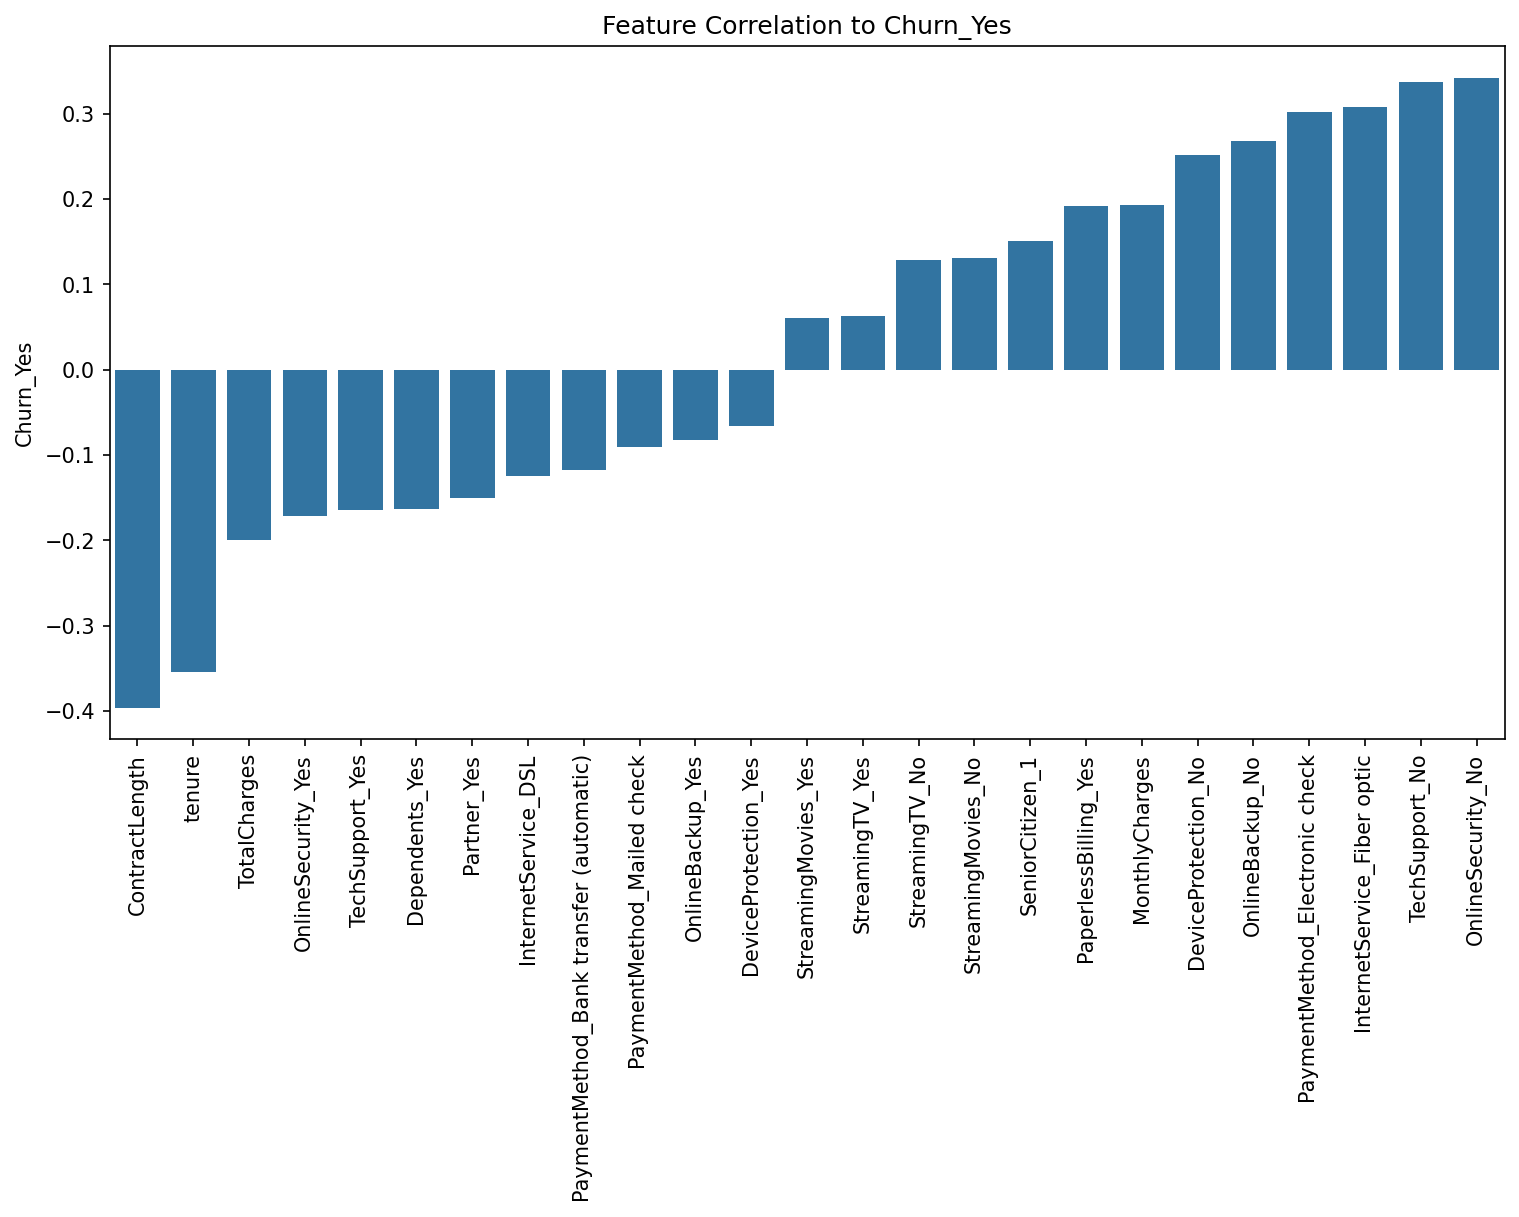

In [167]:
# Set figure parameters
plt.figure(figsize=(12, 6), dpi=150)

# Create bar plot
sns.barplot(corr_to_churn)

# Set title and xticks
plt.title("Feature Correlation to Churn_Yes")
plt.xticks(rotation=90);

Paying specific attention to the **StreamingMovies** and **StreamingTV** features, the correlation coefficients indicated *weak relationships* with **Churn**. The correlation for **StreamingMovies** is approximately *0.06* for *Yes* and around *0.13* for *no*, while **StreamingTV** shares similar values.

These weak correlations imply that these features do not provide meaningful predictive insights regarding customer churn, which align with the initial visual observations made during the exploratory data analysis, where count plots indicated limited significance of these features. Although the Chi-Squared test suggested a statistical association with churn, the results here reinforce doubts regarding the importance of these features. As a result, these features were dropped from subsequent model training to further reduce the dimensionality of the dataset and improve model performance.

Additionally, during the model training phase, the *Random Forest* algorithm also ranked these features low in feature importance. This further supported my decision to exclude them, as their minimal contribution to the prediction of churn was evident.

In [169]:
# Define streaming columns
drop_streaming = df_encoded.columns[
    df_encoded.columns.str.contains("Streaming")
]
# Drop columns
df_encoded = df_encoded.drop(drop_streaming, axis=1)
df_encoded.head()

tenure  ContractLength  MonthlyCharges  TotalCharges  SeniorCitizen_1  \
0       1               0           29.85         29.85                0   
1      34               1           56.95       1889.50                0   
2       2               0           53.85        108.15                0   
3      45               1           42.30       1840.75                0   
4       2               0           70.70        151.65                0   

   Partner_Yes  Dependents_Yes  PaperlessBilling_Yes  Churn_Yes  \
0            1               0                     1          0   
1            0               0                     0          0   
2            0               0                     1          1   
3            0               0                     0          0   
4            0               0                     1          1   

   InternetService_DSL  ...  OnlineSecurity_Yes  OnlineBackup_No  \
0                    1  ...                   0                0   
1                    1  ...                   1                1   
2                    1  ...                   1                0   
3                    1  ...                   1                1   
4                    0  ...                   0                1   

   OnlineBackup_Yes  DeviceProtection_No  DeviceProtection_Yes  \
0                 1                    1                     0   
1                 0                    0                     1   
2                 1                    1                     0   
3                 0                    0                     1   
4                 0                    1                     0   

   TechSupport_No  TechSupport_Yes  PaymentMethod_Bank transfer (automatic)  \
0               1                0                                        0   
1               1                0                                        0   
2               1                0                                        0   
3               0                1                                        1   
4               1                0                                        0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0                           1  
3                               0                           0  
4                               1                           0  

[5 rows x 22 columns]

## Machine Learning Overview

In this part of the report, the context of the machine learning task is outlined. The project looks at a **classification problem** aimed at predicting **predicting customer churn**. The target variable, **Churn**, indicates whether a customer has churned (1) or not (0).

### Addressing Class Imbalance 

The dataset was found to exhibit a significant *class imbalance*. With an overall *churn rate* close to **27 percent**, a notably higher number of customers in the dataset were non-churners as opposed to churners. This imbalance posed challenges to model training, tuning, and evaluation, as models in general tend to favour the majority class. 

To address the issue, ***class weighting*** was employed for models that supported this feature. For models lacking class weighting options, ***resampling techniques*** were employed. Specifically, the **Synthetic Minority Over-sampling Technique (SMOTE)** was utilised to create synthetic samples of the minority class, enhancing the model's ability to learn from the underrepresented **Churn** class.

### Evaluation Metrics

Since the dataset was imbalanced, *accuracy* can be a less reliable and potentially misleading measure of performance. Hence to ensure a more reliable assessment of model performance, particularly for the minority class, key metrics such as ***precision***, ***recall*** and ***F1-score*** were emphasised, as well as the ***Receiver Operating Characteristic Area Under the Curve (ROC-AUC)*** and ***Average Precision (AP)*** scores. 

These metrics provided a more nuanced understanding of model performance beyond just accuracy, allowing for a comprehensive evaluation of model effectiveness in predicting customer churn.

## Model Training

In this section of the report, performance benchmarks for a range of machine learning models were established by first training untuned *baseline* versions. These base models served as a reference point for later optimisation and comparison, to help understand their performance on the dataset before any class balancing or hyperparameter tuning was introduced.

The primary objective at this stage was to assess how well each machine learning algorithm performed 'out of the box' on predicting customer churn, using only *default settings*. To explore a diverse range of options, a combination of *linear*, *non-linear*, and *ensemble* models were chosen. The dataset was split into *training*, *validation*, and *holdout* sets to ensure robust performance evaluation, with standard *scaling* applied where necessary to ensure comparability between features.

By exploring these base models prior to optimisation and tuning, key insights into their performance characteristics, strengths and weaknesses were gained, helping to inform the subsequent modelling process.

### Preprocessing Steps

Before training the baseline models, exploratory steps were undertaken to assess the impact of the **TotalCharges** feature on model performance. It was previously observed that this feature approximately equals the product of **tenure** and **MonthlyCharges**, and it also strongly correlated with both features. To address potential collinearity issues, an initial *Logistic Regression* model was trained *excluding* the **TotalCharges** column.

Additionally, polynomial features were generated to explore whether non-linear, $n$-order transformations would improve model performance.

Ultimately, these changes did not result in significant performance improvements. Removing the **TotalCharges** column led to similar, if not slightly worse model performance compared to a model trained *including* the column. Furthermore, adding polynomial features not only proved computationally expensive for each $n$ degree, but performance actually deteriorated sharply with each $n+1$ degree tested (up to 4 degrees). As a result, it was decided to proceed without these alterations in the final base models.

### Helper Functions

The following helper functions are defined below, to streamline model training and evaluation throughout the *Model Training* section, as well as later during *optimisation*, *tuning*, and *evaluation* of the models. 

These include a function for collecting performance metrics, as well as a function for generating confusion matrices and classification reports. The `get_name` function extracts the model name from the model instance, while the `unfit_model` function returns an unfitted estimator with identical parameters, and the `learning_curve_from_fitted` function calculates a learning curve using a fitted model instance. These three functions are used as nested functions to ensure the primary helper functions are able to work correctly, and compatibility with pipeline models in subsequent stages of the project.

In [182]:
def get_name(model):
    """
    Takes model instance as input and 
    returns model name as string.
    If Pipeline instance is given as input, 
    then the function will also extract
    the model name.

    Note: This function is used primarily
    to facilitate name extraction within
    the other helper functions.
    """

    # Extract name
    if isinstance(model, Pipeline):
        model_name = type(model[-1]).__name__
    else:
        model_name = type(model).__name__

    # Return name
    return model_name

In [183]:
def get_metrics(model, config, 
                X_test, y_test, proba=True):
    """
    Collect individual performance metrics 
    for a given model and return them in a 
    dictionary. 
    
    Takes model instance, model 
    configuration 'config' (string; e.g.
    'Base', 'Balanced', or 'Optimised'), 
    test set 'X_test' and 'y_test', and 
    (optionally) whether to collect
    probability estimates 'proba' 
    (Boolean: True/False; set to 
    true by default).
    """

    # Define model predictions and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate individual metrics for 'Churn Yes' class
    precision_yes = precision_score(y_test, y_pred)
    recall_yes = recall_score(y_test, y_pred)
    f1_yes = f1_score(y_test, y_pred)
    
    # Calculate individual metrics for 'Churn No' class
    precision_no = precision_score(y_test, y_pred, pos_label=0)
    recall_no = recall_score(y_test, y_pred, pos_label=0)
    f1_no = f1_score(y_test, y_pred, pos_label=0)

    # Create metrics dictionary
    metrics = {
        "Model": get_name(model),
        "Model Configuration": config,
        "Accuracy Score": accuracy,
        "Precision (Churn)": precision_yes,
        "Recall (Churn)": recall_yes,
        "F1 Score (Churn)": f1_yes,
        "Precision (No Churn)": precision_no,
        "Recall (No Churn)": recall_no,
        "F1 Score (No Churn)": f1_no,
    }

    # Calculate ROC-AUC and PR-AUC for the positive class
    if proba == True:
        metrics["Churn ROC-AUC Score"] = roc_auc_score(
            y_test, y_proba
        )
        metrics["Churn PR-AUC (AP) Score"] = average_precision_score(
            y_test, y_proba
        )
    else:
        None

    # Return metrics dictionary
    return metrics

In [184]:
# To format and display classification report
import io

In [185]:
def show_matrix_and_report(model, config, X_test, y_test,
                          labels=["No Churn", "Churn"],
                          figsize=(9, 3.5)):
    """
    Displays a confusion matrix and 
    classification report for a given model,
    displayed side-by-side. 
    
    Takes model instance, model 
    configuration 'config' (string; e.g.
    'Base', 'Balanced', or 'Optimised'), 
    test set 'X_test' and 'y_test',
    target class labels for matrix and 
    report 'labels' (list; set to 
    ["No Churn", "Churn"] by default),
    and figure size for subplots grid
    'figsize' (tuple, set to (9, 3.5) 
    by default.

    Note: pyplot.show() is not called
    within function.
    """

    # Define model predictions
    y_pred = model.predict(X_test)

    # Define subplots grid
    fig, ax = plt.subplots(1, 2, figsize=figsize)
    
    # Plot confusion matrix display
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, ax=ax[0], display_labels=labels, colorbar=False
    )
    # Set title
    ax[0].set_title(
        f"{get_name(model)} ({config})\nConfusion Matrix Display", 
        y=1.03, fontsize=12
    )
    # Hide grid
    ax[0].grid(False)
    
    # Define classification report
    title = f"\n{get_name(model)} ({config}) Classification Report:\n"
    report = classification_report(
        y_test, y_pred, target_names=labels
         )
    # Create in-memory string buffer
    report_output = io.StringIO()
    # Print report to StringIO object
    print(title, report, file=report_output)
    report_text = report_output.getvalue()
    # close StringIO object
    report_output.close()
    
    # "Plot" classification report
    ax[1].text(
        0.01, 0.5, report_text, fontsize=10, 
        va="center", ha="left", family="monospace"
    )
    # Hide axis
    ax[1].axis("off")

    # Adjust padding
    plt.tight_layout()

### Train/Test Split

To effectively evaluate the performance of machine learning models, it's crucial to divide the dataset into separate *training* and *testing* subsets. This separation of the data allows for an *unbiased* assessment of the model's ability to generalise to unseen data.

The dataset was partitioned using a ***70/20/10 split***, of which *70 percent* of the data was allocated for *training* the models, *20 percent* for *validating* the models during the training process, and the remaining *10 percent* reserved as a final *holdout* set for testing the final chosen model. This approach ensured that sufficient data was available for both training the models and evaluating their performance un unseen data, while also allowing for a final evaluation of the best performing model.

In [188]:
# Separate features and target variable
X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1066
)

# Split intermediary test set into validation and hold-out
X_val, X_hold, y_val, y_hold = train_test_split(
    X_test, y_test, test_size=0.333, stratify=y_test, random_state=1066
)

# Delete intermediary test set to prevent accidental usage
del X_test, y_test

The `random_state` parameter is also key, as it ensures that the results are reproducible. By setting the seed to *1066*, the same split can be achieved each time the code is executed, which is important for *validation* purposes as well as debugging. Additionally, statified sampling was employed on the target column **Churn_Yes** with `stratify` in order to maintain class distribution, which further enhanced the representativeness of both the training and test sets, and ensuring that the model is trained and tested on data that accurately reflects the underlying class distributions.

### Feature Scaling

Feature scaling is particularly important for machine learning algorithms that rely on distance measures, such as K-Nearest Neighbours and Support Vector Machines, hence feature scaling was performed to standardise the range of the features, reducing the impact of bias towards features with very large values and ensuring that each feature contributes equally to model performance.

The `StandardScaler` transformation from `sklearn.preprocessing` was employed to *standardise* (or *normalise*) the features, by giving all the features a *mean* of *zero* and *standard deviation* of *one*. This ensured that all features were on a comparable scale.

In [192]:
# Initialise scaler
scaler = StandardScaler()

# Fit and transform scaler with training data 
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation data
X_val_scaled = scaler.transform(X_val)
# Transform hold-out data
X_hold_scaled = scaler.transform(X_hold)

Scaling was fitted *only* to the *training* data and ***not*** to the *validation* and *hold-out* data. After fitting the scaler on the training data, the same scaler was used to *transform* *all three* sets. This approach ensures that the validation and test data are scaled based on the parameters derived from the training data and prevents *data leakage*, which occurs when information from the *test* set 'leaks' into the model and influences its training.

### Introduction to Models

Various machine learning models are introduced here for the *classification* task of predicting customer churn. The following models were chosen based on their effectiveness in classification tasks:

#### Logistic Regression

**Logistic Regression** is a *statistical model* based on the *logistic function*, characterised an S-shaped curve which itself is based on a modified form of the exponential function. 

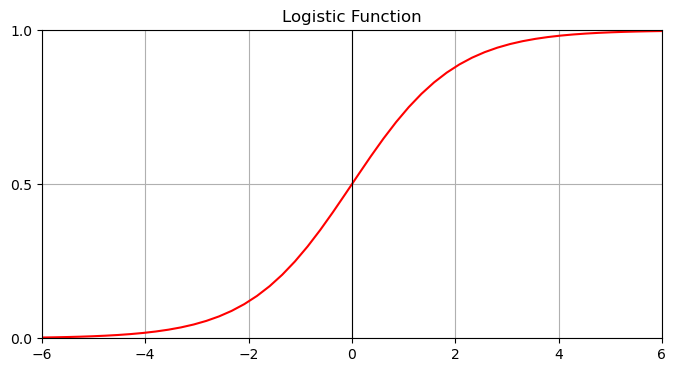

In [197]:
# Define standard logistic function
def standard_logistic_function(x_value):
    return (1 / (1 + np.exp(-x_value)))

# Set range of x
x_value = np.linspace(-6, 6, 50)

# Set figure parameters
plt.figure(figsize=(8, 4))

# Plot function
plt.plot(
    x_value, 
    standard_logistic_function(x_value), 
    color="red"
)

# Adjust title, limits and ticks
plt.title("Logistic Function")
plt.xlim(-6, 6)
plt.ylim(0, 1)
plt.yticks([0, 0.5, 1])
# Add vertical line across axes and set grid
plt.axvline(color="black", lw=0.8)
plt.grid(visible=True);

Originally created to model population growth, this function is effective at handling binary outcomes by predicting the probability of a customer churning based on various features.

It's highly interpretable, and provides coefficients that show the influence of each feature on the likelihood of churn. However, it assumes a linear relationship between the features and the log-odds of the outcome, which can limit its performance on datasets with non-linear relationships. Although not *strictly* required, feature *scaling* can be *beneficial* for logistic regression as it improves convergence and ensures uniform application of regularisation techniques across features.

#### K-Nearest Neighbours (KNN)

**K-Nearest Neighbours (KNN)** is a non-parametric, instance-based learning algorithm that classifies a point based on the classes of other nearby data points. The class of a given instance is determined by a majority vote among its $k$ nearest neighbours, where $k$ is an arbitrary number.

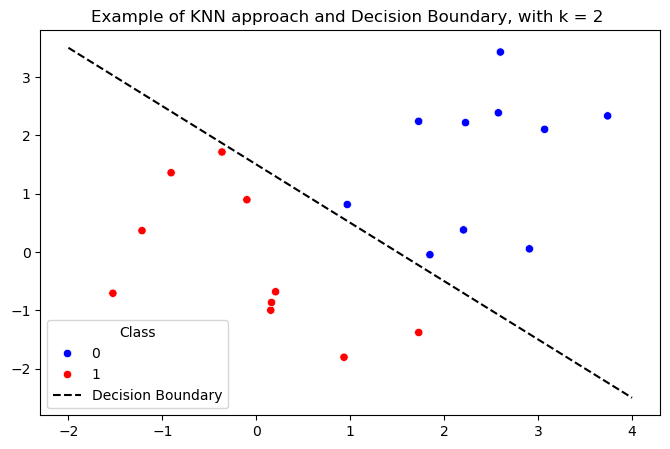

In [200]:
# Generate random data for two classes
np.random.seed(1066)
x_values = np.random.randn(20, 2)
y_values = np.array(([0] * 10) + ([1] * 10))
x_values[:10] += 2

# Plot data points
plt.figure(figsize=(8,5))
sns.scatterplot(x=x_values[:,0], y=x_values[:,1], 
                hue=y_values, palette=["blue", "red"])

# Plot decision boundary
x_values = np.linspace(-2, 4, 100)
decision_boundary = -1 * x_values + 1.5
plt.plot(x_values, decision_boundary, "--", color="black", label="Decision Boundary")


# Set title and legend
plt.title("Example of KNN approach and Decision Boundary, with k = 2 ")
plt.legend(title="Class");

The *decision boundary* is a boundary that defines the points at which the classification label changes. Note that the above plot is *only a rough example*, and in reality the decision boundary is not a simple straight line, but is shaped by the distribution of the data points and their distances to one another. 

KNN is simple and intuitive, and very useful for non-linear data since the algorithm does not make any assumptions about the underlying data distribution. However, KNN can be computationally expensive for larger datasets, since it requires the model to compute the distance from one point to every other point in the dataset. Scaling is also crucial for KNN, as its distance-based calculations are highly sensitive to feature scales with vastly different ranges.

#### Support Vector Machines (SVM)

**Support Vector Machines (SVM)** are a powerful classification approach that performs well in a variety of settings. They classify data points by finding an optimal line or *hyperplane* that best separates the classes in an $n$-dimensional space, where $n$ represets the number of dimensions. 

SVM can use different transformation functions, known as *kernels*, to manage non-linear boundaries, mapping the input data into higher-dimensional space. This allows SVM to find linear decision boundaries in this transformed space, even if the data is not linearly separable in its original form.

Though the concept of *decision boundaries* exists in both *KNN* and *SVM*, the methods used by these algorithms differ significantly. Unlike KNN, which classifies points *locally* based on the proximity of nearby points, SVM classifies points *globally* by constructing a multi-dimensional boundary *(hyperplane)*, influenced by the data points closest to this boundary, referred to as *support vectors*.

SVMs are robust and less prone to overfitting than other models, especially when using the right kernel. However, they can be quite resource-intensive and computationally expensive, especially with larger datasets and non-linear kernels. Similarly to KNN, SVM is a distance-based algorithm, hence it is recommended to scale the features to ensure optimal performance.

#### Ensemble Methods

Ensemble methods are powerful techniques that combine multiple models to enhance predictive performance. Ensemble methods also do not require feature scaling, as the algorithms are not sensitive to the scales of the features. In this project, *three* different ensemble methods are used: **Random Forests**, **Gradient Boosting** and **Adaptive Boosting (AdaBoost)**.

##### **Random Forests**:

**Random Forests** is an *ensemble* learning method that constructs a large number of **decision trees** during training time and outputs the mode of their classes (for classification tasks). Each tree is trained on a random subset of the data, and randomness is also introduced in feature selection at each split, performing diversity within the forest.

Random Forests are less prone to overfitting compared to individual decision trees, and can also provides insights into feature importance by measuring how much each feature contributes to the predictive accuracy of the model. Random forests can also capture complex interactions between features naturally through the structure of the trees, meaning they do not require the explicit inclusion of interaction terms. However, training multiple trees can be computationally expensive and require more memory for larger datasets. Additionally, hyperparameter tuning, such as grid searches, can be time consuming, often taking hours or even longer compared to other models due to extensive parameter space.

##### **Boosting Overview**:

**Boosting** is a family of *ensemble* techniques that combines multiple weak learners, typically *decision trees*, into a single strong learner. The key idea is to build these weak learners sequentially, where each new weak learner is trained to correct the errors made by previous weak learners. The two types of boosting methods used here are:

1.  **Gradient Boosting**:

A specific boosting method that employs *decision trees* as weak learners. Each subsequent tree is trained to predict the errors of the previous trees, refining the model's accuracy through targeted adjustments. The training process makes use of a gradient descent approach to minimise a specified loss function, allowing for effective updates with each new model attempting to correct the errors of its predecessor. It optimises a loss function by fitting new models to the residuals (errors) of the existing models, thereby making the overall model more accurate.

*Gradient Boosting* can be highly accurate and is good for complex tasks, but can be slower to train and prone to overfitting if not tuned properly. 

2. **Adaptive Boosting (AdaBoost)**:

Another type of boosting method that also uses weak learners, typically *decision stumps* (very simple decision trees with a single *node*). The main idea of AdaBoost is to give more importance to data points that were misclassified by previous learners. The final prediction is made by combining the predictions of all the models, where more accurate models have a greater influence on the final outcomes.

*AdaBoost* is simple and effective for boosting weak learners, and is generally much faster to train compared to *Gradient Boosting* and *Random Forests*. However, it's less effective than *Gradient Boosting* in handling complex data, and is more sensitive to noise in data as well as outliers.

### Training Process

The training and initial performance of base models is discussed in this section. Each model was trained on the same train/validation split without any balancing or hyperparameter tuning applied at this stage. 

The primary purpose of this section is to *establish* **base performance benchmarks** for each model, providing a foundation for comparison with the later refined models. These benchmarks will highlight how each model performs '*out-of-the-box*' and help identify potential areas for improvement when later techniques, including balancing and tuning, are introduced later.

All models with a `random_state` parameter were set with the random state *1066*, as used in the train/test split, to ensure consistency and reproducability of the results. For *AdaBoost*, `algorithm` was set to `SAMME`, since the default `SAMME.R` resulted in a deprecation warning.

**An important caveat to note for the Support Vector Machines model:** The `predict_proba` method was used to obtain probability estimates for the ROC-AUC and PR-AUC scores by setting `probability=True`. Since SVMs are not inherently probabilistic, the reliability of these estimates may be limited, and this should be considered when interpreting the results .

#### Logistic Regression

The *Logistic Regression* model was fitted to the training data, and then evaluated on the validation set.

In [208]:
# Initialise and fit logistic regression
lr_base = LogisticRegression(random_state=1066)
lr_base.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1066)

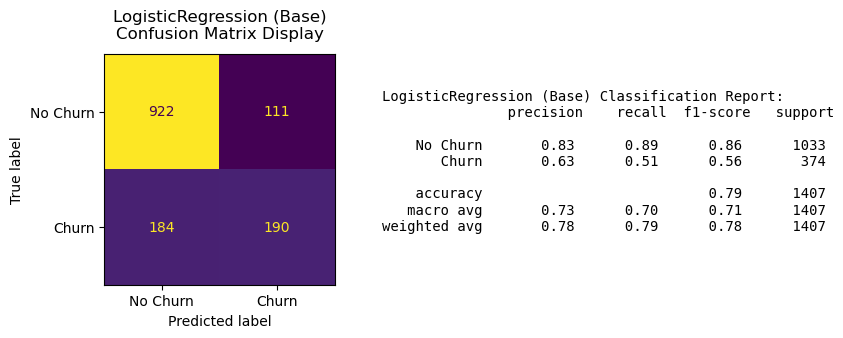

In [209]:
# Collect metrics
lr_base_metrics = get_metrics(lr_base, "Base", 
                              X_val_scaled, y_val)
# Show confusion matrix and classification report
show_matrix_and_report(lr_base, "Base",
                       X_val_scaled, y_val)

From the above metrics, *precision* and *recall* for the **No Churn** class were high, with an *F1 score* of *0.86*, but considerably lower for the **Churn** class with an *F1 score* of only *0.56*.

Notably, the recall for *Churn* was only 0.51, meaning the model failed to identify nearly half of the customers who churned. This is reflected by the confusion matrix which shows 190 correctly identified instances of *Churn*, whilst 184 customers were incorrectly predicted as *No Churn*. Additionally, the model also flagged 111 customers as churners when they were in fact non-churners.

While the model performed well in identifying instances of *No Churn*, it struggled to detect churners, resulting in a high number of false negatives. This highlights the model's tendency to favour the majority *No Churn* class, which is likely exacerbated by the class imbalance present in the dataset.

#### K-Nearest Neighbours

The *K-Nearest Neighbours (KNN)* model was fit to the training data and evaluated on the validation set.

In [213]:
# Initialise and fit KNN
knn_base = KNeighborsClassifier()
knn_base.fit(X_train_scaled, y_train)

KNeighborsClassifier()

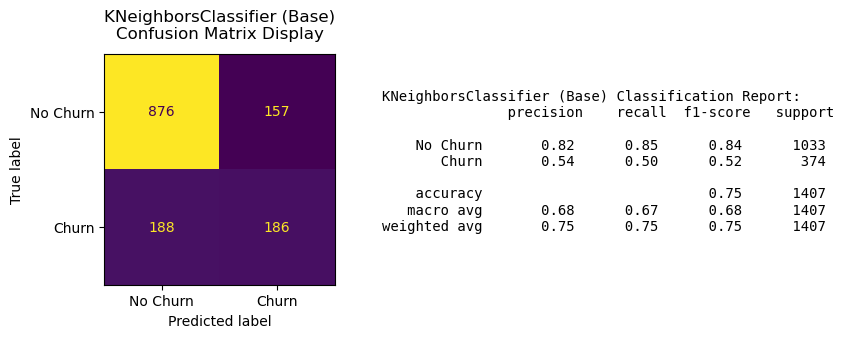

In [214]:
# Collect metrics
knn_base_metrics = get_metrics(knn_base, "Base",
                              X_val_scaled, y_val)
# Show confusion matrix and classification report
show_matrix_and_report(knn_base, "Base",
                       X_val_scaled, y_val)

Upon evaluating the metrics, KNN's performance was found to be similar to logistic regression, but with slightly worse performance overall. 

Precision for **Churn** was lower at *0.54*, while recall was *0.50*, indicating that the model detected only half of the customers who churned and also flagged more false positives than logistic regression. The *F1 score* for *churn* was also lower, at *0.52* compared to *0.56* for logistic regression. This suggests that KNN struggled more with balancing precision and recall.

The confusion matrix further highlights these issues, with *186 positively identified* instances of churn, but *188 false negatives*, meaning the model missed almost as many churners as it correctly identified. Additionally, *157 false positives* were recorded, which is more than the 111 false positives seen in logistic regression.

While KNN's *recall* was similar to logistic regression, it suffered from a greater number of false positives as well as lower *precision*, likely exacerbated by the class imbalance in the dataset.

#### Support Vector Machines

The *Support Vector Machine (SVM)* model was trained on the training set and subsequently evaluated on the validation data.

In [218]:
# Initialise and fit SVM
svm_base = SVC(probability=True, random_state=1066)
svm_base.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=1066)

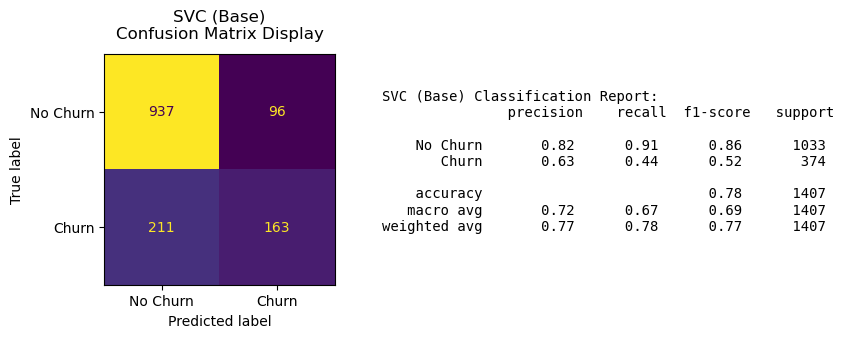

In [219]:
# Collect metrics
svm_base_metrics = get_metrics(svm_base, "Base",
                               X_val_scaled, y_val)
# Show confusion matrix and classification report
show_matrix_and_report(svm_base, "Base",
                       X_val_scaled, y_val)

The model demonstrated strong performance in predicting **No Churn**, but its performance on **Churn** was significantly weaker.

From the above metrics, *recall* for *Churn* was notably low at *0.44*, indicating that less than half of customers who churned were correctly identified, meaning the model is failing to detect a significant number of churners; *Precision* for *churn* was *0.63*, which is equal to that of logistic regression and higher than KNN. The confusion matrix shows *163 true positives (churners)*, but *211 false negatives (missed churners)*. The *96 false positives* are lower than both logistic regression and KNN, corresponding with its higher precision.

For the *No Churn* class, SVM performed very well, with an *F1 score* of 0.86, which further highlights that the model is highly effective at identifying non-churners, but poor at identifying churners. Once again, this highlights the impact of *class imbalance*, as the model favours the *majority class* (no churn) at the expense of correctly predicting the *minority class* (churn). 

#### Random Forests

The *Random Forest* model was trained and evaluated on the validation set.

In [223]:
# Initialise and fit Random Forests
rf_base = RandomForestClassifier(random_state=1066)
rf_base.fit(X_train, y_train)

RandomForestClassifier(random_state=1066)

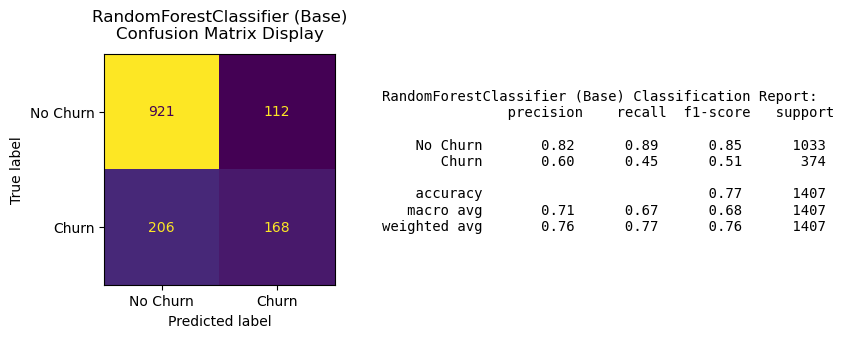

In [224]:
# Collect metrics
rf_base_metrics = get_metrics(rf_base, "Base",
                              X_val, y_val)
# Show confusion matrix and classification report
show_matrix_and_report(rf_base, "Base",
                       X_val, y_val)

Despite high expectations, due to its status as an ensemble method known for capturing complex relationships in data, the model performed dissapointingly, especially on the **Churn** class.

The model's *recall* for *Churn* was *0.45*, meaning it missed more than half of the customers who churned. *Precision* for churn was *0.60*, indicating that it also misclassified a significant number of non-churners as churners. The confusion matrix confirms these observations, with *168 true positives*, *206 false negatives*, and *112 false positives* reflecting its difficulty in effectively detecting churners.

Its performance overall was comparable to SVM, suggesting that *class imbalance* remained a significant challenge for this model.

#### Gradient Boosting

The *Gradient Boosting* model was trained and evaluated on the validation set.

In [228]:
# Initialise and fit Gradient Boosting
gb_base = GradientBoostingClassifier(random_state=1066)
gb_base.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1066)

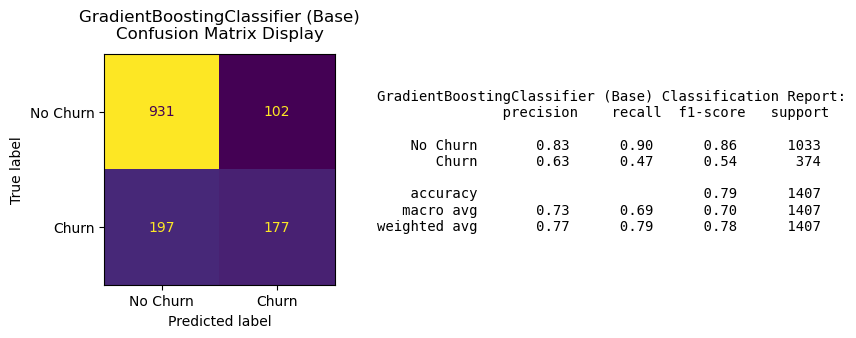

In [229]:
# Collect metrics
gb_base_metrics = get_metrics(gb_base, "Base",
                             X_val, y_val)
# Show confusion matrix and classification report
show_matrix_and_report(gb_base, "Base",
                       X_val, y_val)

The model showed comparable performance to SVM and Random Forests. For the **Churn** class, it's *precision* and recall were *0.63* and *0.47*, respectively, meaning more than half of churners were not detected. On the other hand, the model performed well on the **No Churn** class, achieving a *precision* of *0.83* and a recall of *0.90*. The confusion matrix revealed *177 true positives* and *197 false negatives*, reflecting the model's low recall.

While Gradient Boosting performed slightly better than Random Forests in terms of *precision* and *recall* for *Churn*, the *class imbalance* continued to affect the model's ability to detect churners effectively.

#### Adaptive Boosting

The *AdaBoost* model was trained, and then evaluated on the validation set.

In [233]:
# Initialise and fit AdaBoost
ada_base = AdaBoostClassifier(
    algorithm="SAMME", 
    random_state=1066
) 
ada_base.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', random_state=1066)

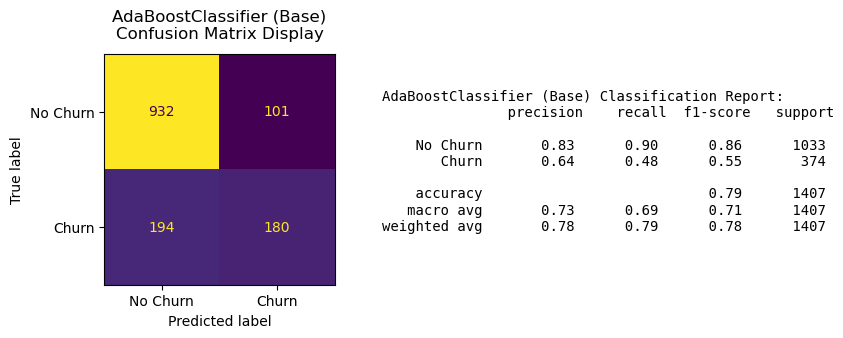

In [234]:
# Collect metrics
ada_base_metrics = get_metrics(ada_base, "Base",
                               X_val, y_val)
# Show confusion matrix and classification report
show_matrix_and_report(ada_base, "Base",
                       X_val, y_val)

AdaBoost reported the best performance among the ensemble models (including Random Forests and Gradient Boosting). However, its overall performance was still only average. 

For the **Churn** class, the model achieved a *precision* of *0.64* and a recall of *0.48*, with an overall *F1 score* of *0.55* for *Churn*; for the **No Churn** class, the model performed very well with a *precision* and *recall* of *0.83* and *0.90*, respectively, and a corresponding *F1 score* of *0.86*. The confusion matrix reported *180 true positives*, *194 false negatives*, and *101 false positives*.

Despite being the best performer among the ensemble models, AdaBoost still struggled with *class imbalance* along with all the other base models, and failed to consistently detect churners effectively.

### Results

The table below provides a summary of key performance metrics, including *accuracy*, *precision*, *recall*, and *f1-score* for both the **Churn** and **No Churn** classes across all the base models. A bar chart was also visualised to compare the models based on precision, recall and f1-score for the *churn* class.

In [238]:
# Define list of base model metrics
base_metrics = [
    lr_base_metrics,
    knn_base_metrics,
    svm_base_metrics,
    rf_base_metrics,
    gb_base_metrics,
    ada_base_metrics
]

# Create DataFrame
df_base_metrics = pd.DataFrame(base_metrics)
df_base_metrics

Model Model Configuration  Accuracy Score  \
0          LogisticRegression                Base        0.790334   
1        KNeighborsClassifier                Base        0.754797   
2                         SVC                Base        0.781805   
3      RandomForestClassifier                Base        0.773987   
4  GradientBoostingClassifier                Base        0.787491   
5          AdaBoostClassifier                Base        0.790334   

   Precision (Churn)  Recall (Churn)  F1 Score (Churn)  Precision (No Churn)  \
0           0.631229        0.508021          0.562963              0.833635   
1           0.542274        0.497326          0.518828              0.823308   
2           0.629344        0.435829          0.515008              0.816202   
3           0.600000        0.449198          0.513761              0.817214   
4           0.634409        0.473262          0.542113              0.825355   
5           0.640569        0.481283          0.549618              0.827709   

   Recall (No Churn)  F1 Score (No Churn)  Churn ROC-AUC Score  \
0           0.892546             0.862085             0.836056   
1           0.848015             0.835479             0.753753   
2           0.907067             0.859239             0.793361   
3           0.891578             0.852778             0.806908   
4           0.901258             0.861638             0.841398   
5           0.902227             0.863363             0.835805   

   Churn PR-AUC (AP) Score  
0                 0.608203  
1                 0.484844  
2                 0.589318  
3                 0.584659  
4                 0.642663  
5                 0.618258

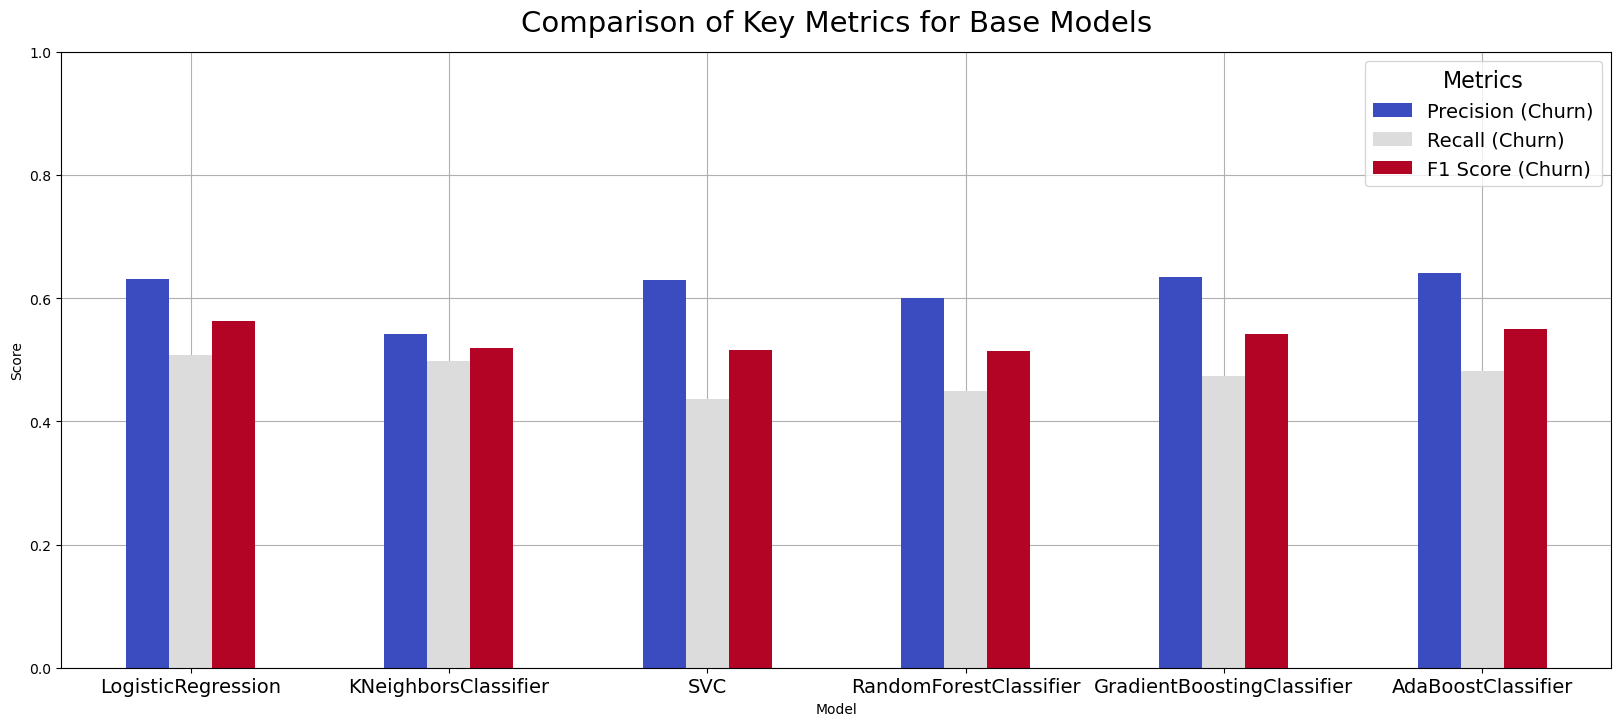

In [239]:
# Define metrics to visualise
metrics = df_base_metrics.columns[3:6]

# Plot metrics
df_base_metrics.plot(
    x="Model", 
    y=metrics, 
    kind="bar", 
    grid=True, 
    zorder=2, 
    figsize=(20, 8), 
    cmap="coolwarm"
)

# Set title and labels
plt.title(
    "Comparison of Key Metrics for Base Models",
    y=1.02, fontsize=21
)
plt.ylabel("Score")
plt.xlabel("Model")
# Set xticks
plt.xticks(fontsize=14, rotation=0)
# Set ylim
plt.ylim(0, 1)

# Set legend and layout
plt.legend(
    title="Metrics", 
    bbox_to_anchor=(1,1), 
    fontsize=14, 
    title_fontsize=16
)
plt.tight_layout;

### Observations

Upon reviewing the results of all the base models, several noticeable patterns emerged. Regarding **accuracy**, all models showed comparable scores ranging from approximately *0.75* to *0.79*; *Logistic Regression* and *AdaBoost* scored highest at around *0.79* (both scores are in fact identical to 6 decimal places). However, since accuracy is a less reliable metric in this case due to the class imbalance in the dataset, it follows that *precision* (rate of correct positive predictions) and *recall* (rate of correctly identified positives) are more important metrics to consider in this context. Unless otherwise specified, *precision*, *recall* and *F1 scores* discussed here will refer specifically to the *churn* class.

Looking at **recall**, *Logistic Regression* stands out again with the highest score at *0.51*, followed by *KNN* at *0.497*, and *AdaBoost* at *0.48*. This suggests that these models are relatively more effective in capturing churners compared to the other three models, though *Logistic Regression* takes the lead slightly. *SVM* scored the lowest for recall at *0.44*, meaning its performance was poorest in identifying churners.

For **precision**, *AdaBoost* takes the lead with a score of *0.64*, followed closely by *Gradient Boosting* and *Logistic Regression* both at approximately *0.63*. These models proved to be more reliable in making accurate positive (churn) predictions. The worst performer for *precision* was *KNN*, lagging behind at *0.54*, and lower than the model with the second lowest score for precision, which was *Random Forests* at *0.60*.

In terms of **F1 score**, which is the *harmonic mean* of *precision* and *recall*, scores ranged from *0.51* to *0.56*. *Logistic Regression* scored the highest at *0.56*, closely followed by *AdaBoost* at *0.55*; *Random Forest* scored the lowest with *0.51*.

The **ROC-AUC** (Receiver Operating Characteristic - Area Under the Curve) scores and **PR-AUC** (Precision Recall - Area Under the Curve) scores were not the primary focus for the base model evaluations, and these will mainly be considered when analysing the optimised models. However, the base model scores for *ROC-AUC* ranged from *0.75* (KNN) to *0.84* (Logistic Regression), while PR-AUC scores ranged from *0.48* (KNN) to *0.64* (Gradient Boosting). These metrics briefly highlight how well the models discriminate between classes and manage the balance between *precision* and *recall*, which is particularly important in imabalanced datasets like this one. *PR-AUC*, in particular, helps gauge the models' effectiveness in predicting churners, and is the more informative metric of the two for this particular dataset.

Overall, *Logistic Regression* and *AdaBoost* so far have showed the strongest performance across most metrics, particularly in *recall* and *F1 score*, suggesting they may be more suited for identifying churners compared to other models. While *Gradient Boosting* exceeded the former mentioned models in precision* and *PR-AUC*, it slightly lagged in *recall*, indicating it is better at making accurate predictions but at the cost of missing churners. *KNN*, despite having the second highest *recall*, struggled with *PR-AUC* and had the lowest *PR-AUC*, meaning it doesn't balance precision and recall well. *SVM* on the other hand, had the lowest *recall* of all models, but had relatively good *precision* compared to others. These results provide a useful baseline for further optimisation and model refinement, where class balancing and hyperparameter tuning is applied to improve model performance, particularly in better handling the class imbalance.

## Model Optimisation and Hyperparameter Tuning

In this section of the report, the focus now shifts towards optimising the models. The primary goal was to enhance the models' prediction abilities, particularly for the minority class *churn*, where *recall* was prioritised. Given the imbalanced nature of the dataset, optimising for *recall* was a strategic choice aimed at identifying as many at-risk customers as possible.

Throughout the tuning process, emphasis was placed on maintaining a **recall-focused approach**, while ensuring that the *precision* did not fall below 50 percent. The threshold for precision was selected to reflect a balance between catching churners and avoiding an excessive number of false positives, though it's important to note that this threshold is a simplified assumption for the purposes of this project. In a real-world setting, depending on the needs of a business, one may choose to a lower or higher threshold for precision based on their unique goals and available resources. For example, a company with a smaller budget may aim for a higher precision to avoid unnecessary expenditures on customer retention strategies, whereas a business facing a high churn rate may compromise on having more false positives in order to maximise recall and pre-emptively address potential churners.

The optimisation process began with first employing class balancing techniques to mitigate the majority class bias, that is, towards non-churners. For models with built-in class weight parameters, such as *Logistic Regression*, *SVM*, and *Random Forests*, class weights were adjusted to counter the imbalance between churners and non-churners. For models without built-in class weight options, including *KNN*, *Gradient Boosting* and *AdaBoost*, resampling techniques were employed using *SMOTE* instead. This approach allowed for targeted optimisation, ensuring that each model was tuned in a way that was appropriate for its specific capabilities.

In this report, the precision-recall performance is summarised using the *Average Precision (AP) score*, which provides a single number representing the area under the *Precision-Recall (PR-AUC)*. Although *AP* and *PR-AUC* are sometimes distinguished, in this context, they represent the same value. **Hence, within this report, *PR-AUC* and *AP* will be used interchangeably.**

### Helper Functions

In addition to the previously developed helper functions, a few new ones were created to further streamline the model evaluation process.

The `plot_learning_curve`, `plot_roc_pr_curves`, and `display_evaluation` functions were implemented. The first two functions plot the *learning curve* for a model to ensure the model is not over- or under-fitting the data, as well as plot the *ROC-AUC* and *PR-AUC* curves side by side to visualise the *precision-recall trade-off*; the `display_evaluation` function serves as a comprehensive tool that combines all evaluations by plotting the learning curve, ROC-PR curves, and displaying the confusion matrix alongside the classification report in one go (or selectively), making the evaluation process more efficient.

The `unfit_model` function was also added specifically for use within the `plot_learning_curve` function. This function takes a fitted model or pipeline and returns an unfitted estimator, enabling pipelines to be passed into the learning curve function without issue.

In addition, the `custom_score` function was implemented to guide model selection, during grid search optimisation, towards higher recall while maintaining a minimum precision threshold. The function calculates *recall* and *precision* for the *churn* class and only returns the *recall* value if *precision* meets or exceeds *0.5*. Otherwise, it returns 0, ensuring that low-precision models are not favoured, even if they achieve high recall.

In [246]:
# Used within learning_curve_from_fitted function
def unfit_model(fitted_model):
    """
    Takes fitted model or Pipeline
    instance as input, and returns an
    unfitted estimator with identical
    model parameters or Pipeline 
    steps.
    """

    # Define model class
    model_class = fitted_model.__class__

    # Unfit model
    if isinstance(fitted_model, Pipeline):
        steps = fitted_model.steps
        unfitted_model = model_class(steps)
    else:
        params = fitted_model.get_params()
        unfitted_model = model_class(**params)

    return unfitted_model

In [247]:
def custom_score(y_true, y_pred):
    """
    A custom scoring function for prioritising 
    recall, conditioned on a precision threshold 
    of 0.5.
    """

    # Define recall of positive class
    recall = recall_score(y_true, y_pred)
    # Define precision of positive class
    precision = precision_score(y_true, y_pred)
    # Return recall if criteria is satisfied
    return recall if precision >= 0.5 else 0

# Define custom scorer for GridSearchCV
scorer = make_scorer(custom_score)

In [248]:
def plot_learning_curve(
    model, config, 
    X_train, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1, 10),
    figsize=(6, 4)
):
    """
    Plots learning curve for model instance; 
    plots the training and cross-validation 
    scores as the training set size increases.
    
    Takes model or Pipeline instance 'model', 
    model configuration 'config' (string, 
    e.g. 'Base', 'Balanced', or 'Optimised'), 
    training data 'X_train' and 'y_train', 
    number of cross-validation folds 'cv'
    (int; default 5), number of training 
    examples used to plot curve 'train_sizes'
    (array; defaults to 10 different sizes
    from 10% to 100%), and figure size 
    'figsize' (tuple; (6, 4) by default).

    Notes: 
        - New model instance is created within
          function using unfit_model(fitted_model)
          to pass through learning_curve().
        - Model name is extracted within function 
          using get_name(model).
        - Default value used for cross-validation 
          folds 'cv' is 5 (int).
        - 'train_sizes' (array) defaults to 10 
          different sizes from 10% to 100%.
        - pyplot.show() is not called within the 
          function.
    """

    # Define estimator
    estimator = unfit_model(model)
    
    # Calculate learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, 
        X_train, 
        y_train, 
        cv=cv, 
        train_sizes=train_sizes,
        n_jobs=-1
    )

    # Calculate mean and std dev of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=figsize)

    # Plot training and test scores
    plt.plot(train_sizes, train_scores_mean, "o-", 
             color="red", 
             label=f"Training Score")
    plt.plot(train_sizes, test_scores_mean, "o-", 
             color="green", 
             label=f"Cross-Validation Score")

    # Plot confidence interval for training and test scores
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color="red")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color="green")

    # Set title and axes labels
    plt.title(
        f"{get_name(model)} ({config}) Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    #plt.yticks(np.linspace(0, 1, 11))

    # Add grid and legend
    plt.grid(visible=True)
    plt.legend(loc="best")

In [249]:
def plot_roc_pr_curves(
    model, config, X_test, 
    y_test, figsize=(10, 4)
):
    """
    Plots the ROC-AUC curve and the PR-AUC 
    curve side by side. 
    
    Takes the model instance, model 
    configuration 'config' (string; e.g.
    'Base', 'Balanced', or 'Optimised'), 
    the test set 'X_test' and 'y_test', 
    and the figure size for the subplots
    'figsize' (tuple containing two int
    or float values (m, n); set to
    (10, 4) by default).

    Note: pyplot.show() is not called within
    the function.
    """

    # Define probabilities for positive class
    y_proba = model.predict_proba(X_test)[:,1]

    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Compute PR curve
    precision, recall, _ = precision_recall_curve(
        y_test, y_proba
    )
    pr_auc = average_precision_score(y_test, y_proba)

    # Configure subplots
    fig, ax = plt.subplots(1, 2, figsize=figsize)

    # Plot ROC-AUC curve
    ax[0].plot(fpr, tpr, color="blue", lw=2,
              label=f"ROC curve (area = {roc_auc:.2f})")
    ax[0].plot([0,1], [0,1], color="gray", linestyle="--")

    # Plot PR-AUC curve
    ax[1].plot(recall, precision, color="red", lw=2,
              label=f"PR curve (AP = {pr_auc:.2f})")

    # Set titles, labels and legend
    ax[0].set_xlabel("False Positive Rate")
    ax[0].set_ylabel("True Positive Rate")
    ax[0].set_title(
        f"{get_name(model)} ({config}) ROC-AUC Curve"
    )
    ax[0].legend(loc="lower right")
    
    ax[1].set_xlabel("Recall")
    ax[1].set_ylabel("Precision")
    ax[1].set_title(
        f"{get_name(model)} ({config}) PR-AUC Curve"
    )
    ax[1].legend(loc="lower left")

    # Adjust padding
    plt.tight_layout()

In [250]:
def display_evaluation(
    model, config,
    X_train, y_train,
    X_test, y_test,
    matrix_and_report=True,
    roc_pr_curves=True,
    learning_curve=True
):

    """
    Display visual evaluations for a
    given model using the training set and 
    test set. 
    Takes the fitted model or pipeline 
    instance, the model configuration 
    'config' (string; e.g. 'Base', 
    'Balanced', or 'Optimised'), the 
    training data 'X_train' and 'y_train', 
    and the test data 'X_test' and 'y_test'.
    
    This function executes the following 
    visualisation functions:
    1. plot_learning_curve
    2. plot_roc_pr_curves
    3. show_matrix_and_report

    Note: Some functions have default 
    parameters set, which are hardcoded
    into this function.
    """
    
    # Execute visualisation functions
    if matrix_and_report:
        show_matrix_and_report(model, config, X_test, y_test);
    
    if roc_pr_curves: 
       plot_roc_pr_curves(model, config, X_test, 
                          y_test);

    if learning_curve:
        plot_learning_curve(model, config, X_train, y_train, cv=5, 
                        train_sizes=np.linspace(0.1, 1, 10));

    if not (matrix_and_report or roc_pr_curves or learning_curve):
        raise ValueError(
            "Error: All display options are set to False. " 
            + "Please enable at least one display option."
        )

### Resampling

To address the skewed distribution between churners and non-churners in the dataset, *Synthetic Minority Over-sampling Technique (SMOTE)* was applied. *SMOTE* generates synthetic samples for the underrepresented class, helping to balance the dataset and enhance model performance when working with imbalanced data.

The following code outputs the shape of the training set before and after resampling, as well as a count of the churn and non-churn labels.

In [253]:
# Print label counts pre-SMOTE
print(f"\nShape of X_train: {X_train.shape}")
print(f"\nShape of y_train: {y_train.shape}")
print(f"\n Counts of '0' (No Churn): {sum(y_train == 0)}") 
print(f"\n Counts of '1' (Churn): {sum(y_train == 1)}") 


Shape of X_train: (4922, 21)

Shape of y_train: (4922,)

 Counts of '0' (No Churn): 3614

 Counts of '1' (Churn): 1308


Initialisation.

In [255]:
# Initialise SMOTE
smote = SMOTE(random_state=1066)
# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [256]:
# Print label counts post-SMOTE
print(f"\nShape of X_resampled: {X_resampled.shape}")
print(f"\nShape of y_resampled: {y_resampled.shape}")
print(f"\nCounts of '0' (No Churn): {sum(y_resampled == 0)}")
print(f"\nCounts of '1' (Churn): {sum(y_resampled == 1)}")


Shape of X_resampled: (7228, 21)

Shape of y_resampled: (7228,)

Counts of '0' (No Churn): 3614

Counts of '1' (Churn): 3614


After applying *SMOTE*, a `StandardScaler` was used to normalise the resampled dataset, ensuring that *KNN* in particular benefits from the standardised values.

In [258]:
# Initialise separate scaler for resampled data
smote_scaler = StandardScaler()

In [259]:
# Fit and transform scaler with resampled data 
X_resampled_scaled = smote_scaler.fit_transform(X_resampled)

# Transform validation data using same scaler
X_val_scaled_SMOTE = smote_scaler.transform(X_val)

Once resampling and scaling were completed, the resampled data were applied to models that did not support built-in class weighting, that is, exclusively for *KNN*, *Gradient Boosting* and *AdaBoost*, while the class weight parameters were leveraged for the remaining models.

### Employing Class Balancing Techniques to Base Models

The training and performance of models fitted with class balancing in mind is discussed within this section. As discussed, models without built-in class weighting options will be fitted with the resampled training data. In addition to confusion matrices and classification reports, corresponding ROC-AUC and Precision-Recall curves were plotted to visualise the models' ability to distinguish between classes, as well as the precision-recall trade-off.

The `random_state` parameter was once again set with the random state *1066* (where applicable), to align with the train/test split and ensure consistency in the results. *AdaBoost's* `algorithm` parameter was once again set to `SAMME` instead of the now deprecated `SAMME.R`.

As noted in the previous section, caution is advised when considering the reliability of the probability-based results (ROC-AUC and PR-AUC) provided by Support Vector Machines, since `predict_proba` method was used to obtain estimates for a model that is not inherently probabilistic.

To ensure clarity, the metrics discussed here will refer specifically to those of the *churn* class unless otherwise specified.

#### Logistic Regression

The Logistic Regression model was re-trained, with the `class_weight` parameter set to *'balanced'*, and evaluated on the validation set.

In [265]:
# Set up balanced logistic regression model
lr_bal = LogisticRegression(
    class_weight="balanced",
    random_state=1066
)
lr_bal.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=1066)

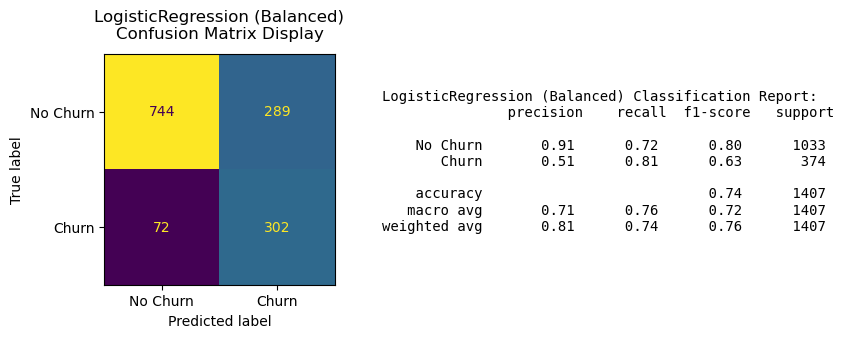

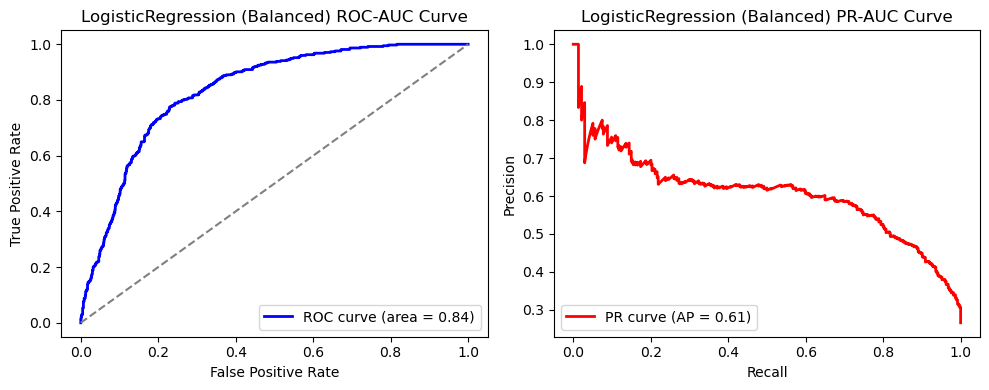

In [266]:
# Collect metrics
lr_bal_metrics = get_metrics(lr_bal, "Balanced", 
                             X_val_scaled, y_val)

# Display ROC PR curves, matrix and report
lr_bal_eval = display_evaluation(
    lr_bal, "Balanced", X_train_scaled, y_train, 
    X_val_scaled, y_val, learning_curve=False
)

Significant improvements were observed in recall, for which the score increased from *0.51* to *0.81*, demonstrating that the model became significantly more effective at capturing at-risk customers. 

However, this came at the cost of a slight reduction in *precision*, which fell from *0.63* to *0.51*. This trade-off suggests that while the model was able to correct more positive instances of churn, it done so with a higher rate of false positives. This is shown in the confusion matrix, which shows more than double the number of false positives, although the number of false negatives has also dropped by more than half thanks to the increase in recall.

The *F1 score* increased from *0.56* to *0.63*, primarily driven as a result of the increase in recall, and the *accuracy* decreased from *0.79* to *0.74*, though this remains a less important metric overall due to the inherent imbalance in the dataset. While an *ROC-AUC* score of *0.84* is good, it's reliability is limited by the imbalance in the dataset. On the other hand, the *PR-AUC* score of *0.61* indicates a moderately good ability to balance precision and recall, though there remains room for improvement.

#### K-Nearest Neighbours

Since K-Nearest Neighbours does not have built-in class-weight parameters, the model was re-fitted using the resampled SMOTE training data, and subsequently evaluated on the validation set.

In [270]:
# Set up balanced KNN model
knn_bal = KNeighborsClassifier()
knn_bal.fit(X_resampled_scaled, y_resampled)

KNeighborsClassifier()

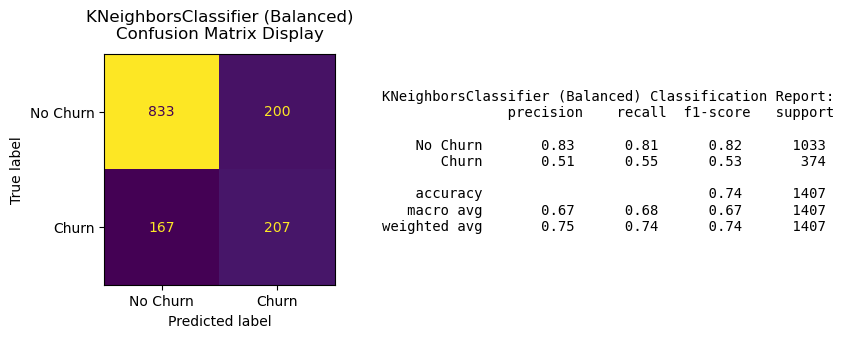

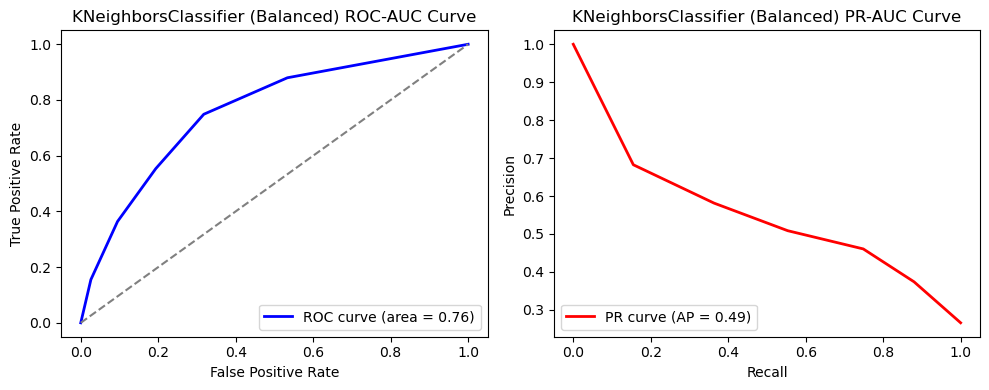

In [271]:
# Collect metrics
knn_bal_metrics = get_metrics(knn_bal, "Balanced",
                              X_val_scaled_SMOTE, y_val)
# Display ROC PR curves, matrix and report
knn_bal_eval = display_evaluation(
    knn_bal, "Balanced", X_resampled_scaled, y_resampled, 
    X_val_scaled_SMOTE, y_val, learning_curve=False
)

Compared to *Logistic Regression*, *KNN* only saw a marginal improvement in performance. *Recall* only increased by around 5 points, from *0.50* to *0.55*, whereas *precision* fell from *0.54* to *0.51*. The *F1 score* improved minimally, increasing by 2 points from *0.53* to *0.55*.

Overall, the performance of *KNN* remains underwhelming, and the improvements are far from significant even after resampling. This suggests that more extensive hyperparameter tuning may be needed to see any significant changes in performance, which is explored later in the model optimisation section. The *PR-AUC score* saw a slight bump from *0.48* to *0.49*, but this still reflects poor performance in balancing precision and recall overall.

As it stands, *KNN* has not shown great results, but further optimisation may still hold some potential for improvement.

#### Support Vector Machines

The *Support Vector Machines* model was re-fitted `class_weights` set to *'balanced'*, and then evaluated on the validation set.

In [275]:
# Set up balanced SVM model (set probability to True)
svm_bal = SVC(probability=True, 
              class_weight="balanced",
              random_state=1066)
svm_bal.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', probability=True, random_state=1066)

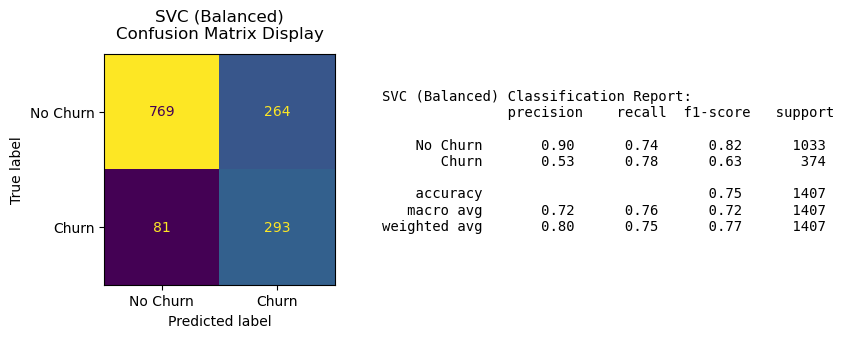

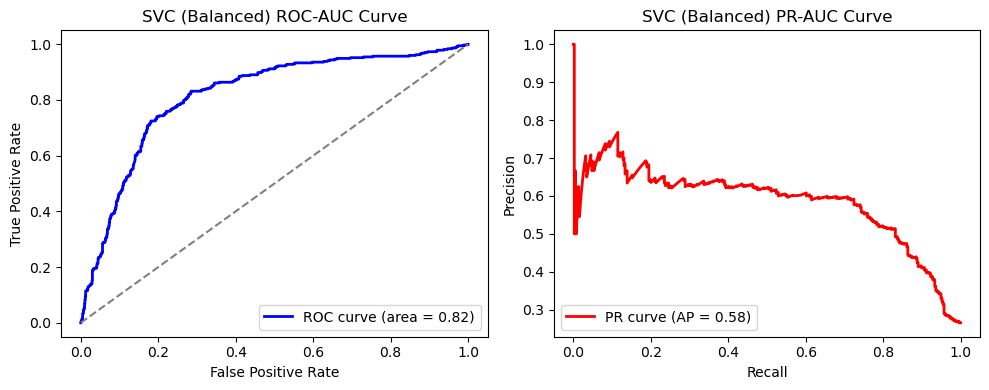

In [276]:
# Collect metrics
svm_bal_metrics = get_metrics(svm_bal, "Balanced", 
                             X_val_scaled, y_val)

# Display ROC PR curves, matrix and report
svm_bal_eval = display_evaluation(
    svm_bal, "Balanced", X_train_scaled, y_train, 
    X_val_scaled, y_val, learning_curve=False
)

Following class balancing, *SVM* demonstrated a remarkable improvement in performance. Notably, its *recall* increased from *0.44* in the base model to *0.78*, a dramatic enhancement in its ability to identify churners. While precision dropped 10 points from *0.63* to *0.53*, this trade-off was expected, since capturing the minority class in an imbalanced dataset often comes at the expense of precision. The *F1 score* also saw a substantial increase, from *0.51* to *0.63*, further demonstrating an overall improvement in performance. 

The confusion matrix clearly reflects these gains, with *293 true positives* and only *81 false negatives*. This differs significantly compared to the base model, which had 211 true positives and 163 false negatives. It's important to note, however, the significant increase in false positives from 96 in the base model to *264*, though this is balanced by the reduction in false negatives and a greater number of true positives. Despite the increase in false positives, the precision remains above the *0.5-threshold (50%)* set for all models, making the trade-off acceptable in this context. 

The *PR-AUC score* of *0.58*, while not as strong as that of *Logistic Regression*, is still higher than *KNN*.

Overall, *SVM* has shown promising improvement post-balancing, and further grid search optimisation could further amplify these results.

#### Random Forests

The *Random Forests* model was re-fitted with `class_weights` set to *'balanced'*, and subsequently evaluated on the validation data.

In [280]:
# Set up balanced Random Forests model
rf_bal = RandomForestClassifier(random_state=1066, 
                                class_weight="balanced")
rf_bal.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1066)

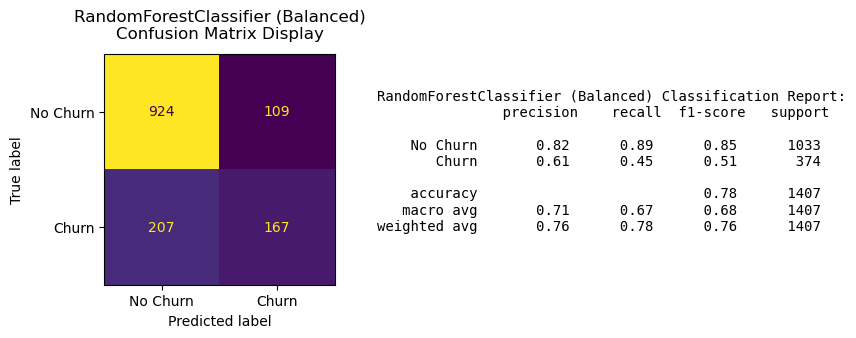

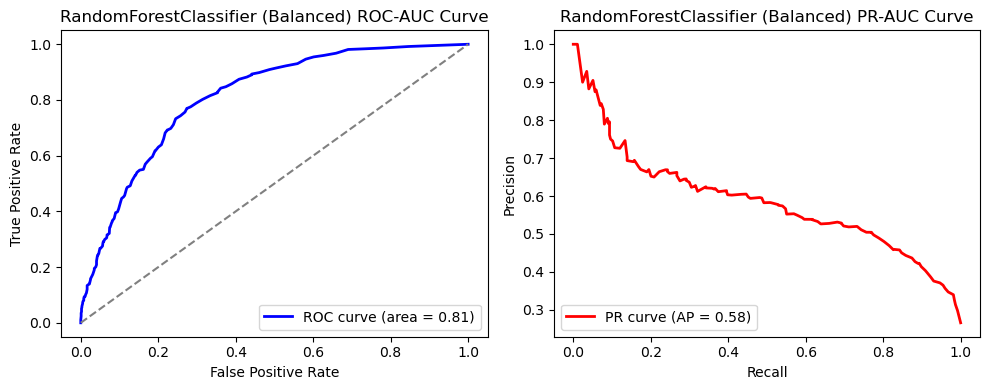

In [281]:
# Collect metrics
rf_bal_metrics = get_metrics(rf_bal, "Balanced", 
                             X_val, y_val)

# Display ROC PR curves, matrix and report
rf_bal_eval = display_evaluation(
    rf_bal, "Balanced", X_train, y_train, 
    X_val, y_val, learning_curve=False
)

The performance of the *Random Forest classifier* following class balancing was highly dissapointing, with minimal improvement compared to the base model. The *recall* remained stagnant at *0.45*, and *precision* saw only a one-point increase from *0.60* to *0.61*. This lack of improvement in recall is concerning, as it indicates that the model continues to struggle in identifying churners effectively. The *F1 score* remained at *0.51* further confirming the model's overall poor performance.

The confusion matrix reflects these results, with *167 true positives* and *207 false negatives*, barely differing from the base model's 168 true positives and 206 false negatives. Though the number of false negatives dropped slightly from 112 to 109, this is negligible with respect to the model's performance. Interestingly, the *PR-AUC score* of *0.58* aligns closely with that of *SVM*, although *Random Forests* underperformed in nearly every other aspect.

In summary, *Random Forests* failed to demonstrate any significant advancement in this phase of testing. Grid search optimisation will be crucial to salvage this models performance, as the current results fall far short of expectations. Given that *Random Forests* is an ensemble method, which typically exceps in handling more complex datasets, there is still hope that tuning its hyperparameters will reveal its potential. At this point, however, it's clear that more refinement is needed to deliver the kind of results expected from an ensemble model.

#### Gradient Boosting

*Gradient Boosting* was re-fitted using the resampled SMOTE data rather than class weights, as the model does not support them.

In [285]:
# Set up balanced Gradient Boosting Model
gb_bal = GradientBoostingClassifier(random_state=1066)
gb_bal.fit(X_resampled, y_resampled)

GradientBoostingClassifier(random_state=1066)

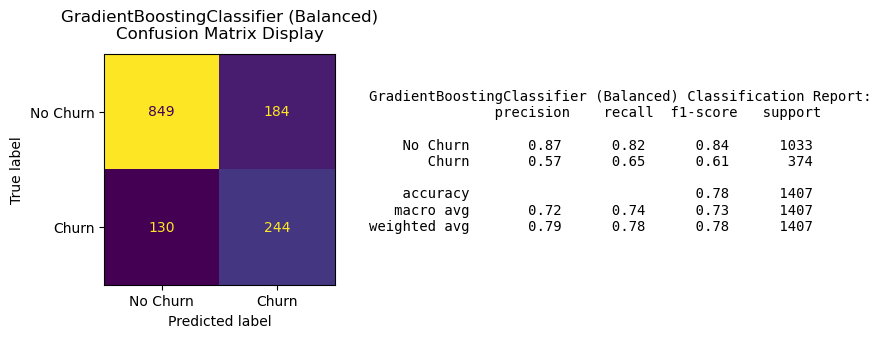

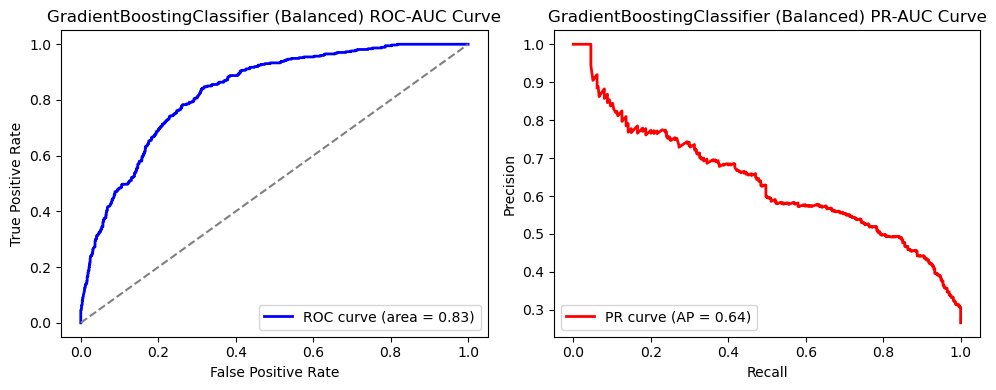

In [286]:
# Collect metrics
gb_bal_metrics = get_metrics(gb_bal, "Balanced", 
                             X_val, y_val)

# Display ROC PR curves, matrix and report
gb_bal_eval = display_evaluation(
    gb_bal, "Balanced", X_resampled, y_resampled, 
    X_val, y_val, learning_curve=False
)

Upon evaluation on the validation set, several key metrics stood out. *Precision* dropped from *0.63* to *0.57*, reflecting a slight reduction in the accuracy of identifying churners, but this was not unexpected, as similar observations were made for the other models. *Recall* saw a substantial increase from *0.47* to *0.65*, marking a significant improvement in the model's ability to correctly identify churners. The *F1 score* rose from *0.51* to *0.54*, a modest improvement. The *PR-AUC score* remained at *0.64*, highlighting the model's strength at managing the precision-recall trade-off.

The confusion matrix further confirms these observations, with *244 true positives*, *184 false positives*, and *130 false negatives*. This shows a clear improvement over the base model, which had 177 true positives, 102 false positives, and 197 false negatives.

Compared to *Random Forests*, *Gradient Boosting* performed markedly better overall, especially in recall. While it still falls short of the top-performers so far in some areas, such as *Logistic Regression* and *SVM*, *Gradient Boosting* scored higher precision than both, thus demonstrating fairly robust performance in this phase of testing.

#### Adaptive Boosting

Finally, the *AdaBoost* model was re-fitted using the resampled SMOTE training data, to compensate for its lack of a class balancing parameter.

In [290]:
# Set up balanced AdaBoost Model
ada_bal = AdaBoostClassifier(algorithm="SAMME", random_state=1066)
ada_bal.fit(X_resampled, y_resampled)

AdaBoostClassifier(algorithm='SAMME', random_state=1066)

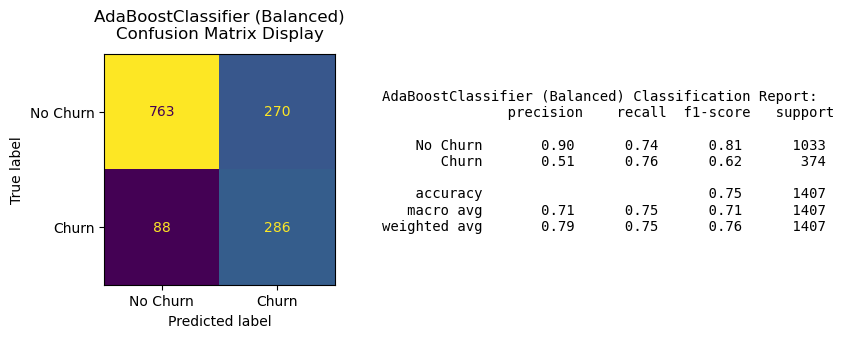

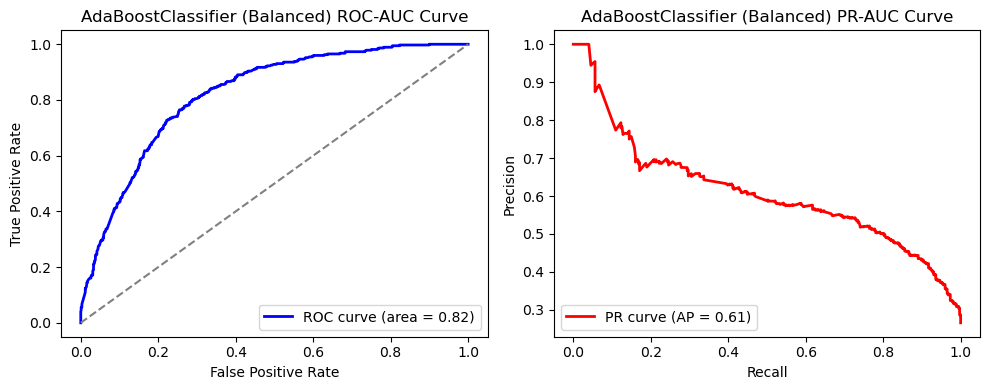

In [291]:
# Collect metrics
ada_bal_metrics = get_metrics(ada_bal, "Balanced", 
                             X_val, y_val)

# Display ROC PR curves, matrix and report
ada_bal_eval = display_evaluation(
    ada_bal, "Balanced", X_resampled, y_resampled, 
    X_val, y_val, learning_curve=False
)

Several key performance metrics were observed, showcasing significant improvements in this model's iteration. The *recall* jumped dramatically from *0.48* in the base model to *0.76*, which is an impressive increase and highlights *AdaBoost's* ability to correctly predict more churners with the resampled data. *Precision* did fall from *0.64* to *0.51*, which, as with other models, was expected, but still acceptable for the context of this project. The *F1 score* increased from *0.55* to *0.62*, largely driven by the increase in recall. The *PR-AUC score* remained solid at *0.61*, with strong recall and a respectable level of precision.

The confusion matrix supports these results, and shows us that *AdaBoost* identified *286 true positives* and only *88 false negatives*, a significant improvement from the base model's 180 true positives and 194 false negatives. However, the increase in recall came at the cost of a higher number of false positives, rising from 101 to 270. Despite this trade-off, the model's recall is now significantly stronger, and its overall performance has improved significantly.

The balanced *AdaBoost* model demonstrated very good performance compared to its base counterpart, making it one of the more promising models overall.

#### Results and Observations

The table below provides a summary of key performance metrics for both the **Churn** and **No Churn** classes across the balanced models. As done previously, a bar chart was also visualised to compare the models based on precision, recall and f1-score for the *churn* class, but now with the Average Precision (PR-AUC) score in addition.

In [295]:
# Define list of balanced model metrics
bal_metrics = [
    lr_bal_metrics,
    knn_bal_metrics,
    svm_bal_metrics,
    rf_bal_metrics,
    gb_bal_metrics,
    ada_bal_metrics
]

# Create DataFrame
df_bal_metrics = pd.DataFrame(bal_metrics)
df_bal_metrics

Model Model Configuration  Accuracy Score  \
0          LogisticRegression            Balanced        0.743426   
1        KNeighborsClassifier            Balanced        0.739161   
2                         SVC            Balanced        0.754797   
3      RandomForestClassifier            Balanced        0.775409   
4  GradientBoostingClassifier            Balanced        0.776830   
5          AdaBoostClassifier            Balanced        0.745558   

   Precision (Churn)  Recall (Churn)  F1 Score (Churn)  Precision (No Churn)  \
0           0.510998        0.807487          0.625907              0.911765   
1           0.508600        0.553476          0.530090              0.833000   
2           0.526032        0.783422          0.629431              0.904706   
3           0.605072        0.446524          0.513846              0.816976   
4           0.570093        0.652406          0.608479              0.867211   
5           0.514388        0.764706          0.615054              0.896592   

   Recall (No Churn)  F1 Score (No Churn)  Churn ROC-AUC Score  \
0           0.720232             0.804759             0.835360   
1           0.806389             0.819479             0.760097   
2           0.744434             0.816782             0.816449   
3           0.894482             0.853974             0.810234   
4           0.821878             0.843936             0.831997   
5           0.738625             0.809979             0.821569   

   Churn PR-AUC (AP) Score  
0                 0.607066  
1                 0.494438  
2                 0.584617  
3                 0.583844  
4                 0.636868  
5                 0.606660

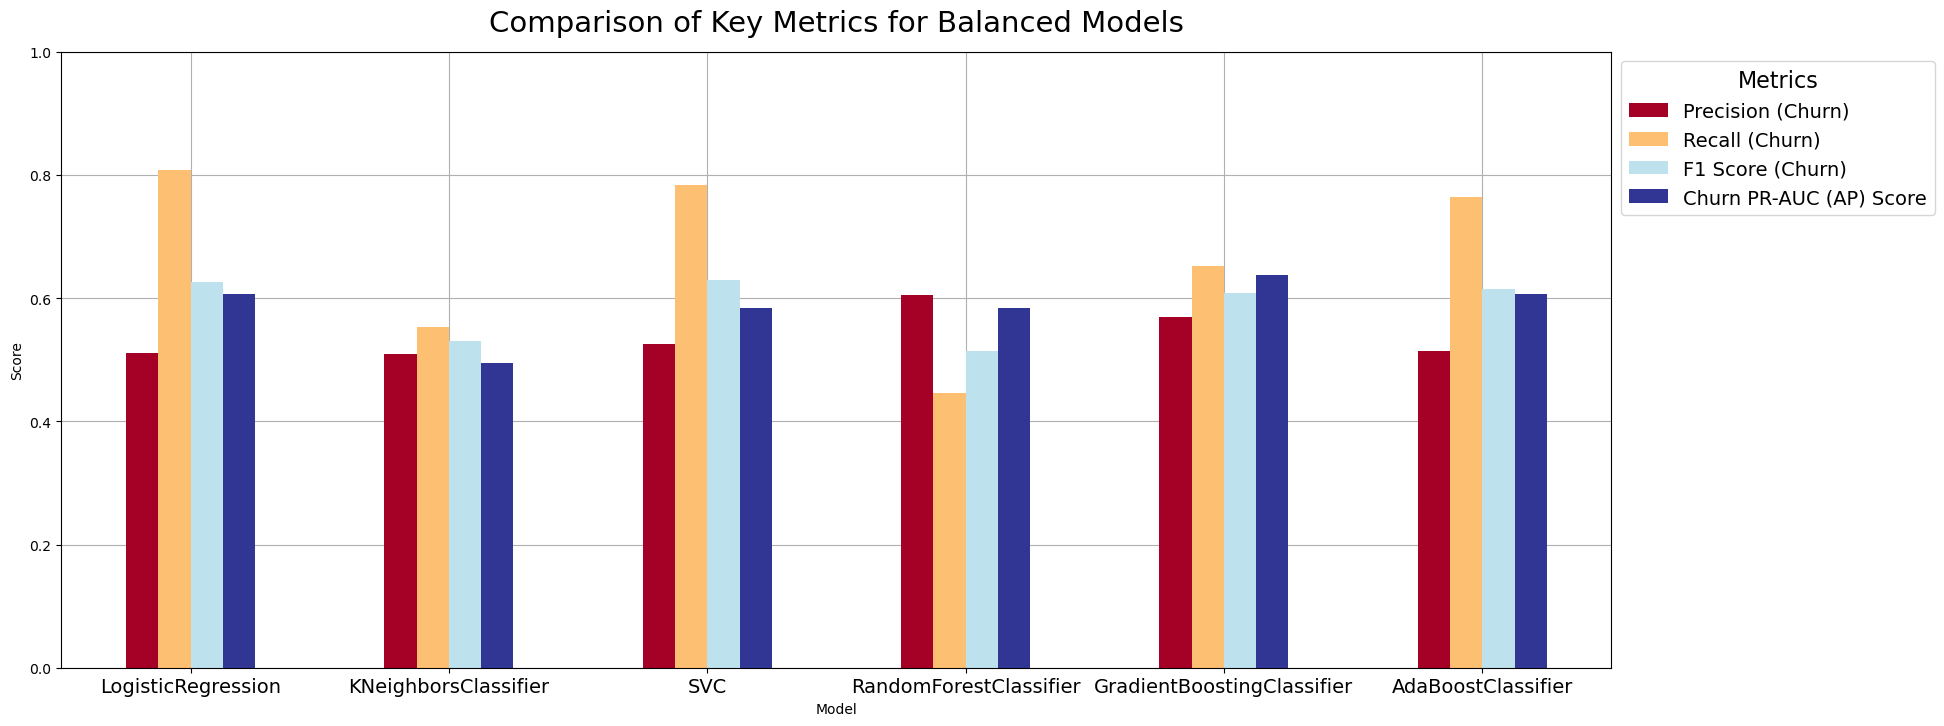

In [296]:
# Define metrics to visualise
metrics = (
    list(df_bal_metrics.columns[3:6])
    + list(df_bal_metrics.columns[10:])
)

# Plot metrics
df_bal_metrics.plot(
    x="Model", 
    y=metrics, 
    kind="bar", 
    grid=True, 
    zorder=2, 
    figsize=(20, 8), 
    cmap="RdYlBu"
)

# Set title and labels
plt.title(
    "Comparison of Key Metrics for Balanced Models",
    y=1.02, fontsize=21
)
plt.ylabel("Score")
plt.xlabel("Model")
# Set xticks
plt.xticks(fontsize=14, rotation=0)
# Set ylim
plt.ylim(0, 1)

# Set legend and layout
plt.legend(title="Metrics", bbox_to_anchor=(1,1),
           fontsize=14, title_fontsize=16)
plt.tight_layout;

After inspecting the performance metrics and visualisation, several notable observations were made.

While *Random Forests* was dissapointing in most metrics, it had the highest **precision** of all the balanced models at *0.61*, though this was barely an improvement over its base model. *Gradient Boosting* followed closely at *0.57*, which performed much better overall compared to *Random Forests*. *AdaBoost*, *Logistic Regression* and *KNN* all had similar precision scores at around 0.51. It's worth noting again that, within the context of this project, precision scores above *0.5* were considered to be acceptable, hence all of the models satisfy this requirement.

When it comes to **recall**, *Logistic Regression* was the standout performer here, achieving the highest score at *0.81*. This model proved the most effective at identifying churners, which is crucial for customer retention strategies. *SVM* came second with a score of *0.78*, followed closely by *AdaBoost* at *0.76*. In stark contrast, *Random Forests* had the lowest recall of *0.45*, followed by *KNN* at *0.55*; both models missed a significant number of churners, significantly impacting their prediction potential.

*SVM* and *Logistic Regression* had nearly identical **F1 scores**, corresponding to *0.629* and *0.626*, respectively. *AdaBoost* also performed well here with an F1 score of *0.615*, closely followed by *Gradient Boosting* with *0.608*. Meanwhile, *Random Forests* and *KNN* trailed with F1 scores of *0.51* and *0.53*, respectively, emphasising their overall poorer performance.

The **Average Precision (PR-AUC) score** is particularly valuable in the case of an imbalanced dataset like this one, as it focuses on the trade-off between precision and recall for the minority class, that is, *Churn*. *Gradient Boosting* scored the highest PR-AUC score at *0.64*, demonstrating its ability to manage this trade-off effectively compared to the other models. *Logistic Regression* and *AdaBoost* performed similarly, with each scoring *0.61*. *SVM* had an Average Precision score of *0.58*, which was respectable, though not on par with the other models. *Random Forests*, while similarly scoring *0.58* in PR-AUC, was overshadowed by its poor recall and F1 score. *KNN* was the worst performer in this metric, with a score of only *0.49*, further emphasising its disappointing performance.

To conclude this section, the **best performers** so far have been, undoubtably, ***Logistic Regression***, ***SVM***, and ***AdaBoost***. These models excelled across multiple metrics, with *Logistic Regression* performing admirably, especially in *recall* and overall balance. *SVM* impressed with its *F1 score*, while *AdaBoost* demonstrated consistently strong results all across the board. On the other hand, *Random Forests* and *KNN* were the biggest dissapointments. *Random Forests*, despite being an ensemble method, underperformed significantly, especially in *recall*. *KNN* similarly struggled, with generaly poor performance all around, and failed to show significant improvement compared to its base counterpart. However, there is still potential for improvement, and grid search optimisation will be essential in trying to salvage *Random Forest's* performance as well as potentially improving *KNN*. Both models still show promise, but significant parameter tuning will be necessary to see meaningful improvements.



### Grid Search Optimisation

Following the evaluation of base and class-balanced models, the performance characteristics of each model without any adjustment of hyperparameters have become clear. The results suggest that model performance generally improved with class balancing techniques applied, as opposed to 'out-of-the-box' configurations.

The rest of the section now focuseses on optimising hyperparameters to enhance model performance further. As previously established, the key metrics of interest are those relating specifically to the *churn* class, which will be prioritised in this section unless stated otherwise.

For this project, optimisation was geared towards *increasing recall* while maintaining a *minimum precision threshold of 0.5*. The *Average Precision (AP) score* is used as a benchmark for acceptable performance, with a target of *0.6* as a minimum and values exceeding *0.7* considered highly desirable. Aditionally, the project aimed for *F1 score* of at least *0.6*; however, a higher *AP score* is preferable in this context.

This optimisation phase is particularly critical for the *K-Nearest Neighbours (KNN)* and *Random Forests* models, which showed weaker overall performance in the initial tests. The optimisation process will determine whether their poor results thus far were due to default parameter limitations or if these models are inherently unsuited for churn prediction in this particular dataset.

Hyperparameter tuning was conducted using **Grid Search with Cross-Valudation**, that is `GridSearchCV`, a method that evaluates each possible parameter combination within a specified range outlined in a parameter grid. **5-Fold Cross-Validation** was employed to ensure reliable model assessment, providing multiple validation sets to assess performance during model training. This number of folds was chosen to balance computational efficiency and the benefits of robust cross-validation. Additionally, the `n_jobs` parameter was set to *-1* to utilise all available CPU cores, thereby speeding up the search process. 

To align with the project's objective of maximising *recall* while maintaining a precision of at least *0.5*, a *custom scoring function* `custom_score` was implemented and then assigned to the variable `scorer` (see *Helper Functions* at the beginning of *Model Optimisation and Tuning*). This custom scorer enabled model selection with a stronger emphasis on *recall*, provided the *precision* threshold was upheld. The `scoring` parameter in `GridSearchCV` was set to this custom scorer to enforce these criteria consistently across all models. Furthermore, `verbose` was set to 2 to allow progress updates throughout the fitting process, which provided a clear view of the grid search stages and facilitated monitoring of its completion. As in the previous section, class balancing (or resampling, where appropriate) was also applied by default to each model.

To avoid potential preprocessing errors and data leakage, each grid search optimisation along with subsequent optimised fitted models, were implemented within a *Pipeline* object. The pipelines ensured that all necessary preprocessing steps, such as scaling and resampling, were applied consistently and in the correct sequence throughout the training process.

Due to the wide range of parameters available for some models, particularly *Random Forests* and *Gradient Boosting*, some grid searches required substantial computational time, some several hours. Where grid search results did not meet expectations, additional subsequent manual adjustments were explored to assess alternative configurations and their impact on model performance.

In addition to the *ROC-PR curves*, *confusion matrices*, and *classification reports* generated previously, *learning curves* were produced for each model in this section to assess model generalisation and investigate potential issues of underfitting or overfitting.

As in prior sections, the `random_state` parameter was set to 1066 (where applicable), and the `algorithm` parameter for *AdaBoost* was set to `SAMME` instead of the now-deprecated `SAMME.R`. Finally, note again that the interpretation of probability-based metrics (ROC-AUC and PR-AUC) for *Support Vector Machines (SVM)* requires caution. These estimates were generated using the `predict_proba` method, which *SVM* does not inherently support.

#### Logistic Regression

Starting with *Logistic Regression*, an instance of the model was created with default parameters, `class_weight` set to 'balanced'. The `max_iter` parameter was set to 2000; this was done to address convergence issues encountered in prior grid searches, ensuring the model has enough iterations to reach an optimal solution.

A *Pipeline* object was then defined to streamline preprocessing, including scaling, and to ensure consistent application of these steps throughout the training process.

In [302]:
# Set up instance of model
lr_instance = LogisticRegression(
    max_iter=2000, 
    class_weight="balanced",
    random_state=1066,
)

# Set up LogReg Pipeline
lr_grid_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lr", lr_instance),
])

Next, several lists of key hyperparameters were defined for tuning, including the following:
- **solver**: The *saga*, *lbfgs*, and *liblinear* solvers were included to explore a range of optimisation algorithms.
- **penalty**: The *L1*, *L2*, and *ElasticNet* penalties were tested, with *ElasticNet* providing flexible regularisation by combining different ratios of L1 to L2.
- **l1_ratio**: Applicable only to *ElasticNet* models, this parameter determines the combination of L1 and L2. A range of values 0.01 to 0.99 were chosen.
- **C**: The inverse of regularisation strength, where lower values mean stronger regularisation. A range of C values from 0.001 to 5 were tested to refine regularisation.

These parameters were organised into a *parameter grid*, defining the search space for grid search.

In [304]:
# Define parameter lists
solver = ["saga", "lbfgs", "liblinear"]
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = [0.01, 0.05, 0.1, 0.3, 
            0.5, 0.7, 0.9, 0.95, 0.99]
C = [0.001, 0.01, 0.1, 0.5, 
     0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5]

# Define parameter grid
lr_params = {
    "lr__solver": solver,
    "lr__penalty": penalty,
    "lr__l1_ratio": l1_ratio,
    "lr__C": C,
}

A *GridSearchCV* object was then defined, using the parameter grid specified above to exhaustively test all combinations of parameters, as well as all the GridSearchCV-specific parameters discussed at the beginning of this subsection.

In [306]:
# Define grid search
lr_grid = GridSearchCV(
    estimator=lr_grid_pipe, 
    param_grid=lr_params,  
    cv=5,
    scoring=scorer,
    verbose=2,
    n_jobs=-1
)

In [307]:
# Fit grid
#lr_grid.fit(X_train, y_train)

In [308]:
# Look at best parameters found
#lr_grid.best_params_

The final grid search identified *solver* **liblinear**, *penalty* **L1**, and *C-value* **0.7** as the optimal parameter configuration based on the specified performance criteria (**the *L1 ratio* parameter is redundant in this case since *elastic net* was not selected**). 

However, although this configuration was chosen by the grid search, further experimentation with various parameter combinations consistently resulted in *identical performance metrics* across alternative configurations, and would only change if the *C value* was adjusted to a value other than *0.7*.

Upon further exploration of alternative configurations, the *saga* solver and *elastic net* regularisation (with *L1 ratio* = 0.3) were applied to the model, while keeping the C value at *0.7*; this unsurprisingly resulted in identical performance to the grid-search selected parameters. This consistent performance across configurations, each maintaining a *C value* of *0.7*, highlights the importance of the regularisation parameter's impact on optimising *recall* and *precision* balance. These findings suggest that *Logistic Regression's* capacity on this dataset is likely *maxed out*, with additional parameter adjustments unlikely to yield further gains.

For consistency, the final *optimised* model configuration was chosen as *saga* with *elastic net* (*L1 ratio = 0.3*) and *C=0.7*; this setup was chosen to ensure flexibility for future adaptation while preserving the identical performance metrics. The *saga* solver is well-suited for larger datasets, allowing the model to scale as needed, and *elastic net* regularisation, particularly with an *L1 ratio* of *3*, balances the sparsity benefits of *L1* with the stability of *L2*. The model was subsequently re-trained with the adjusted parameters, and then evaluated on the validation set.

In [310]:
# Create instance of optimised model
lr_opt_instance = LogisticRegression(
    C=0.7,
    l1_ratio=0.3,
    penalty="elasticnet", 
    solver="saga", 
    random_state=1066, 
    class_weight="balanced", 
    max_iter=2000
)

# Set up pipeline with optimised model
lr_opt = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lr", lr_opt_instance)
])

In [311]:
# Fit model
lr_opt.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(C=0.7, class_weight='balanced',
                                    l1_ratio=0.3, max_iter=2000,
                                    penalty='elasticnet', random_state=1066,
                                    solver='saga'))])

In [312]:
# Collect metrics
lr_opt_metrics = get_metrics(lr_opt, "Optimised", 
                             X_val, y_val)

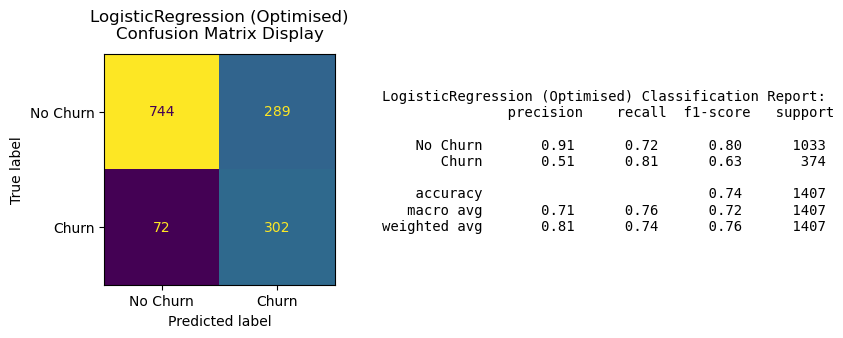

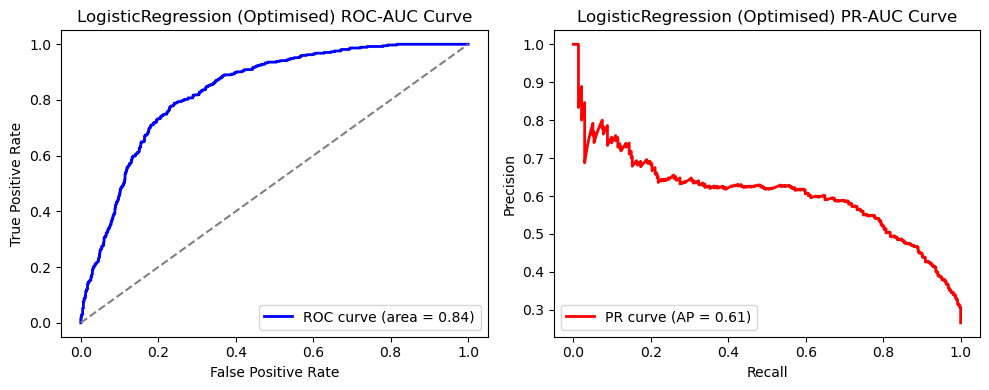

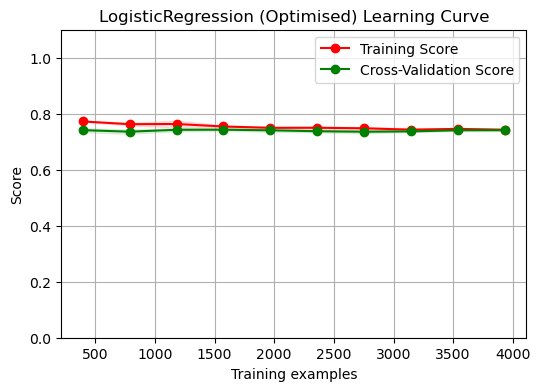

In [313]:
# Display curves, matrix and report
lr_opt_eval = display_evaluation(
    lr_opt, "Optimised", X_train, y_train, X_val, y_val
)

The *optimised Logistic Regression* model, despite exploring a range of configurations, ultimately produced results that were not only identical to each other, but identical even to the balanced model trained earlier, which used only default settings in addition to `class_weights` set to 'balanced'.

All performance metrics remained consistent, reinforcing the notion that *Logistic Regression* likely reached its performance ceiling on this dataset. The classification report, confusion matrix, and ROC-PR curves, whether optimised or default balanced, achieved *virtually the same* balance between *precision* and *recall*. Furthermore, the *learning curve* illustrates a close alignment between training and cross-validation scores, both stabilising around *0.75*. This suggests a well-fitting model with minimal variance, which implies that additional tuning is unlikely to yield further performance gains, as the model consistently maximises *recall* with the set *precision* threshold.

#### K-Nearest Neighbours

Moving onto *KNN*, a *Pipeline* object was created, with SMOTE, scaling, and a base KNN model included within the steps.

In [317]:
# Set up KNN Pipeline
knn_grid_pipe = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=1066)),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

The following key hyperparameters were defined for tuning and stored within a parameter grid:
- **n_neighbors**: This represents the number of neighbours *k*. That is, the K in KNN; a range of neighbours were chosen to establish the optimum quantity.
- **weights**: *Uniform* and *distance* were compared to investigate whether equally-weighted points or distance-weighted points perform better.
- **algorithm**: The method used to find the nearest neighbours; *ball tree*, *KDE tree*, or *brute force* approaches are explored.
- **p**: The *power* parameter $p$; this is applicable when `metric` is set to default 'minkowski', which is used for computing the distance. The *Manhattan distance* (L1) and *Euclidian distance* (L2) are compared, representing values $p=1$ and $p=2$, respectively.
- **leaf_size**: A range of leaf sizes were explored; mainly controls the search speed for nearest neighbours.

In [319]:
# Define variables for parameter grid
n_neighbors = [10, 20, 30, 40, 45, 50, 55, 60, 65, 70]
weights = ["uniform", "distance"]
algorithm = ["ball_tree", "kd_tree", "brute"]
p = [1, 2]
leaf_size = [5, 10, 12, 13, 14, 15, 17, 20, 25, 30]

# Define parameter grid
knn_params = {
    "knn__n_neighbors": n_neighbors,
    "knn__weights": weights,
    "knn__algorithm": algorithm,
    "knn__p": p,
    "knn__leaf_size": leaf_size
}

The *GridSearchCV* model was then defined and thus fitted with all relevant parameters.

In [321]:
# Define grid search
knn_grid = GridSearchCV(
    knn_grid_pipe, 
    knn_params,
    scoring=scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [322]:
# Fit grid
#knn_grid.fit(X_train, y_train)

In [323]:
# Inspect best parameters
#knn_grid.best_params_

The best parameters identified by the grid search were the **ball tree** *algorithm*, **5** for the *leaf size* , **40** *neighbours* ($k=40$), **1** for the *power parameter* ($p=1$), and **uniform** *weights*.

An instance of this optimised model was created and fitted in a pipeline object, including scaling and resampling of the data. The resulting fit was then evaluated on the validation set.

In [325]:
# Create instance of optimised model 
knn_opt_instance = KNeighborsClassifier(
    n_neighbors=40,
    algorithm="ball_tree",
    leaf_size=5,
    p=1
)

# Set up pipeline with optimised model
knn_opt = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=1066)),
    ("scaler", StandardScaler()),
    ("knn", knn_opt_instance)
])

In [326]:
# Fit optimised KNN
knn_opt.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=1066)),
                ('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=5,
                                      n_neighbors=40, p=1))])

In [327]:
# Collect metrics
knn_opt_metrics = get_metrics(knn_opt, "Optimised", 
                              X_val, y_val)

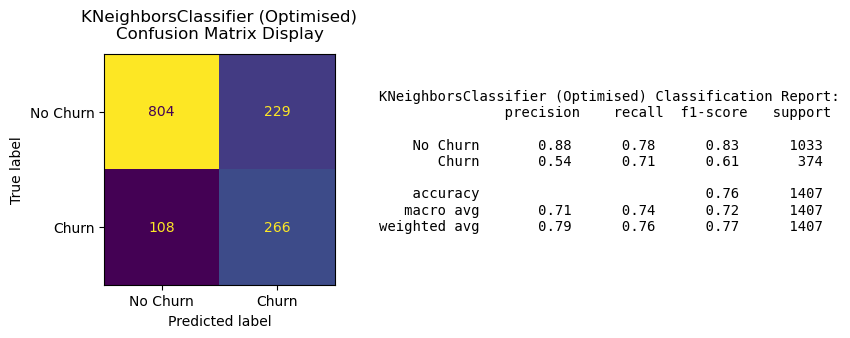

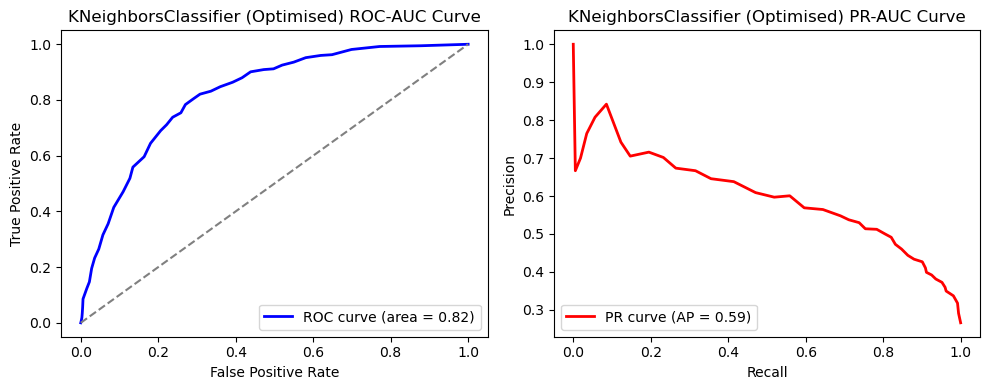

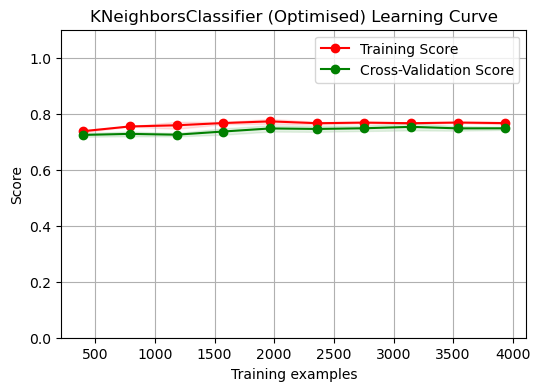

In [328]:
# Display curves, matrix and report
knn_opt_eval = display_evaluation(
    knn_opt, "Optimised", X_train, y_train, X_val, y_val
)

The optimised KNN model demonstrated *significant improvements* in  performance compared to its previous iterations. The based and balanced models both performed poorly, particularly in terms of recall and average precision, with the balanced model seeing only a marginal performance boost compared to its standard baseline metrics. However, after having its parameters tuned through grid search, KNN has shown a marked improvement in performance.

Although *precision* is essentially no different at *0.54*, matching the precision seen in the base KNN and slightly above the balanced KNN, *recall* has grown 16 points to a score of *0.71*, which is a massive improvement; as expected, the *F1 score* has also increased to a score of *0.61*. Additionally, the *AP score* has risen from 0.49 to *0.59*, almost on par with *Logistic Regression*, which shows an improvement in the model's ability to correctly identify and balance between true and false positives.

The confusion matrix shows *266 positives*, *229 false positives*, and *108 false negatives*. The number of false negatives has dropped markedly, while the number of both true and false positives has gone up, though true positives have seen a bigger increase overall. These results are consistent with the increase in *recall*, and an overall indicator of the model's improved capability to capture more positive classes compared to its previous iterations.

On the contrary, a slight decrease in the *recall of the **negative (no churn)** class* was observed, as well as an increase in the *precision of the **negative** class*. These minor changes were was an expected trade-off, as the model has attempted to compensate for the overall class imbalance, and is thus not a significant concern in this case.

The *learning curve* shows training and cross-validation scores that are closely aligned, hovering somewhere around 0.77 and 0.75, respectively. Only a minimal degree of underfitting was observed, as indicated by the slightly higher training score with respect to cross-validation, though this small difference is not likely to significantly impact performance. Hence the learning curve suggests that the model appears to be generalising well to the data.

Comparing *KNN* to *Logistic Regression*, the latter still outperforms KNN across all metrics, with the exception of *precision* by only a few points. However, while Logistic Regression displayed limited sensitivity to grid search tuning, KNN's response was significant, underscoring KNN's higher potential for improvement through hyperparameter tuning.

Overall, KNN's performance has benefitted significantly from the grid search optimisation process, though it still lags behind Logistic Regression in its overall performance.

#### Support Vector Machines

The *Support Vector Machines* model was next to be optimised. A model instance was created with default parameters and `class_weight` set to 'balanced'; `probability` was set to 'True', as done previously (*see caveat about reliability of probability metrics in SVM at start of subsection*). 

A *Pipeline* object was then defined, with scaling and the model included.

In [332]:
# Define SVM instance
svm_instance = SVC(
    probability=True, 
    class_weight="balanced", 
    random_state=1066
)

# Set up SVM Pipeline
svm_grid_pipe = Pipeline(steps=[
    ("scaler", StandardScaler()), 
    ("svm", svm_instance)
])

The following hyperparameters were explored and stored in a corresponding parameter grid:
- **kernel**: Defines how the model transforms data to find the optimal boundary. *Linear* and *RBF* kernels were tested (*polynomial* was tested in a previous search, but was computationally expensive and yielded no significant difference in results).
- **C**: The regularisation parameter (similar to the *C* parameter in *Logistic Regression*); controls the trade-off between minimising error on the training data and maximising the decision boundary (margin) for better generalisation to the data. A range of values *from 0.001 to 20* were explored; lower values allows for a wider margin and error, potentially helping to reduce overfitting, whereas higher values prioritise minimising error by fitting closer to the training data, though this may lead to overfitting in some cases. 
- **gamma**: Controls the influence of individual training points; lower values decrease the influence of individual points (can help to reduce overfitting), whereas higher values increase their influence (may increase risk of overfitting). It works in tandem with *C* to balance model complexity. A range of values *from 0.001 to 20* were explored, along with the default *scale* setting, and the *auto* setting.

In [334]:
# Set up variables for param grid
kernel = ["linear", "rbf"] 
C = [0.001, 0.01, 0.1, 1, 10, 20] 
gamma = ["scale", "auto", 
         0.001, 0.01, 0.1, 1, 10, 20] 

# Set up param grid
svm_params = {
    "svm__kernel": kernel,
    "svm__C": C,
    "svm__gamma": gamma,
}

In [335]:
# Define grid search
svm_grid = GridSearchCV(
    svm_grid_pipe,
    svm_params,
    cv=5,
    scoring=scorer,
    verbose=2,
    n_jobs=-1
)

A GridSearchCV was thus defined and fitted with the pipeline and parameter grid, along with any other relevant parameters.

In [337]:
# Fit grid
#svm_grid.fit(X_train, y_train)

In [338]:
# Get best params
#svm_grid.best_params_

Scoring is f1, best params for svm according to grid search:

{'classifier__C': 1,
 'classifier__degree': 2,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'rbf'}

 Keeping scoring = "f1", but now also including refit = "recall" (f1 used instead of average_precision due to inconsistent results for probability estimates on SVC compared to other models, which AP score requires).

 Best params given:

 {'svm__C': 10,
 'svm__degree': 2,
 'svm__gamma': 'scale',
 'svm__kernel': 'linear'}

 Running same search again but with scoring = "balanced_accuracy". Gave same results.

 Changed param grid to:

 kernel = ["linear", "rbf"] 
C = [0.001, 0.01, 0.1, 1, 10, 100] 
gamma = ["scale", "auto", 0.001, 0.01, 0.1, 1, 10, 100] 

Gave same results.

svm_opt_instance = SVC(
    C=1,
    kernel="rbf",
    gamma=0.001,
    probability=True, 
    class_weight="balanced", 
    random_state=1066
)

The grid search identified the **RBF** *kernel* as the best performer, along with a *gamma* value of **0.01** and a *C* value of **10**, suggesting higher regularisation to closely fit to the training data, while keeping the model's sensitivity to individual points in check.

A *SVM* model is thus defined and fitted, with scaling factored into a pipeline object, and then evaluated on the validation set.

In [341]:
# Define model instance
svm_opt_instance = SVC(
    C=1,
    kernel="rbf",
    gamma=0.001,
    probability=True, 
    class_weight="balanced", 
    random_state=1066
)

# Set up pipeline
svm_opt = Pipeline(steps=[
    ("scaler", StandardScaler()), 
    ("svm", svm_opt_instance)
])

In [342]:
# Fit optimised model
svm_opt.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=1, class_weight='balanced', gamma=0.001,
                     probability=True, random_state=1066))])

In [343]:
# Collect metrics
svm_opt_metrics = get_metrics(
    svm_opt, "Optimised", X_val, y_val
)

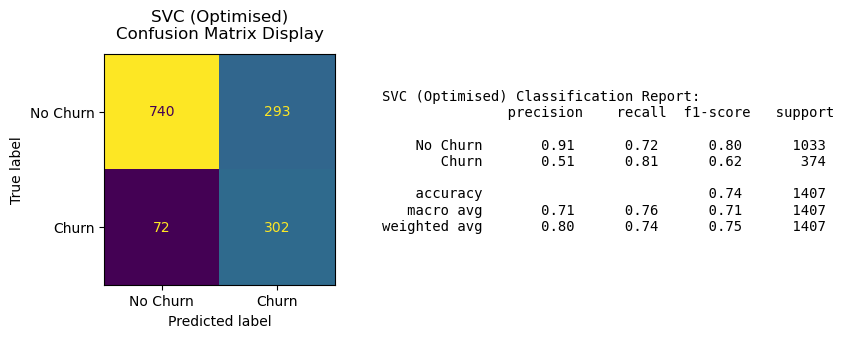

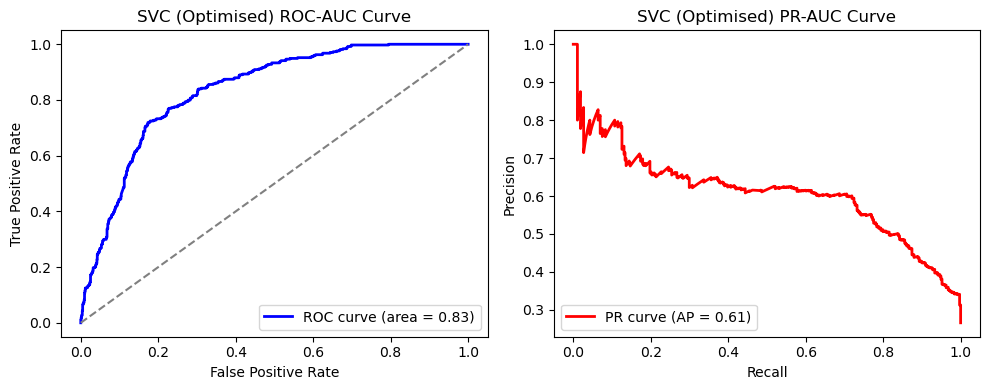

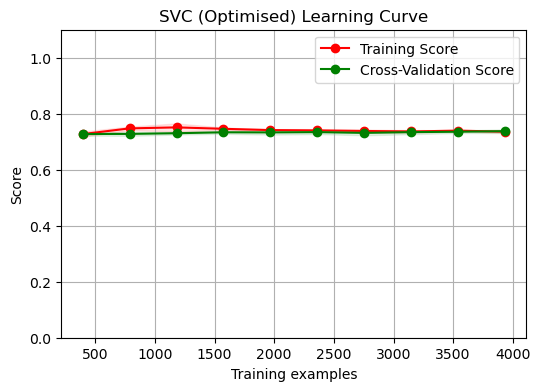

In [344]:
# Display curves, matrix and report
svm_opt_eval = display_evaluation(
    svm_opt, "Optimised", X_train, y_train, X_val, y_val
)

The optimised *SVM* model demonstrates a clear improvement in performance compared to both its baseline and balanced iterations. While the improvements after grid search optimisation are not drastic, they are nonetheless meaningful and contribute positively to the model's overall effectiveness, especially when compared to *Logistic Regression*.

*Precision* dropped slightly to *0.51* compared to the balanced iteration, whereas *recall* increased slightly to *0.81*. The *F1 score* decreased by a single point to 0.62, though the *AP score* rose by 3 points to *0.61*, indicating an overall improvement in the model's ability to distinguish between classes. Despite the small decrease in *precision*, it still meets the criterion set for this project, that is, for the model's *precision* to be at least 0.5. The slight drop in *F1 score* is negligible, and the overall shift in metrics suggest that the optimised model has achieved a better balance, with fewer missed churn cases (lower false negatives), while maintaining acceptable precision.

The confusion matrix shows *302 true positives*, *293 false positives*, and *72 false negatives*; though the number of false positives has somewhat increased, the corresponding reduction in false negatives compensates for this, which is a positive difference given the focus on *recall* for the positive class.
The *learning curve* indicates that the data if fitting well, with training and cross-validation scores aligning closely somewhere around *0.74-0.75*, suggesting minimal variance and no indication of over- or underfitting, and thus a well-generalised model.

After optimisation, the performance of *SVM* is now nearly on par with *Logistic Regression*, with both models showing comparable metrics across *precision*, *recall*, and *F1 score* for both classes. *SVM* has shown substantial improvement from its initial base model (which had a *recall* of only *0.44*) through class balancing and optimisation, ultimately rivalling *Logistic Regression's* performance. This improvement is particularly impressive for *SVM*, evolving from an initially underwhelming model to a strong contender.

Overall, *SVM* has demonstrated exponential improvement, progressing from a relatively weak performer at its baseline, to a model with performance almost identical to that of *Logistic Regression*.

#### Random Forests

The next model to be optimised was *Random Forest*, the first of the *ensemble methods*. An initial instance of the model instance was created with default parameters and `class_weight` set to 'balanced'. To save computation time, some settings were retained as defaults based on findings from previous grid searches, where specific configurations consistently performed well. Specifically, `bootstrap=True` and `max_features="sqrt"` were retained, since these settings were frequently effective.

For consistency with the other models, *Random Forest* was also placed within a *Pipeline* object, despite not requiring any additional preprocessing steps. This ensured a uniform workflow across all models and consistency in the project structure.

In [348]:
# Define RF instance for Pipeline
rf_instance = RandomForestClassifier(
    random_state=1066,
    class_weight="balanced"
)

# Set up Pipeline for RF
rf_grid_pipe = Pipeline(steps=[
    ("rf", rf_instance)
])

The following key hyperparameters were chosen to be investigated, which were then stored within a parameter grid:
- **n_estimators**: Defines the number of *decision trees* in the forest. More trees typically improves model performance, but at an increased computational cost, and often with diminishing returns after a certain point. A range *from 50 to 300 trees* were chosen for the grid search.
- **max_depth**: The maximum depth of each tree, which controls how many splits each tree can make. Deeper trees capture more information about the data, but may result in overfitting, whereas limiting depth can help to prevent overfitting by simplifying the model. A range of maximum depths, ranging *from 5 to 20*, were investigated.
- **min_samples_split**: The minimum number of samples required to split a node. Lower values mean the tree splits a node with fewer samples, which can lead to more complex trees that fit closer to the training data, whereas higher values result in simpler trees which can help the model generalise better to the training data. Values *from 2 to 20* were chosen to be explored.
- **min_samples_leaf**: The minimum number of samples required to form a leaf node (the final node at the end of a tree), ensuring that every terminal node has at least this number of samples. Like `min_samples_split`, lower values increase the trees' complexity (more leaves, smaller in size), whereas larger values contribute to a simpler tree structure (fewer leaves, larger in size). Values *from 2 to 20* were explored.
- **criterion**: The function used to measure and select the quality of each split in the trees. Both *Gini impurity* and *entropy* were explored, as they use different metrics to evaluate splits.

In [350]:
# Set up variables for param grid
n_estimators = [50, 100, 150, 175, 
                200, 225, 250, 275, 300]
max_depth = [5, 7, 10, 13, 15, 17, 20]
min_samples_split = [2, 5, 7, 10, 15, 17, 20]
min_samples_leaf = [2, 3, 5, 7, 10, 13, 15, 17, 20]
criterion = ["gini", "entropy"]

# Set up param grid
rf_params = {
    "rf__n_estimators": n_estimators,
    "rf__max_depth": max_depth,
    "rf__min_samples_split": min_samples_split,
    "rf__min_samples_leaf": min_samples_leaf,
    "rf__criterion": criterion
}

An instance of GridSearchCV was subsequently created and fitted with the given data, along with all the relevant parameters.

In [352]:
# Define grid search
rf_grid = GridSearchCV(
    rf_grid_pipe,
    rf_params,
    cv=5,
    scoring=scorer,
    verbose=2,
    n_jobs=-1
)

In [353]:
# Fit grid
#rf_grid.fit(X_train, y_train)

In [354]:
# Inspect best parameters
#rf_grid.best_params_

The grid search for the Random Forest model selected **Gini** as the best *criterion*, with a *maximum depth* of **5**, at least **17** samples to form a leaf node, at least **2** samples to split a node, and **175** estimators as the optimum number of decision trees.

A new model instance was then created and fitted in a pipeline object (for consistency), and subsequently evaluated on the validation set. The `criterion="gini"` and `min_samples_split=2` parameters were left unchanged, since these settings are already set by default.

In addition, an **out-of-oag (OOB) score**, unique to *Random Forest*, was generated as an extra validation metric, which provides additional insight into the model's generalisation performance.

In [356]:
# Create optimised model instance
rf_opt_instance = RandomForestClassifier(
    n_estimators=175,
    max_depth=5,
    min_samples_leaf=17,
    random_state=1066,
    class_weight="balanced",
    oob_score=True
)

# Set up pipeline for rf instance (for consistency)
rf_opt = Pipeline(steps=[
    ("rf", rf_opt_instance)
])

In [357]:
# Fit optimised model
rf_opt.fit(X_train, y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=17, n_estimators=175,
                                        oob_score=True, random_state=1066))])

In [358]:
# Collect metrics
rf_opt_metrics = get_metrics(
    rf_opt, "Optimised", X_val, y_val
)

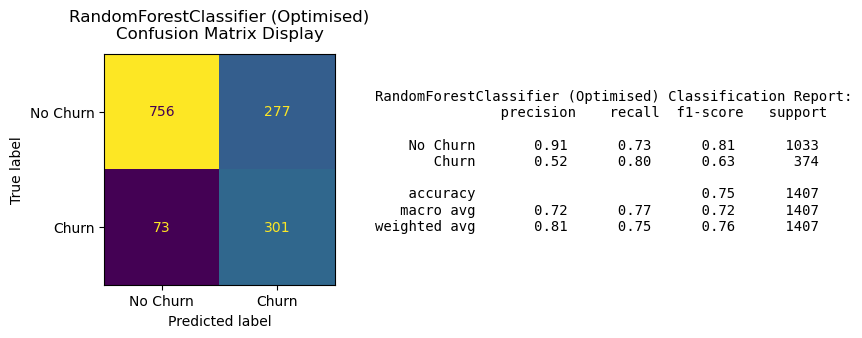

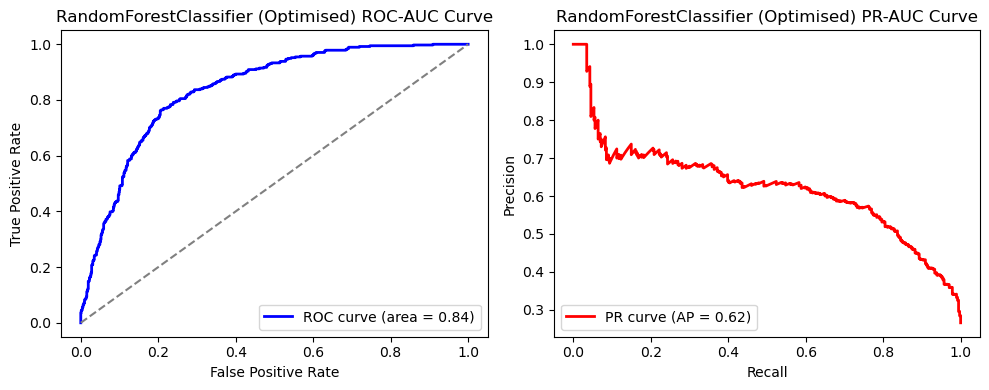

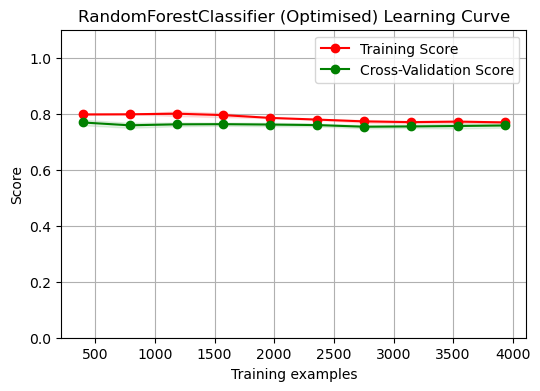

In [359]:
# Display curves, matrix and report
display_evaluation(
    rf_opt, "Optimised", X_train, y_train, X_val, y_val
)

In [360]:
# Display OOB score
rf_opt[-1].oob_score_

0.7549776513612353

Following grid search optimisation, the performance of *Random Forest* has shown a dramatic transformation. Initially, *Random Forest* was among the weakest performers in both its baseline and balanced iterationsm with particularly poor *recall*; even after class balancing, *recall* remained low at *0.45*, and the model struggled to keep up with the other algorithms in terms of overall predictive power.

While *precision* decreased by nearly 10 points, from 0.61 to *0.52*, *recall* has surged from 0.45 to *0.80*, an impressive gain, which reflects the impact of parameter tuning on this model; the corresponding *F1 score* hence increased from 0.51 to *0.63*. The *AP score* also increased to *0.62*, now the highest among all optimised models, surpassing both *Logistic Regression* and *SVM* by one point. This performance places *Random Forest* on par with the top performing models, a remarkable turnaround from its earlier, underwhelming results.

The confusion matrix further highlights this improvement, with *301 true positives*, *277 false positives*, and *73 false negatives*, comparable to *Logistic Regression*, with only a difference of 1 point in both false negatives and true positives, along with fewer false positives. In contrast, previous *balanced* iteration of *Random Forest* has 167 true positives, 109 false positives, and 207 false negatives. This substantial reduction in false negatives, combined with nearly double the number of true positives, illustrates the model's newfound ability to identify cases of customer churn. 

The *learning curve* shows closely aligned training and cross-validation scores at around *0.77-0.78*, indicating a well-generalised model. Additionally, the *out-of-bag (OOB) score* was found to be approximately *0.755*, which is close to the learning curve scores, further supporting the reliability of the model across different validation approaches.

After optimisation, *Random Forest* now performs comparably to *Logistic Regression* as well as *SVM*, which have also delivered strong results. *Random Forest's* precision is one point higher than *Logistic Regression*, while *recall* is only one point lower, and the *F1 scores* are identical in both models; for the **negative (no churn) class**, *recall* is actually one point higher in *Random Forest*. 

Overall, *Random Forest* has undergone a substantial transformation, going from one of the weakest performers to a top-performing model. Its recall has nearly doubled, and its metrics rival both *Logistic Regression* and *SVM*. This dramatic change in performance highlights *Random Forest's* sensitivity to hyperparameter tuning, which proves essential for this model. *Random Forest* has truly gone from 'zero to one hundred', transforming from one of the worst models to one of the best.

##### Feature Importances (Supplementary Insight)

As an added analysis, the **feature importances** from the optimised *Random Forest* model were investigated. Since *Random Forest* naturally ranks features by their importance, the features that contribute most to predicting **churn** can thus be easily identified. 

A bar plot is hence created below.

In [364]:
# Create feature importances Series
feat_importances = pd.Series(
    rf_opt[-1].feature_importances_, 
    index=rf_opt[-1].feature_names_in_
).sort_values(ascending=False)

# Print Series
print(feat_importances)

ContractLength                             0.246238
tenure                                     0.160411
InternetService_Fiber optic                0.092575
OnlineSecurity_No                          0.088426
TotalCharges                               0.078914
TechSupport_No                             0.072374
MonthlyCharges                             0.068118
PaymentMethod_Electronic check             0.061201
OnlineBackup_No                            0.033070
InternetService_DSL                        0.022348
DeviceProtection_No                        0.018594
TechSupport_Yes                            0.012033
PaperlessBilling_Yes                       0.010194
OnlineSecurity_Yes                         0.009054
Dependents_Yes                             0.006474
OnlineBackup_Yes                           0.005390
DeviceProtection_Yes                       0.003153
Partner_Yes                                0.003100
PaymentMethod_Bank transfer (automatic)    0.002932
PaymentMetho

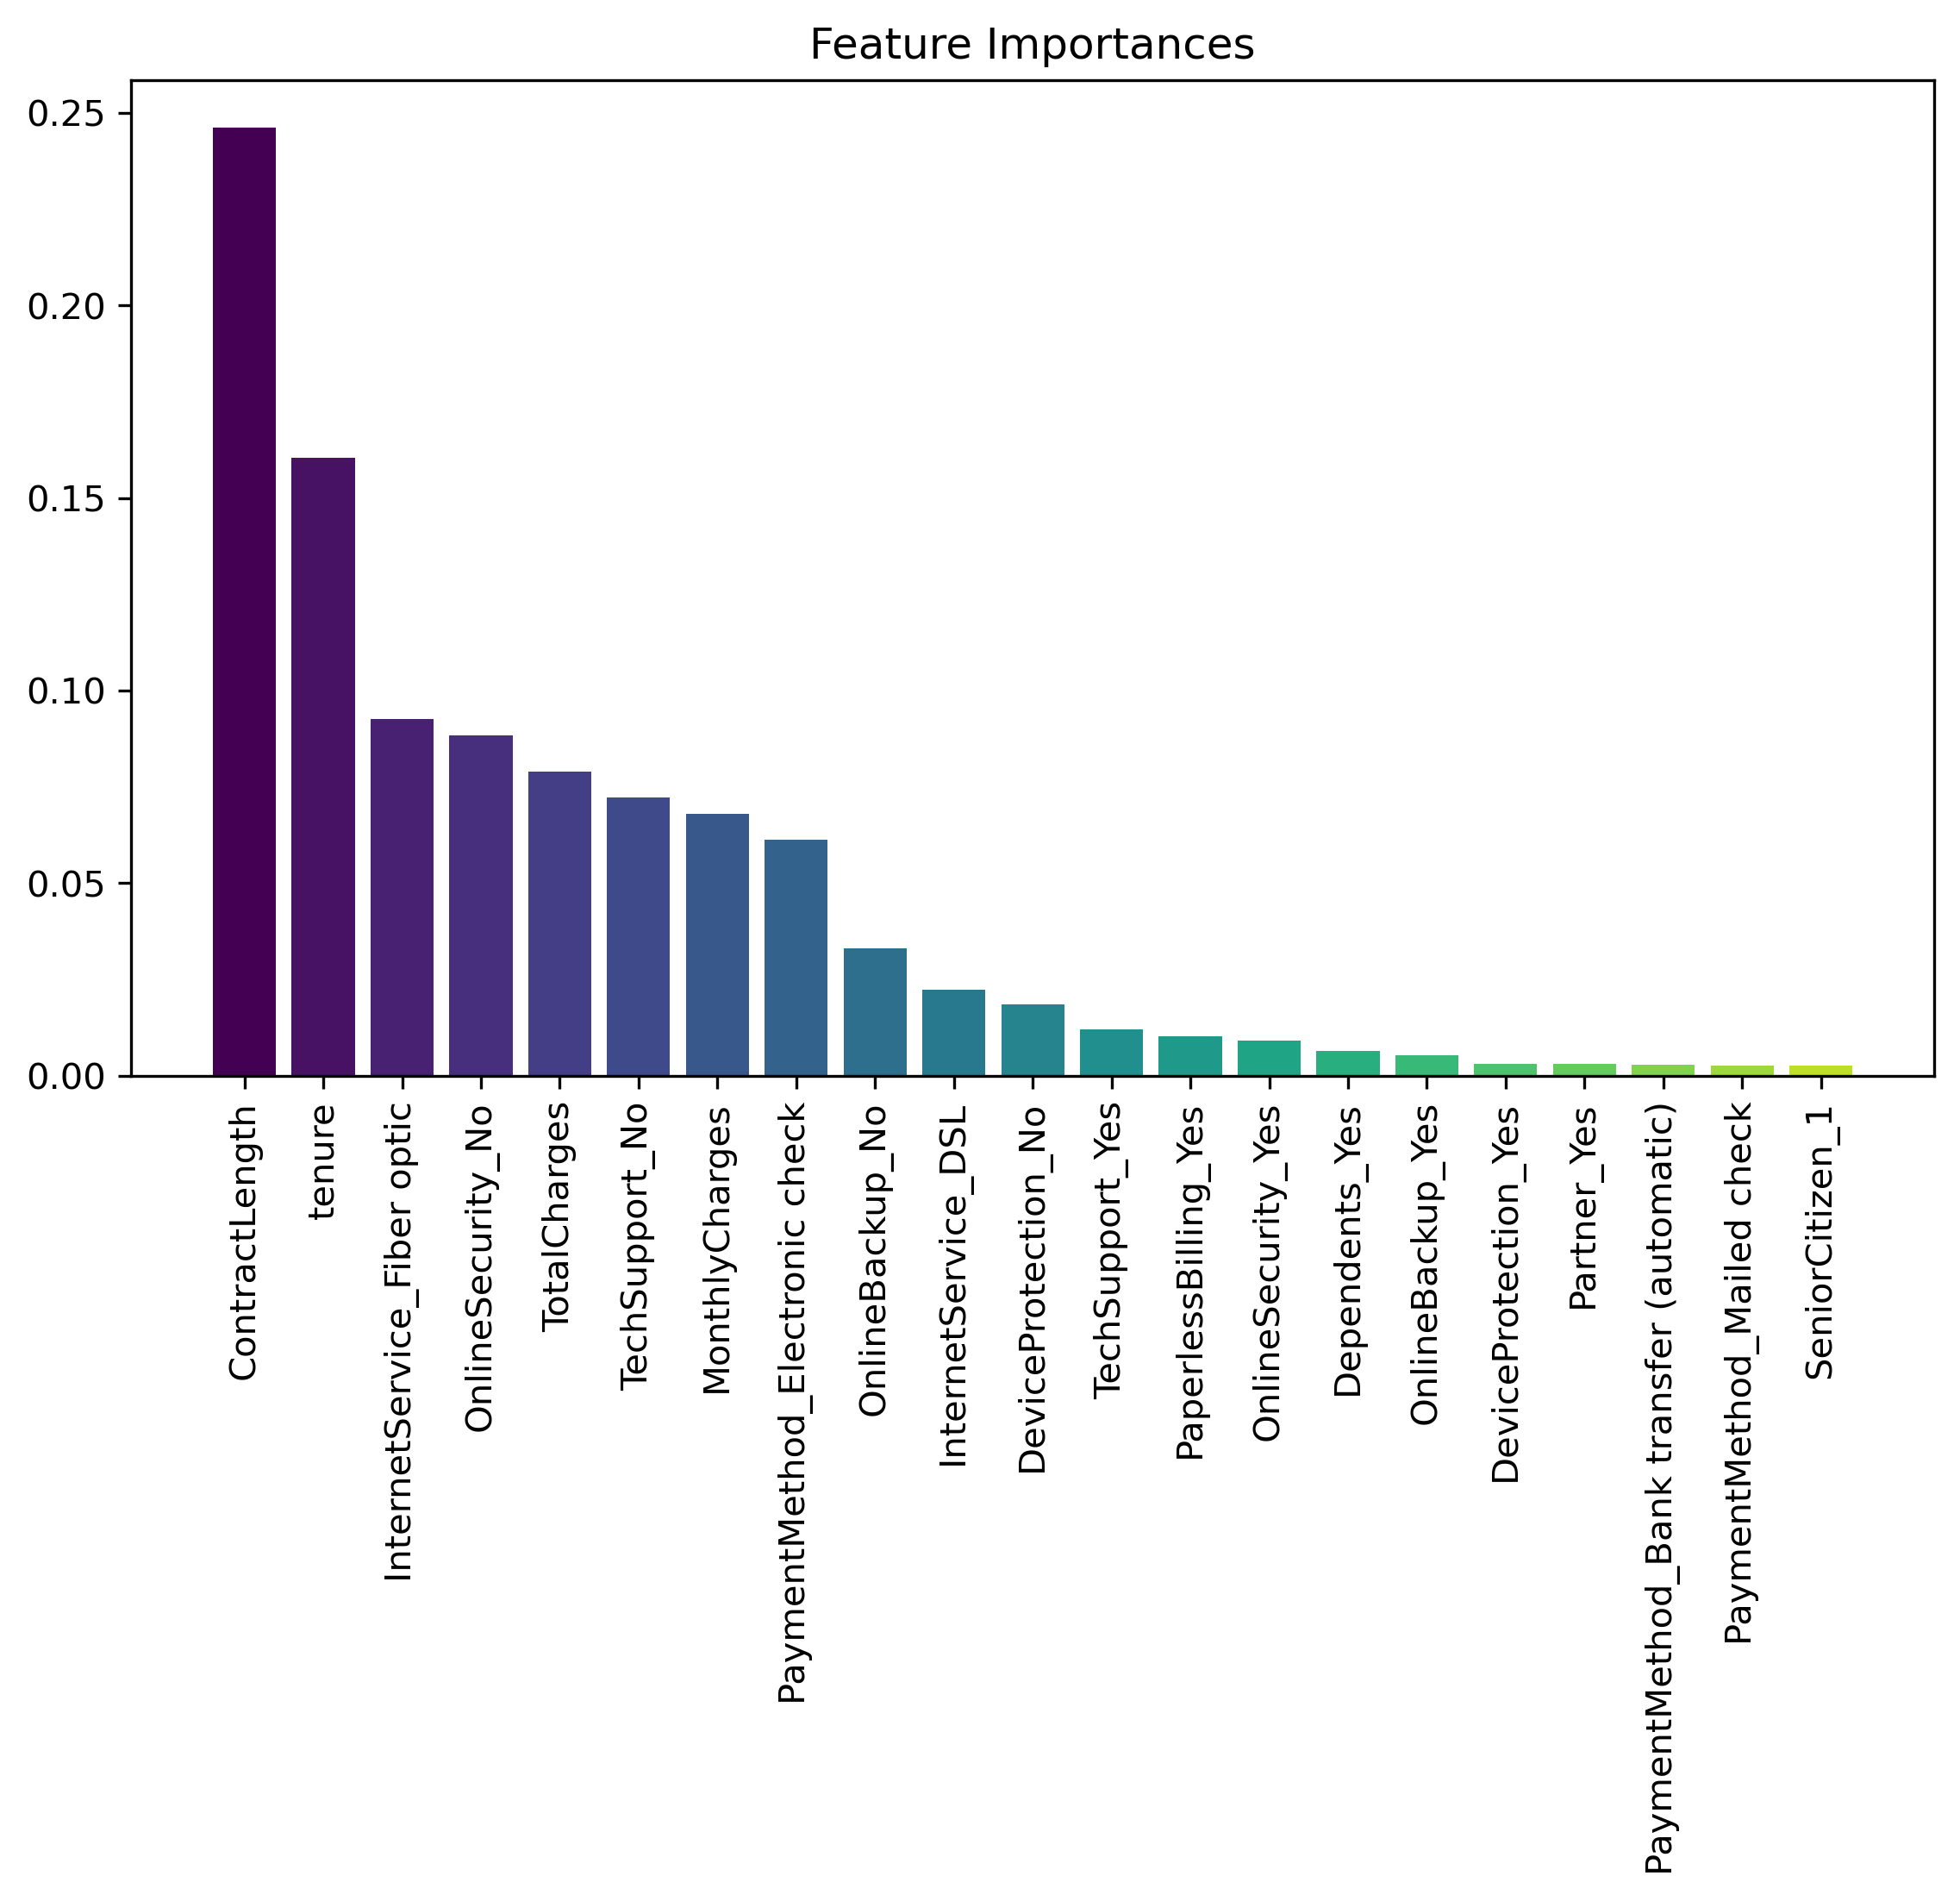

In [365]:
# Define colour map
colour_map = plt.cm.viridis(
    np.linspace(0, 0.9, len(feat_importances))
)
# Set figure parameters
plt.figure(figsize=(9, 5), dpi=300)

# Plot feature importances
plt.bar(
    feat_importances.index, 
    feat_importances.values, color=colour_map
)

# Set title
plt.title("Feature Importances")
# Set x-ticks
plt.xticks(rotation=90);

A quick look at the feature importances revealed patterns which strongly aligned with findings observed during the exploratory data analysis. Notably, **Contract** was shown to be the most significant predictor, followed closely by **tenure**. Other important predictors shown were **InternetService** (*Fiber optic*), **OnlineSecurity** (*No*), **TotalCharges**, **TechSupport** (*No*), **MonthlyCharges**, and **PaymentMethod** (*Electronic check*). These features were all highlighted earlier as key predictors of **Churn**.

Interestingly, some features, including **PaperlessBilling** and **SeniorCitizen**, despite being shown to have an impact on churn in the EDA, ranked lower in the feature importance list. This could suggest that these features might only be *indirectly associated* with churn, rather than directly influencing it, especially in relation to more dominant features such as **Contract** and **tenure**.

These insights could potentially guide further model refinement by, for instance, removing less influential features from the dataset, which could wimplify the model without sacrificing much predictive power. However, given that some features were already removed during the data preprocessing, further pruning may not result in a significant performance increase.

#### Gradient Boosting

Moving onto the second *ensemble method*, an instance of the *Gradient Boosting* model was created. Based on a previous grid search, `subsample=0.8` was set, since this was identified as preferable to the default setting of 1.0; *subsample* controls the fraction of the training data used to build each tree, and setting it to 0.8 can help to reduce overfitting by adding an element of randomness. This was set here to simplify the parameter range and reduce grid search time.

A *Pipeline* object was created, with resampling factored along with the model itself.

In [369]:
# Define GB instance for Pipeline
gb_instance = GradientBoostingClassifier(
    subsample=0.8, 
    random_state=1066
)

# Set up Pipeline for Gradient Boosting
gb_grid_pipe = ImbPipeline([
    ("smote", SMOTE(random_state=1066)),
    ("gb", gb_instance)
])

The following hyperparameters were chosen, which were then stored in a parameter grids. Note that many of the hyperparameters are similar to those found in Random Forest, so they wont be discussed in as much detail here:
- **n_estimators**: Defines the number of trees (or boosting rounds). A range *from 50 to 500 trees* were chosen for the grid search.
- **learning_rate**: The step size for updating the model in each round of boosting. A lower learning rate means that the model learns more slowly, but can improve accuracy by reducing overfitting when combined with a higher number of trees. Values *from 0.01 to 0.3* were chosen here.
- **max_depth**: The maximum depth of each tree, controlling the model's complexity. A range *from 3 to 7* was chosen here.
- **min_samples_split**: The minimum number of samples required to split a node. Values *from 5 to 10* were chosen here.
- **min_samples_leaf**: The minimum number of samples required to form a leaf node. Values *from 1 to 7* were chosen here.
- **max_features**: Also used in *Random Forest* (but left at its default setting); the maximum number of features considered for splitting at each node. The values *'sqrt'* and *7* were chosen for testing, allowing for a balance between using more features and keeping the model generalised.

In [371]:
# Set up variables for param grid
n_estimators = [50, 100, 150, 200, 250, 300, 500]
learning_rate = [0.01, 0.05, 
                 0.07, 0.1, 0.2, 0.3]
max_depth = [3, 5, 7]
min_samples_split = [5, 7, 10] 
min_samples_leaf = [1, 2, 4, 7]
max_features = ["sqrt", 7]

# Set up param grid
gb_params = {
    "gb__n_estimators": n_estimators,
    "gb__learning_rate": learning_rate,
    "gb__max_depth": max_depth,
    "gb__min_samples_split": min_samples_split,
    "gb__min_samples_leaf": min_samples_leaf,
    "gb__max_features": max_features
}

An instance of *GridSearchCV* was then defined and fitted with all relevant parameters.

In [373]:
# Define grid search
gb_grid = GridSearchCV(
    gb_grid_pipe,
    gb_params,
    cv=5,
    scoring=scorer,
    verbose=2,
    n_jobs=-1
)

In [374]:
# Fit grid
#gb_grid.fit(X_train, y_train)

In [375]:
# Inspect best parameters
#gb_grid.best_params_

The grid search for *Gradient Boosting* identified the best hyperparameters to be **150** *estimators*, a *learning rate* of **0.01**, a *maximum depth* of **3**, a *maximum features* of **7**, and a *minimum number of samples* for *splitting a node* and *forming a leaf* at **5** and **7**, respectively.

A *Pipeline* is then fitted, containing the model instance as well as the *SMOTE* resampling object.

In [377]:
# Define GB model instance
gb_opt_instance = GradientBoostingClassifier(
    learning_rate=0.01,
    n_estimators=150,
    subsample=0.8,
    min_samples_split=5,
    min_samples_leaf=7,
    max_features=7,
    max_depth=3,
    random_state=1066
)

# Set up pipeline
gb_opt = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=1066)),
    ("gb", gb_opt_instance)
])

In [378]:
# Fit model
gb_opt.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=1066)),
                ('gb',
                 GradientBoostingClassifier(learning_rate=0.01, max_features=7,
                                            min_samples_leaf=7,
                                            min_samples_split=5,
                                            n_estimators=150, random_state=1066,
                                            subsample=0.8))])

In [379]:
# Collect metrics
gb_opt_metrics = get_metrics(
    gb_opt, "Optimised", X_val, y_val
)

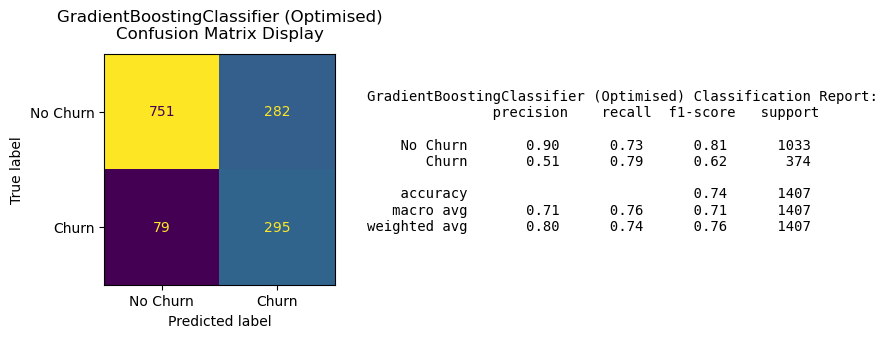

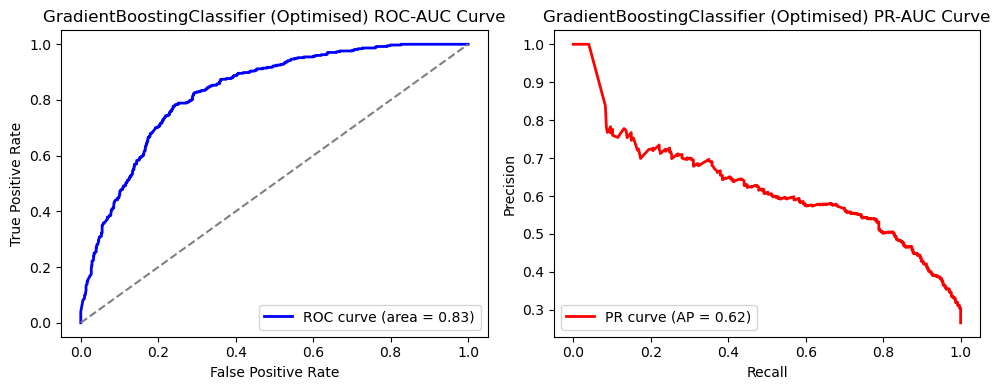

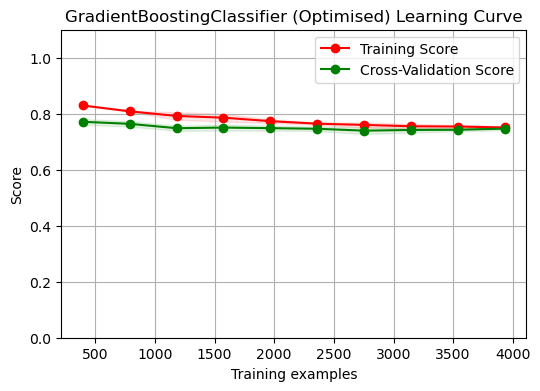

In [380]:
# Display curves, matrix and report
gb_opt_eval = display_evaluation(
    gb_opt, "Optimised", X_train, y_train, X_val, y_val
)

The optimised *Gradient Boosting* model delivered strong results, showing improvement over its previous balanced iteration. It achieved a *precision* of *0.51*, *recall* of *0.79*, and *F1 score* of *0.62*, compared to the previous iteration's scores of *0.57*, *0.65*, and *0.61*, respectively; similarly to the other models, a small drop in precision was noted along with a corresponding increase in recall. Notably, the *AP score* is *0.62*, matching that of *Random Forest*, although it represents a slight drop in two points from its balanced iteration.

The confusion matrix reflects this improvement, with *295 true positives*, *282 false positives*, and *79 false negatives*. The *learning curve* also shows stable performance, with training and cross-validation scores closely aligned at around *0.75*, which suggests the model is generalising well to the unseen data.

Compared to its balanced iteration, the *Gradient Boosting* has seen significant gains in *recall* (increasing by 14 points), while *precision* dropped slightly, though there was an overall increase in the *F1 score*. Interestingly, *Random Forest* now slightly outperforms *Gradient Boosting* in *recall*, marking a surprising shift in performance. However, *Gradient Boosting* still remains highly competitive, with only minor differences compared to the other top-performing models.

Overall, *Gradient Boosting* has proven to be a robust performer. All the optimised models, except *KNN*, have shown comparable results, highlighting the overall success of parameter tuning so far.

#### Adaptive Boosting

The third and final *ensemble method*, and the last model to be optimised, was *AdaBoost*. An instance of the *AdaBoost* model was created and included in *Pipeline*, together with SMOTE resampling for consistency.

In [384]:
# Create ada instance and set up pipeline
ada_instance = AdaBoostClassifier(
    algorithm="SAMME", 
    random_state=1066
)

# Set up Pipeline for AdaBoost
ada_grid_pipe = ImbPipeline([
    ("smote", SMOTE(random_state=1066)),
    ("ada", ada_instance)
])

The following hyperparameters were selected and stored in the parameter grid: **n_estimators** and **learning_rate**. 

*AdaBoost* has fewer parameters to optimise in comparison to the other two *ensemble* methods tuned earlier, hence making it simpler to tune. These two parameters function similarly here as they do in *Gradient Boosting* and *Random Forest*, so they will not be discussed here in detail.

In [386]:
# Set up variables for param grid
n_estimators = [100, 150, 200, 250, 275, 300, 325, 
                350, 375, 400, 450, 500]
learning_rate = [0.01, 0.03, 0.04, 0.05, 0.06, 
                 0.07, 0.1, 0.15, 0.2]

# Set up param grid
ada_params = {
    "ada__n_estimators": n_estimators,
    "ada__learning_rate": learning_rate
}

Hence *GridSearchCV* was defined, with all relevant parameters, and fitted to the training data.

In [388]:
# Define grid search
ada_grid = GridSearchCV(
    ada_grid_pipe, 
    ada_params, 
    cv=5, 
    scoring=scorer,
    verbose=2, 
    n_jobs=-1
)

In [389]:
# Fit grid
#ada_grid.fit(X_train, y_train)

In [390]:
# Inspect best parameters
#ada_grid.best_params_

The grid search for *AdaBoost* identified **400** estimators, along with a *learning rate* of **0.07**, as the optimal parameters. However, additional experimentation with the two parameter combinations revealed that reducing `n_estimators` to 350 provided a slight improvement in recall by one point, without significantly affecting overall performance metrics. As a result, **350** estimators were used for the optimised *AdaBoost* model.

Hence, an instance of the optimised model was defined and included within *Pipeline*, along with *SMOTE*, which was then fitted and evaluated on the validation set.

In [392]:
# Create optimised Ada instance
ada_opt_instance = AdaBoostClassifier(
    algorithm="SAMME",
    learning_rate=0.07,
    n_estimators=350
)

# Set up pipeline
ada_opt = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=1066)),
    ("ada", ada_opt_instance)
])

In [393]:
# Fit optimised model
ada_opt.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=1066)),
                ('ada',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.07,
                                    n_estimators=350))])

In [394]:
ada_opt_metrics = get_metrics(ada_opt, "Optimised", X_val, y_val)

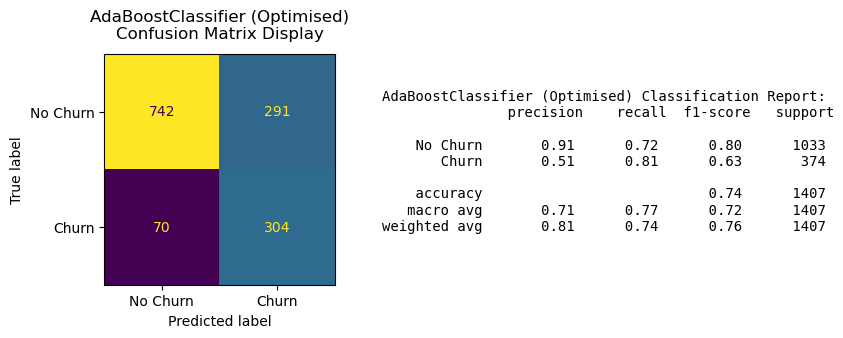

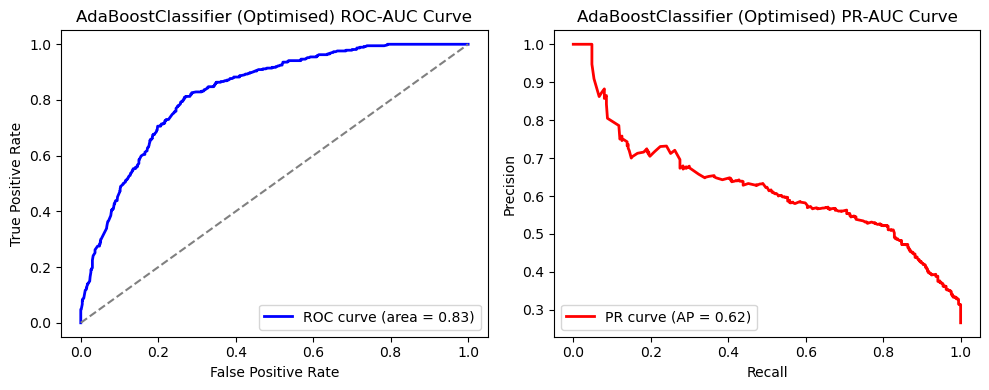

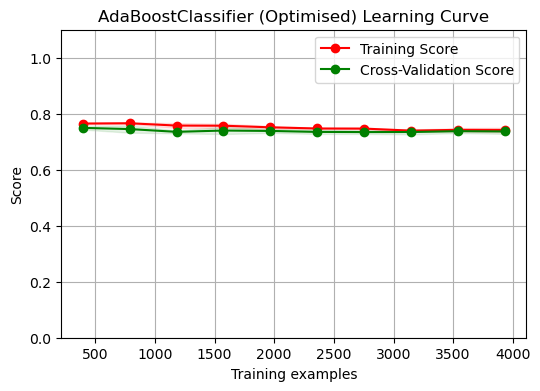

In [395]:
# Display curves, matrix and report
ada_opt_eval = display_evaluation(
    ada_opt, "Optimised", X_train, y_train, X_val, y_val
)

The optimised AdaBoost model demonstrated impressive performance. For the positive (churn) class, it achieved a precision of 0.51, recall of 0.81, and F1 score of 0.63. The average precision score also improved slightly from 0.61 in the balanced model to 0.62 in the optimised model. Most notably, recall has increased by five points, demonstrating an improvement in the model’s ability to identify more churn cases. The confusion matrix shows 304 true positives, 291 false positives, and 70 false negatives, reflecting a marked improvement over the balanced version of AdaBoost, which had 286 true positives and 88 false negatives.

The learning curve for AdaBoost shows stable training and cross-validation scores around 0.75, indicating consistent generalisation to unseen data. Among the ensemble methods, AdaBoost has emerged as the strongest, though the differences in performance across the ensemble models are minor. 

AdaBoost’s metrics are broadly comparable to several other models, including Logistic Regression and SVM, with only minimal differences. For instance, while Logistic Regression and AdaBoost both achieved an F1 score of 0.63, AdaBoost captured two more true positives than Logistic Regression.

In summary, the optimised AdaBoost model scored similarly to the other top performing models.

## Model Evaluation

In this section, the key performance metrics of all the models are presented in a table. The optimised model metrics are visualised in the form of a bar chart and compared against each other, after which the best overall model is evaluated one last time on the *holdout* test set, to see how the model performs on truly *unseen* data; the validation set cannot truly be considered unseen since during hyperparameter tuning, although partially mitigated by using cross-validation, some minor data leakage can still result due to repeated evaluation of a model on the same validation set.

### Results

In [400]:
# Define list of optimised model metrics
opt_metrics = [
    lr_opt_metrics,
    knn_opt_metrics,
    svm_opt_metrics,
    rf_opt_metrics,
    gb_opt_metrics,
    ada_opt_metrics
]

# Create DataFrame
df_opt_metrics = pd.DataFrame(opt_metrics)
df_opt_metrics

Model Model Configuration  Accuracy Score  \
0          LogisticRegression           Optimised        0.743426   
1        KNeighborsClassifier           Optimised        0.760483   
2                         SVC           Optimised        0.740583   
3      RandomForestClassifier           Optimised        0.751244   
4  GradientBoostingClassifier           Optimised        0.743426   
5          AdaBoostClassifier           Optimised        0.743426   

   Precision (Churn)  Recall (Churn)  F1 Score (Churn)  Precision (No Churn)  \
0           0.510998        0.807487          0.625907              0.911765   
1           0.537374        0.711230          0.612198              0.881579   
2           0.507563        0.807487          0.623323              0.911330   
3           0.520761        0.804813          0.632353              0.911942   
4           0.511265        0.788770          0.620400              0.904819   
5           0.510924        0.812834          0.627451              0.913793   

   Recall (No Churn)  F1 Score (No Churn)  Churn ROC-AUC Score  \
0           0.720232             0.804759             0.835308   
1           0.778316             0.826735             0.821584   
2           0.716360             0.802168             0.834426   
3           0.731849             0.812030             0.839014   
4           0.727009             0.806227             0.831063   
5           0.718296             0.804336             0.829163   

   Churn PR-AUC (AP) Score  
0                 0.606929  
1                 0.590492  
2                 0.608928  
3                 0.624317  
4                 0.621898  
5                 0.619403

In [401]:
# Create DataFrame
all_metrics = pd.concat(
    [df_base_metrics, df_bal_metrics, df_opt_metrics]
)

# Group metrics by model and configuration
all_metrics_grouped = all_metrics.groupby(
    ["Model", "Model Configuration"]).sum()

all_metrics_grouped

Accuracy Score  \
Model                      Model Configuration                   
AdaBoostClassifier         Balanced                   0.745558   
                           Base                       0.790334   
                           Optimised                  0.743426   
GradientBoostingClassifier Balanced                   0.776830   
                           Base                       0.787491   
                           Optimised                  0.743426   
KNeighborsClassifier       Balanced                   0.739161   
                           Base                       0.754797   
                           Optimised                  0.760483   
LogisticRegression         Balanced                   0.743426   
                           Base                       0.790334   
                           Optimised                  0.743426   
RandomForestClassifier     Balanced                   0.775409   
                           Base                       0.773987   
                           Optimised                  0.751244   
SVC                        Balanced                   0.754797   
                           Base                       0.781805   
                           Optimised                  0.740583   

                                                Precision (Churn)  \
Model                      Model Configuration                      
AdaBoostClassifier         Balanced                      0.514388   
                           Base                          0.640569   
                           Optimised                     0.510924   
GradientBoostingClassifier Balanced                      0.570093   
                           Base                          0.634409   
                           Optimised                     0.511265   
KNeighborsClassifier       Balanced                      0.508600   
                           Base                          0.542274   
                           Optimised                     0.537374   
LogisticRegression         Balanced                      0.510998   
                           Base                          0.631229   
                           Optimised                     0.510998   
RandomForestClassifier     Balanced                      0.605072   
                           Base                          0.600000   
                           Optimised                     0.520761   
SVC                        Balanced                      0.526032   
                           Base                          0.629344   
                           Optimised                     0.507563   

                                                Recall (Churn)  \
Model                      Model Configuration                   
AdaBoostClassifier         Balanced                   0.764706   
                           Base                       0.481283   
                           Optimised                  0.812834   
GradientBoostingClassifier Balanced                   0.652406   
                           Base                       0.473262   
                           Optimised                  0.788770   
KNeighborsClassifier       Balanced                   0.553476   
                           Base                       0.497326   
                           Optimised                  0.711230   
LogisticRegression         Balanced                   0.807487   
                           Base                       0.508021   
                           Optimised                  0.807487   
RandomForestClassifier     Balanced                   0.446524   
                           Base                       0.449198   
                           Optimised                  0.804813   
SVC                        Balanced                   0.783422   
                           Base                       0.435829   
                           Optimised                  0.807487   

                         

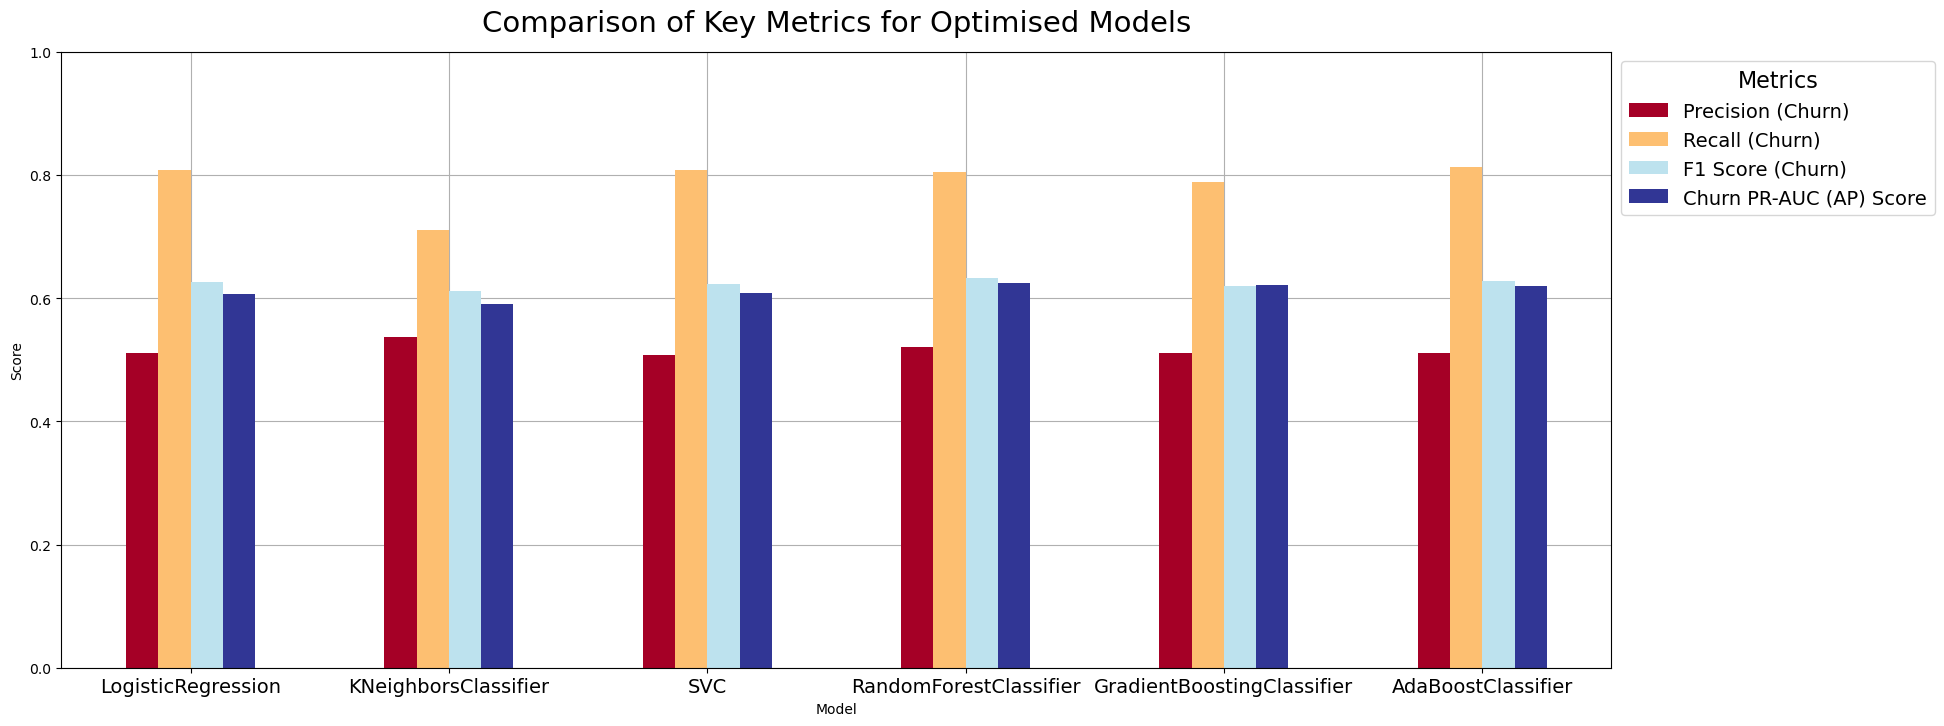

In [402]:
# Define metrics to visualise
metrics = (
    list(df_opt_metrics.columns[3:6])
    + list(df_opt_metrics.columns[10:])
)

# Plot metrics
df_opt_metrics.plot(
    x="Model", 
    y=metrics, 
    kind="bar", 
    grid=True, 
    zorder=2, 
    figsize=(20, 8), 
    cmap="RdYlBu"
)

# Set title and labels
plt.title(
    "Comparison of Key Metrics for Optimised Models",
    y=1.02, fontsize=21
)
plt.ylabel("Score")
plt.xlabel("Model")
# Set xticks
plt.xticks(fontsize=14, rotation=0)
# Set ylim
plt.ylim(0, 1)

# Set legend and layout
plt.legend(title="Metrics", bbox_to_anchor=(1,1),
           fontsize=14, title_fontsize=16)
plt.tight_layout;

### Observations

Looking over the optimised model data, it is clear that some of the models have performed better than others, though many share broadly similar metrics. The metrics discussed here refer specifically to those of the *Churn* class, unless otherwise stated.

#### Key Observations

The model with the **highest recall** observed appears tied between *Logistic Regression*, *Support Vector Machines*, and *Ada Boost* when looking at the bar plot. Additionally, all had scores of *0.81* on their corresponding classification reports. However, looking at the unrounded values in the table, **AdaBoost** takes a slight lead here with a value close to **0.813**, around *0.006* points greater than 0.807 scored by the other two models (intriguingly, the other two models share identical unrounded values). *Random Forest* and *Gradient Boosting* also performed well here, scoring approximately *0.805* and *0.789*, respectively, with the former only differing by a factor of *0.002* from the second-highest score. The lowest recall was given by *K-Nearest Neighbours* at around *0.711*, significantly lower than the other models despite being a substantial improvement from its previous untuned *balanced* iteration.

Surprisingly, **K-Nearest Neighbours** scored the **highest precision** of all the models observed, at around **0.537**, although this is only marginally higher than the lowest score, which is given by *SVM* at approximately *0.508*. In fact, precision is broadly similar across each model, each of which satisfying the required precision constraint, namely a minimum of 0.5. 

The **F1 Score**, corresponding to the harmonic mean of precision and recall, was also broadly similar across each of the models, ranging from around a low of *0.612 (KNN)* to a **high of 0.632 (Random Forest)**.

Much like the F1 score, the **PR-AUC / Average Precision** of all models were close to 0.6, with its lowest and **highest value** also given by *KNN* and **Random Forest**, respectively, corresponding to approximately *0.590* to a **0.624**.

#### Performance Metrics of the Majority Class

In contrast, looking at the performance metrics of the *No Churn* class, the scores were all notably higher, despite decreasing after class balancing and hyperparameter tuning were implemented. This behaviour is expected, since *No Churn* is the majority class in the dataset. The highest precision score was given by *AdaBoost* at approximately *0.914*, whereas the highest recall and F1 scores were both given by *KNN*, at 0.778 and 0.824. Conversely, *KNN*'s precision here was the lowest at *0.882*, whereas *SVM* gave both the lowest recall at *0.716*, and F1 score at *0.802*. These results are interesting, since they suggest that *KNN* may have more room for maneuver when it comes to optimising its hyperparameters; it's recall in particular stands out, sitting a fair distance away from the second highest score given by *Random Forest (0.732)*.

#### Optimal Model Selection

Overall, with the exception of *K-Nearest Neighbours*, all optimised models performed reasonably well, with *Logistic Regression*, *Support Vector Machines*, *Random Forest*, and *AdaBoost* showing very similar results overall. While *F1 scores* and *average precision* scores across all the models are broadly comparable, ***AdaBoost* edges out as the best performing model**. It achieved the highest recall while maintaining an acceptable level of precision, meeting the criteria (defined at the start of the *Model Optimisation and Tuning* section) for selecting the final model. Additionally, *AdaBoost* scored the highest precision for the majority class. 

While *AdaBoost* scored the highest overall with respect to the key performance criteria, *Logistic Regression* and *Support Vector Machines* showed consistent and reliable performance, with the latter improving substantially after its first iteration. Most notably, *Random Forest* stood out for its exceptional transformation from a weaker models (prior to optimisation) to a robust performer, achieving both the highest average precision score and F1 score.

With *AdaBoost* selected as the optimal model, it will now be applied to the holdout test set for final evaluation before preparing the model for deployment.

In [405]:
# Manually apply holdout set to Optimised AdaBoost
holdout_preds = ada_opt.predict(X_hold)

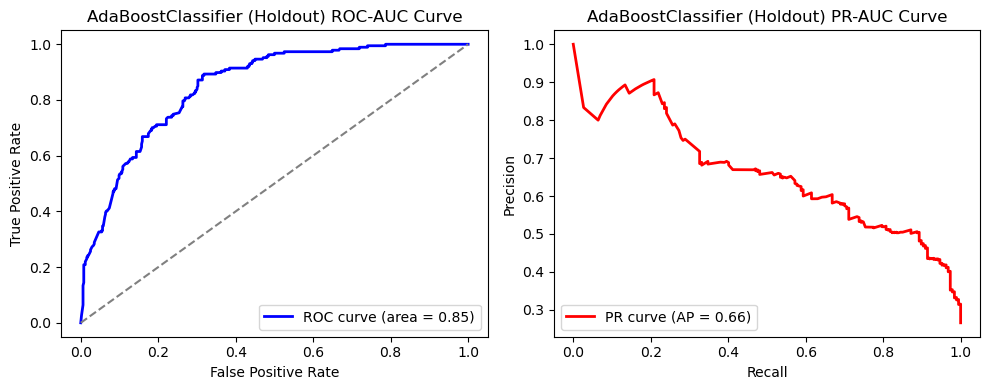

In [406]:
# Plot roc-pr curves
holdout_curves = plot_roc_pr_curves(
    ada_opt, "Holdout", X_hold, y_hold
);

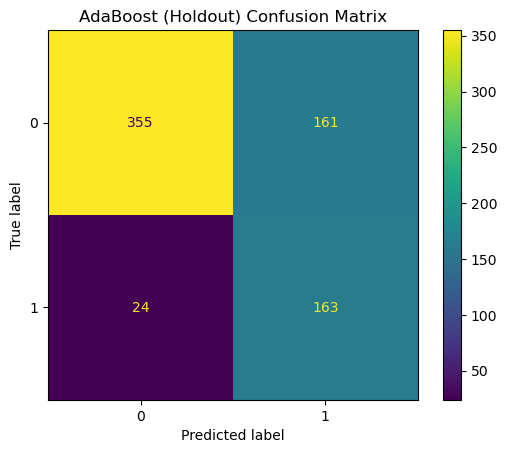

In [407]:
# Show confusion matrix
holdout_matrix = ConfusionMatrixDisplay.from_predictions(
    y_hold, holdout_preds
)
# Set title
plt.title("AdaBoost (Holdout) Confusion Matrix");

In [408]:
# Print classification report
holdout_report = classification_report(y_hold, holdout_preds)
print(holdout_report)

              precision    recall  f1-score   support

           0       0.94      0.69      0.79       516
           1       0.50      0.87      0.64       187

    accuracy                           0.74       703
   macro avg       0.72      0.78      0.72       703
weighted avg       0.82      0.74      0.75       703



The final evaluation metrics on the holdout set demonstrate that the optimised *AdaBoost* model generalises well, with notably a much higher recall *(0.87)* for the minority class, compared to its previous evaluation on the validation set *(vs. 0.81)*. The *precision* *(0.50)*, while slightly lower than before *(vs. 0.51)*, still remains within acceptable bounds for the project's performance criteria. Additionally, the average precision score *(0.66)* has increased by four points *(vs. 0.62)*. 

The results confirm the model's suitability for deployment. However, a precision of *0.5* suggests a high rate of false positives, as evidenced by the confusion matrix where the number of false positives is almost equal to the number of true positives. This limitation will be revisited further in the final discussion section.

## Model Deployment

The *final AdaBoost model* was fitted using the optimised hyperparameters identified by `GridSearchCV`, and subsequently **trained on the entire dataset**, utilising all the available data.

In [412]:
# Create optimised Ada instance
final_ada_instance = AdaBoostClassifier(
    algorithm="SAMME",
    learning_rate=0.07,
    n_estimators=350
)

# Set up final model in Pipeline
final_model = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=1066)),
    ("ada", ada_opt_instance)
])

In [413]:
# Fit final model
final_model.fit(X, y)

Pipeline(steps=[('smote', SMOTE(random_state=1066)),
                ('ada',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.07,
                                    n_estimators=350))])

The trained *AdaBoost* model was saved using the **Joblib** library, and exported to a file named `customer_churn_predictor.pkl` so that it can be easily reloaded for later use or deployment.

In [415]:
# Import joblib library
#import joblib

In [416]:
# Save final model
#joblib.dump(final_model, "customer_churn_predictor.pkl")

The column names were also saved as a separate file, ensuring that input data for future predictions can be correctly attributed to the model's expected feature order.

In [418]:
# Save column names
#joblib.dump(list(X.columns), "customer_churn_column_names.pkl")

## Discussion

The project aimed to predict customer churn using machine learning, in order to help businesses to preemptively identify high-risk customers and prevent potential revenue loss. The analysis included exploratory data analysis (EDA), feature engineering, model selection, hyperparameter optimisation, and evaluation. A final Adaptive Boosting model (AdaBoost) was chosen based on its strong recall performance.

During EDA, the dataset revealed significant class imbalance, with churners accounting for only 26 to 27 percent of the given data. This impacted the trajectory of the project, such as choosing to prioritise recall over accuracy in evaluation metrics. Class-specific outliers were flagged in boxplots when the data were filtered by the target variable, although a qualitative assessment revealed that most flagged outliers were likely incorrectly identified. While a few of these outliers may have been notable within the *Churn* class, they were not true outliers across the entire dataset, and were retained to conserve important data in the already imbalanced minority class. One potentially significant outlier was retained because it was associated with other features linked to customer churn, which suggested multiple contributing factors.

EDA aso highlighted key features associated with churn. Among categorical features, *month-to-month contract holders* emerged as the strongest predictor, with *fibre-optic internet service* and *electronic cheque payment method* also strongly associated with customer churn. *Streaming TV and Movies* despite scoring high on the *chi-squared* tests, were ultimately removed due to weak correlations with the target variable. This decision was supported by feature encoding and subsequent model training, where *Random Forest feature importance* ranked these features low in relevance, further justifying their exclusion.

Features such as *TotalCharges* were retained despite high correlation, and potential collinearity, with *tenure*, as it captured additional variance not shown by the other numerical features. This decision was further supported by the *feature importance* rankings given by Random Forest during model hyperparameter tuning, where *TotalCharges* was ranked as the fifth most important feature, scoring just under 0.1. Its importance even ranked higher than the *absence of tech support*., another important feature which was identified during EDA. The most important features identified by Random Forest were *contract length*, *tenure*, *fibre-optic internet service type*, and *absence of online security*, followed by *TotalCharges*. 

Multiple models were tested, including but not limited to *Logistic Regression*, *Random Forest*, and *AdaBoost*. AdaBoost narrowly emerged as the best performing model after hyperparameter tuning, achieving a *recall of 87%* and *precision of 50%* for the minority class upon final evaluation with the *holdout* test data. The high recall ensures that the model can effectively identify churners, while the precision ensures that these predictions are true in at least 50 percent of instances.

In conclusion, the AdaBoost model achieved the project's goals by prioritising recall while maintaining an acceptable level of precision. These results demonstrate the model's potential to support businesses in identifying and retaining at-risk customers, though further improvements could enhance its overall utility and reliability.

### Limitations

The project faced several limitations, particularly regarding *class imbalance*, *parameter constraints*, *feature selection*, *model selection*, and the potential impact of retained outliers and asymmetric data distribution. 

#### Class Imbalance and Evaluation Metrics

Most notably, the *class imbalance* posed challenges for the reliability of accuracy as a metric, necessitating a trade-off between precision and recall. The *0.5 precision threshold*, while meeting the project criteria, is not ideal and may not suit all business contexts. While the model's high recall ensures that a high number of potential churners are flagged, the effect of the precision constraint means that half of the customers predicted may not actually churn. This could result in businesses investing unnecessarily in expensive customer retention strategies targeting these false positives, resulting in wasted resources.

Furthermore, a precision of 0.5 is borderline, so the possibility of precision dropping below the threshold in future datasets or post-deployment presents a risk to the reliability of the model. For example, consider the discrepancy between the reported values given by the *optimised* AdaBoost model on the *validation set (0.51)* and the *final holdout set (0.50)*, a difference of only one point. If the model were given a new set of new unseen data to make predictions on, and the precision were to fall by an additional point to 0.49 it would subsequently fail to meet the set criteria and could further reduce the model's reliability for business use.

#### Outliers

While outliers were retained to conserve data for the minority class, as pruning them would have reduced the number of data available for prediction, this decision could have impacted the model's performance. Some of these outliers may have introduced noise, particularly if any were genuinely irrelevant. One particular outlier, specific to the *churn* class in the *TotalCharges* feature, was retained because it had multiple features associated with churn. While this was deemed a reasonable decision, there's still the possiblility that removing this outlier could have been better for the model's performance than retaining it.

#### Feature Selection

Feature importance analysis with *random forest* revealed inconsistencies with earlier chi-squared results and exploratory analysis. For example, *paperless billing* scored less than 0.025 in feature importance despite promising results during exploratory analysis. Since Random Forest evaluates feature importances with respect to all variables, it's likely that other features in the dataset captured similar or overlapping information, thus reducing the model's reliance on *paperless billing* as a predictor of churn and rendering it redundant.

A similar argument can also be made for the *SeniorCitizen* feature, though in this case its low feature importance is better atributed to its sparsity in the dataset, that is, the small proportion of senior citizens (approx. 16%) with respect to the total dataset. Even among the **churn class** subset of the dataset, only about 25% of these customers were senior citizens, compared to nearly 90% and 70% with *month-to-month contracts* and *fibre-optic internet service*, respectively. This means that even in the absence of multicollinearity, a strong association with churn is of little value when a majority of the *churn* subset are non-senior citizens.

As a consequence, the model may have over-focused on less important features at the expense of prioritising more important features, effectively wasting computational resources.

#### Data Asymmetry

Some features exhibited asymmetrical and/or skewed distributions. For *tenure* and *MonthlyCharges*, transformations were not suitable due to their irregular shapes, whereas *TotalCharges* was right-skew and may have benefited from being transformed (with, for example, a *log transformation*).

While these asymmetries were partially addressed by *scaling* the features during training for models like Logistic Regression, K-Nearest Neighbours, and Support Vector Machines, no transformations were applied to normalise the distributions of skewed features like *TotalCharges*. For *ensemble* models (like *AdaBoost* and *Random Forest*) that do not rely on scaling, this skewness could have had a negative impact on their overall performance.

#### Model Selection and Optimisation

While multiple models were tested, some potentially useful algorithms were not explored. For example, *XGBoost* (or *eXtreme Gradient Boosting*), a modified form of the traditional *Gradient Boosting* algorithm, was not included in this analysis. The inclusion of additional algorithms such as XGBoost might have yielded a model with better performance.

Similarly, hyperparameter tuning for *ensemble* models was limited in order to reduce the computational cost of extensive grid searches. Expanding the grid search to include additional parameters, particularly for *Random Forest* and *Gradient Boosting*, could have improved their performance.

Not all potential models, such as XGBoost, were explored due to time constraints, and hyperparameter tuning was limited for some ensemble models *(Random Forest, Gradient Boosting)* to reduce computational cost.

### Future Work

Future work could focus on addressing these limitations. Experimenting with additional models like *XGBoost* and conducting an expanded hyperparameter tuning could yield better results. Further pruning of features based on feature importance rankings may also improve model performance and precision.

Exploring unsupervised learning models could also be useful. Dimensionality reduction techniques, such as *Principal Component Analysis (PCA)*, could be employed to remove redundant or highly correlated features, such as *TotalCharges* and *tenure*, and to reduce noise in the dataset; this might improve model performance, though potentially at the cost of feature interpretability. Additionally, clustering methods such as *K-Means* or *DBSCAN* could identify hidden risk-profiles associated with churn, providing valuable insights which can be leveraged by the supervised learning models used within this project.

Finally, deploying the model through an API would improve its practical usability for business applications.